In [1]:
import scipy.io as sio
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import math
import time
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import math
import time


from tqdm import tqdm

from models.apl import *
from models.densenet import *
# from models.apl_plus import *

In [2]:
data_amp = sio.loadmat('data/train_data_split_amp.mat')
train_data_amp = data_amp['train_data']
train_data = train_data_amp
# data_pha = sio.loadmat('data/train_data_split_pha.mat')
# train_data_pha = data_pha['train_data']
# train_data = np.concatenate((train_data_amp,train_data_pha),1)

train_activity_label = data_amp['train_activity_label']
train_location_label = data_amp['train_location_label']
train_label = np.concatenate((train_activity_label, train_location_label), 1)

In [3]:
data_amp = sio.loadmat('data/test_data_split_amp.mat')
test_data_amp = data_amp['test_data']
test_data = test_data_amp
# data_pha = sio.loadmat('data/test_data_split_pha.mat')
# test_data_pha = data_pha['test_data']
# test_data = np.concatenate((test_data_amp,test_data_pha), 1)

test_activity_label = data_amp['test_activity_label']
test_location_label = data_amp['test_location_label']
test_label = np.concatenate((test_activity_label, test_location_label), 1)

In [4]:
import pandas as pd

In [5]:
data = np.concatenate((train_data,test_data), 0)

In [6]:
label = np.concatenate((train_label,test_label), 0)

In [7]:
# label_df.shape

In [8]:
# label_df

In [9]:
val_index = [3,
 4,
 13,
 22,
 26,
 1121,
 41,
 37,
 48,
 53,
 64,
 65,
 76,
 74,
 87,
 1136,
 92,
 97,
 1141,
 98,
 118,
 109,
 129,
 125,
 134,
 1149,
 149,
 148,
 1154,
 154,
 173,
 164,
 1159,
 179,
 194,
 190,
 208,
 198,
 213,
 218,
 229,
 1171,
 232,
 242,
 250,
 251,
 260,
 1180,
 267,
 271,
 279,
 277,
 299,
 288,
 1191,
 1192,
 1194,
 322,
 323,
 1197,
 336,
 334,
 350,
 355,
 367,
 365,
 377,
 371,
 387,
 1212,
 395,
 403,
 408,
 413,
 422,
 419,
 436,
 1225,
 1227,
 1228,
 1231,
 1230,
 464,
 471,
 476,
 485,
 488,
 1237,
 506,
 1241,
 512,
 522,
 527,
 532,
 542,
 1250,
 549,
 557,
 570,
 563,
 1260,
 579,
 1263,
 593,
 605,
 603,
 613,
 1268,
 625,
 623,
 639,
 629,
 645,
 1276,
 661,
 1278,
 669,
 664,
 675,
 680,
 688,
 1287,
 708,
 702,
 717,
 1294,
 723,
 726,
 735,
 1299,
 1302,
 748,
 767,
 759,
 776,
 777,
 786,
 1313,
 802,
 805,
 817,
 815,
 821,
 1322,
 835,
 839,
 852,
 843,
 855,
 865,
 869,
 1334,
 1335,
 882,
 895,
 892,
 909,
 912,
 920,
 915,
 927,
 1349,
 945,
 938,
 1353,
 1354,
 972,
 971,
 980,
 979,
 1364,
 990,
 997,
 998,
 1010,
 1013,
 1026,
 1373,
 1034,
 1036,
 1047,
 1055,
 1061,
 1062,
 1071,
 1077,
 1083,
 1086,
 1097,
 1093,
 1111,
 1393]

In [10]:
test_index = [7,
 1116,
 15,
 1118,
 32,
 1122,
 43,
 1125,
 49,
 47,
 61,
 56,
 70,
 71,
 84,
 85,
 88,
 93,
 107,
 106,
 117,
 112,
 1145,
 1146,
 136,
 131,
 141,
 1153,
 156,
 157,
 175,
 1157,
 1160,
 176,
 195,
 192,
 1166,
 200,
 220,
 1168,
 226,
 1172,
 234,
 240,
 247,
 248,
 257,
 265,
 1182,
 270,
 1185,
 285,
 289,
 1189,
 304,
 300,
 320,
 314,
 325,
 326,
 343,
 339,
 356,
 352,
 1206,
 363,
 369,
 379,
 386,
 382,
 1214,
 394,
 1219,
 410,
 426,
 425,
 439,
 438,
 445,
 443,
 460,
 452,
 475,
 474,
 1236,
 479,
 494,
 495,
 503,
 500,
 516,
 1244,
 523,
 1248,
 537,
 1251,
 554,
 1254,
 1255,
 560,
 1258,
 1259,
 1261,
 591,
 1264,
 1265,
 609,
 611,
 617,
 1270,
 1273,
 634,
 648,
 643,
 654,
 653,
 1282,
 663,
 685,
 1284,
 695,
 1288,
 1292,
 705,
 716,
 1295,
 1297,
 729,
 744,
 1300,
 1304,
 753,
 1306,
 1305,
 772,
 771,
 1311,
 1312,
 803,
 1315,
 810,
 813,
 819,
 822,
 841,
 836,
 846,
 850,
 1330,
 1329,
 872,
 1333,
 881,
 1336,
 900,
 890,
 913,
 908,
 1344,
 916,
 932,
 1348,
 1352,
 948,
 953,
 951,
 967,
 963,
 974,
 982,
 985,
 984,
 1366,
 999,
 1017,
 1011,
 1023,
 1028,
 1038,
 1039,
 1377,
 1378,
 1059,
 1057,
 1385,
 1078,
 1081,
 1386,
 1102,
 1101,
 1107,
 1392]

In [11]:
train_index = []
for i in range(1394):
    if i not in val_index and i not in test_index:
        train_index.append(i)

In [12]:
len(train_index)

1010

In [13]:
label

array([[4, 9],
       [4, 9],
       [4, 9],
       ...,
       [0, 7],
       [0, 8],
       [0, 8]], dtype=uint8)

In [14]:
train_data = data[train_index]
val_data = data[val_index]
test_data = data[test_index]

train_label = label[train_index]
val_label = label[val_index]
test_label = label[test_index]

# Parameters

In [2]:
batch_size = 64
num_epochs = 600

In [16]:
num_train_instances = len(train_data)

train_data = torch.from_numpy(train_data).type(torch.FloatTensor)
train_label = torch.from_numpy(train_label).type(torch.LongTensor)
# train_data = train_data.view(num_train_instances, 1, -1)
# train_label = train_label.view(num_train_instances, 2)

train_dataset = TensorDataset(train_data, train_label)
train_data_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [17]:
num_test_instances = len(test_data)

test_data = torch.from_numpy(test_data).type(torch.FloatTensor)
test_label = torch.from_numpy(test_label).type(torch.LongTensor)
# test_data = test_data.view(num_test_instances, 1, -1)
# test_label = test_label.view(num_test_instances, 2)

test_dataset = TensorDataset(test_data, test_label)
test_data_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# DenseNet

In [3]:
aplnet = DenseNet()
# aplnet = ResNet(block=BasicBlock, layers=[1, 1, 1, 1], inchannel=52)
# aplnet = ResNet(block=BasicBlock, layers=[2, 2, 2, 2], inchannel=52)
# aplnet = ResNet(block=BasicBlock, layers=[3, 4, 6, 3], inchannel=52)
#

# aplnet = ResNet(block=Bottleneck, layers=[2, 3, 4, 6])

aplnet = aplnet.cuda()

criterion = nn.CrossEntropyLoss(size_average=False).cuda()

optimizer = torch.optim.Adam(aplnet.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer,
                                                #  milestones=[10, 20, 30, 40, 60, 70, 80, 90, 100, 110, 120, 130,
                                                #              140, 150, 160, 170, 180, 190, 200, 250, 300, 350, 
                                                #              400, 450, 500, 550, 600],
                                                milestones = [i for i in range(20,600,20)],
                                                 gamma=0.5)

this training is using densenet
mau masuk block 1 in_planes sebanyak  128
keluar block 1 in_planes sebanyak  640
in_planes sebanyak  640


/home/user2/miniconda3/envs/torch_cuda111/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [4]:
sum(p.numel() for p in aplnet.parameters() if p.requires_grad)

2520342

In [20]:
train_loss_act = np.zeros([num_epochs, 1])
train_loss_loc = np.zeros([num_epochs, 1])
test_loss_act = np.zeros([num_epochs, 1])
test_loss_loc = np.zeros([num_epochs, 1])
train_acc_act = np.zeros([num_epochs, 1])
train_acc_loc = np.zeros([num_epochs, 1])
test_acc_act = np.zeros([num_epochs, 1])
test_acc_loc = np.zeros([num_epochs, 1])

In [21]:
for epoch in range(num_epochs):
    print('Epoch:', epoch)
    aplnet.train()
    scheduler.step()
    # for i, (samples, labels) in enumerate(train_data_loader):
    loss_x = 0
    loss_y = 0
    for (samples, labels) in tqdm(train_data_loader):
        samplesV = Variable(samples.cuda())
        labels_act = labels[:, 0].squeeze()
        labels_loc = labels[:, 1].squeeze()
        labelsV_act = Variable(labels_act.cuda())
        labelsV_loc = Variable(labels_loc.cuda())

        # Forward + Backward + Optimize
        optimizer.zero_grad()
        predict_label_act, predict_label_loc,_,_,_,_,_,_ = aplnet(samplesV)

        loss_act = criterion(predict_label_act, labelsV_act)
        loss_loc = criterion(predict_label_loc, labelsV_loc)

        loss = loss_act + loss_loc
        # loss = loss_loc
        # print(loss.item())
        loss.backward()
        optimizer.step()

        # loss = loss1+0.5*loss2+0.25*loss3+0.25*loss4
        # loss = loss1+loss2+loss3+loss4

        loss_x += loss_act.item()
        loss_y += loss_loc.item()

        # loss.backward()
        # optimizer.step()

    train_loss_act[epoch] = loss_x / num_train_instances
    train_loss_loc[epoch] = loss_y / num_train_instances

    aplnet.eval()
    # loss_x = 0
    correct_train_act = 0
    correct_train_loc = 0
    for i, (samples, labels) in enumerate(train_data_loader):
        with torch.no_grad():
            samplesV = Variable(samples.cuda())
            labels = labels.squeeze()

            labels_act = labels[:, 0].squeeze()
            labels_loc = labels[:, 1].squeeze()
            labelsV_act = Variable(labels_act.cuda())
            labelsV_loc = Variable(labels_loc.cuda())

            predict_label_act, predict_label_loc,_,_,_,_,_,_ = aplnet(samplesV)

            prediction = predict_label_loc.data.max(1)[1]
            correct_train_loc += prediction.eq(labelsV_loc.data.long()).sum()

            prediction = predict_label_act.data.max(1)[1]
            correct_train_act += prediction.eq(labelsV_act.data.long()).sum()

            loss_act = criterion(predict_label_act, labelsV_act)
            loss_loc = criterion(predict_label_loc, labelsV_loc)
            # loss_x += loss.item()

    print("Activity Training accuracy:", (100 * float(correct_train_act) / num_train_instances))
    print("Location Training accuracy:", (100 * float(correct_train_loc) / num_train_instances))
    print("Activity Training loss:", loss_x / num_train_instances )
    print("Location Training loss:", loss_y / num_train_instances)

    # train_loss[epoch] = loss_x / num_train_instances
    train_acc_act[epoch] = 100 * float(correct_train_act) / num_train_instances
    train_acc_loc[epoch] = 100 * float(correct_train_loc) / num_train_instances


    trainacc_act = str(100 * float(correct_train_act) / num_train_instances)[0:6]
    trainacc_loc = str(100 * float(correct_train_loc) / num_train_instances)[0:6]
    

    loss_x = 0
    loss_y = 0
    correct_test_act = 0
    correct_test_loc = 0
    for i, (samples, labels) in enumerate(test_data_loader):
        with torch.no_grad():
            samplesV = Variable(samples.cuda())
            labels_act = labels[:, 0].squeeze()
            labels_loc = labels[:, 1].squeeze()
            labelsV_act = Variable(labels_act.cuda())
            labelsV_loc = Variable(labels_loc.cuda())

        predict_label_act, predict_label_loc,_,_,_,_,_,_ = aplnet(samplesV)
        prediction = predict_label_act.data.max(1)[1]
        correct_test_act += prediction.eq(labelsV_act.data.long()).sum()

        prediction = predict_label_loc.data.max(1)[1]
        correct_test_loc += prediction.eq(labelsV_loc.data.long()).sum()

        loss_act = criterion(predict_label_act, labelsV_act)
        loss_loc = criterion(predict_label_loc, labelsV_loc)
        loss_x += loss_act.item()
        loss_y += loss_loc.item()

    print("Activity Test accuracy:", (100 * float(correct_test_act) / num_test_instances))
    print("Location Test accuracy:", (100 * float(correct_test_loc) / num_test_instances))
    print("Activity Test loss:", loss_x / num_test_instances )
    print("Location Test loss:", loss_y / num_test_instances)

    test_loss_act[epoch] = loss_x / num_test_instances
    test_acc_act[epoch] = 100 * float(correct_test_act) / num_test_instances

    test_loss_loc[epoch] = loss_y / num_test_instances
    test_acc_loc[epoch] = 100 * float(correct_test_loc) / num_test_instances

    testacc_act = str(100 * float(correct_test_act) / num_test_instances)[0:6]
    testacc_loc = str(100 * float(correct_test_loc) / num_test_instances)[0:6]

    if epoch == 0:
        temp_test = correct_test_act
        temp_train = correct_train_act
    elif correct_test_act > temp_test:
        torch.save(aplnet, 'weights_densenet/net1111epoch' + str(
            epoch) + 'Train' + trainacc_act + 'Test' + testacc_act + 'Train' + trainacc_loc + 'Test' + testacc_loc + '.pkl')

        temp_test = correct_test_act
        temp_train = correct_train_act


# for learning curves
sio.savemat(
    'result/net1111TrainLossAct_Train' + str(100 * float(temp_train) / num_train_instances)[
                                                                 0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'train_loss': train_loss_act})
sio.savemat(
    'result/net1111TestLossACT_Train' + str(100 * float(temp_train) / num_train_instances)[
                                                                0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'test_loss': test_loss_act})
sio.savemat(
    'result/net1111TrainLossLOC_Train' + str(100 * float(temp_train) / num_train_instances)[
                                 0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'train_loss': train_loss_loc})
sio.savemat(
    'result/net1111TestLossLOC_Train' + str(100 * float(temp_train) / num_train_instances)[
                                 0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'test_loss': test_loss_loc})

sio.savemat('result/net1111TrainAccuracyACT_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'train_acc': train_acc_act})
sio.savemat('result/net1111TestAccuracyACT_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'test_acc': test_acc_act})
print(str(100 * float(temp_test) / num_test_instances)[0:6])

sio.savemat('result/net1111TrainAccuracyLOC_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'train_acc': train_acc_loc})
sio.savemat('result/net1111TestAccuracyLOC_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'test_acc': test_acc_loc})

/home/user2/miniconda3/envs/torch_cuda111/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:129: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch: 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 22.21it/s]


Activity Training accuracy: 17.326732673267326
Location Training accuracy: 6.336633663366337
Activity Training loss: 1.8901272311068997
Location Training loss: 1.486283810303943
Activity Test accuracy: 17.1875
Location Test accuracy: 6.25
Activity Test loss: 1.8168924649556477
Location Test loss: 3.7730255921681723
Epoch: 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.50it/s]


Activity Training accuracy: 17.128712871287128
Location Training accuracy: 6.435643564356436
Activity Training loss: 1.7624807905442643
Location Training loss: 0.6738055578552851
Activity Test accuracy: 16.666666666666668
Location Test accuracy: 6.25
Activity Test loss: 1.9071090618769329
Location Test loss: 3.8660835425059
Epoch: 2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.09it/s]


Activity Training accuracy: 18.019801980198018
Location Training accuracy: 9.702970297029703
Activity Training loss: 1.6696104823952855
Location Training loss: 0.48026666169119353
Activity Test accuracy: 17.708333333333332
Location Test accuracy: 8.333333333333334
Activity Test loss: 2.1286277770996094
Location Test loss: 5.183984438578288
Epoch: 3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.20it/s]


Activity Training accuracy: 16.534653465346533
Location Training accuracy: 9.108910891089108
Activity Training loss: 1.604844869481455
Location Training loss: 0.4151288721821096
Activity Test accuracy: 18.229166666666668
Location Test accuracy: 9.375
Activity Test loss: 2.619610071182251
Location Test loss: 4.7557266553243
Epoch: 4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.07it/s]


Activity Training accuracy: 18.11881188118812
Location Training accuracy: 20.099009900990097
Activity Training loss: 1.5316237345780477
Location Training loss: 0.382863713255023
Activity Test accuracy: 16.666666666666668
Location Test accuracy: 19.791666666666668
Activity Test loss: 3.0593625704447427
Location Test loss: 8.628775914510092
Epoch: 5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.74it/s]


Activity Training accuracy: 16.93069306930693
Location Training accuracy: 12.871287128712872
Activity Training loss: 1.4474028785630029
Location Training loss: 0.30888612388384223
Activity Test accuracy: 14.583333333333334
Location Test accuracy: 13.541666666666666
Activity Test loss: 14.108740290006002
Location Test loss: 15.829866409301758
Epoch: 6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.66it/s]


Activity Training accuracy: 18.91089108910891
Location Training accuracy: 31.08910891089109
Activity Training loss: 1.3961777337706915
Location Training loss: 0.3316974451046179
Activity Test accuracy: 19.270833333333332
Location Test accuracy: 30.208333333333332
Activity Test loss: 8.57350746790568
Location Test loss: 10.117121378580729
Epoch: 7


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.58it/s]


Activity Training accuracy: 18.316831683168317
Location Training accuracy: 14.356435643564357
Activity Training loss: 1.343633224940536
Location Training loss: 0.2943086643030148
Activity Test accuracy: 18.75
Location Test accuracy: 14.0625
Activity Test loss: 3.848607858022054
Location Test loss: 10.112602551778158
Epoch: 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.64it/s]


Activity Training accuracy: 17.326732673267326
Location Training accuracy: 23.465346534653467
Activity Training loss: 1.317007597366182
Location Training loss: 0.2579952428836634
Activity Test accuracy: 17.708333333333332
Location Test accuracy: 23.958333333333332
Activity Test loss: 4.100526134173076
Location Test loss: 10.828176498413086
Epoch: 9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.08it/s]


Activity Training accuracy: 15.346534653465346
Location Training accuracy: 7.7227722772277225
Activity Training loss: 1.3245500394613436
Location Training loss: 0.2545275442671068
Activity Test accuracy: 16.666666666666668
Location Test accuracy: 7.8125
Activity Test loss: 6.060059229532878
Location Test loss: 7.763718605041504
Epoch: 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.90it/s]


Activity Training accuracy: 20.594059405940595
Location Training accuracy: 20.396039603960396
Activity Training loss: 1.2231818057522916
Location Training loss: 0.25807599832515904
Activity Test accuracy: 20.3125
Location Test accuracy: 21.875
Activity Test loss: 4.187573273976644
Location Test loss: 5.791063149770101
Epoch: 11


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.12it/s]


Activity Training accuracy: 15.841584158415841
Location Training accuracy: 24.059405940594058
Activity Training loss: 1.178318703528678
Location Training loss: 0.24787055242179645
Activity Test accuracy: 16.666666666666668
Location Test accuracy: 24.479166666666668
Activity Test loss: 8.499947945276896
Location Test loss: 12.743897120157877
Epoch: 12


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.85it/s]


Activity Training accuracy: 21.584158415841586
Location Training accuracy: 15.544554455445544
Activity Training loss: 1.1673589914151938
Location Training loss: 0.22410552714130666
Activity Test accuracy: 22.916666666666668
Location Test accuracy: 15.625
Activity Test loss: 4.215943495432536
Location Test loss: 10.397909164428711
Epoch: 13


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.09it/s]


Activity Training accuracy: 15.94059405940594
Location Training accuracy: 30.099009900990097
Activity Training loss: 1.1055503316444926
Location Training loss: 0.24662062956555056
Activity Test accuracy: 17.708333333333332
Location Test accuracy: 29.166666666666668
Activity Test loss: 3.7040340503056846
Location Test loss: 5.130650520324707
Epoch: 14


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.50it/s]


Activity Training accuracy: 20.594059405940595
Location Training accuracy: 18.514851485148515
Activity Training loss: 1.036250369383557
Location Training loss: 0.19065245354529656
Activity Test accuracy: 22.395833333333332
Location Test accuracy: 18.75
Activity Test loss: 2.3048710028330484
Location Test loss: 4.742208639780681
Epoch: 15


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.55it/s]


Activity Training accuracy: 18.81188118811881
Location Training accuracy: 31.386138613861387
Activity Training loss: 1.0121646616718556
Location Training loss: 0.18257030260444868
Activity Test accuracy: 18.75
Location Test accuracy: 31.25
Activity Test loss: 5.260901927947998
Location Test loss: 8.44502862294515
Epoch: 16


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.27it/s]


Activity Training accuracy: 21.782178217821784
Location Training accuracy: 33.16831683168317
Activity Training loss: 0.9624080355804745
Location Training loss: 0.1715040400476739
Activity Test accuracy: 21.354166666666668
Location Test accuracy: 32.291666666666664
Activity Test loss: 6.243139902750651
Location Test loss: 5.270462195078532
Epoch: 17


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.89it/s]


Activity Training accuracy: 19.702970297029704
Location Training accuracy: 22.277227722772277
Activity Training loss: 0.9824861356527499
Location Training loss: 0.19786524253316445
Activity Test accuracy: 19.791666666666668
Location Test accuracy: 22.916666666666668
Activity Test loss: 12.702274839083353
Location Test loss: 10.803326606750488
Epoch: 18


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.06it/s]


Activity Training accuracy: 19.00990099009901
Location Training accuracy: 18.712871287128714
Activity Training loss: 0.9168915361461073
Location Training loss: 0.20570159666609056
Activity Test accuracy: 17.1875
Location Test accuracy: 18.75
Activity Test loss: 4.8341662883758545
Location Test loss: 12.53782590230306
Epoch: 19


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.27it/s]


Activity Training accuracy: 17.92079207920792
Location Training accuracy: 24.85148514851485
Activity Training loss: 0.8347234027220471
Location Training loss: 0.1345793919988198
Activity Test accuracy: 20.3125
Location Test accuracy: 25.0
Activity Test loss: 6.309575001398723
Location Test loss: 8.230486869812012
Epoch: 20


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.69it/s]


Activity Training accuracy: 30.594059405940595
Location Training accuracy: 45.24752475247525
Activity Training loss: 0.7676742969173016
Location Training loss: 0.11658685112943744
Activity Test accuracy: 30.208333333333332
Location Test accuracy: 45.833333333333336
Activity Test loss: 3.929253339767456
Location Test loss: 4.257970889409383
Epoch: 21


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.61it/s]


Activity Training accuracy: 18.019801980198018
Location Training accuracy: 53.76237623762376
Activity Training loss: 0.7337753635821956
Location Training loss: 0.10976751157552889
Activity Test accuracy: 17.708333333333332
Location Test accuracy: 54.6875
Activity Test loss: 11.947342236836752
Location Test loss: 2.3945239384969077
Epoch: 22


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.13it/s]


Activity Training accuracy: 28.316831683168317
Location Training accuracy: 45.445544554455445
Activity Training loss: 0.712353774344567
Location Training loss: 0.12139463165018818
Activity Test accuracy: 27.604166666666668
Location Test accuracy: 45.833333333333336
Activity Test loss: 3.4743019739786782
Location Test loss: 3.638761281967163
Epoch: 23


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.82it/s]


Activity Training accuracy: 17.02970297029703
Location Training accuracy: 21.683168316831683
Activity Training loss: 0.6760210509347444
Location Training loss: 0.10835836146137502
Activity Test accuracy: 18.229166666666668
Location Test accuracy: 21.354166666666668
Activity Test loss: 10.194086392720541
Location Test loss: 15.656693458557129
Epoch: 24


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.60it/s]


Activity Training accuracy: 23.26732673267327
Location Training accuracy: 37.62376237623762
Activity Training loss: 0.6944043055619343
Location Training loss: 0.11206483368826385
Activity Test accuracy: 24.479166666666668
Location Test accuracy: 38.020833333333336
Activity Test loss: 3.9602510134379068
Location Test loss: 4.20856777826945
Epoch: 25


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.90it/s]


Activity Training accuracy: 25.643564356435643
Location Training accuracy: 37.524752475247524
Activity Training loss: 0.6605591311313138
Location Training loss: 0.11586839963894079
Activity Test accuracy: 26.5625
Location Test accuracy: 36.458333333333336
Activity Test loss: 2.7653658390045166
Location Test loss: 4.348463217417399
Epoch: 26


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.70it/s]


Activity Training accuracy: 22.178217821782177
Location Training accuracy: 39.00990099009901
Activity Training loss: 0.5955195814076036
Location Training loss: 0.09187548467428377
Activity Test accuracy: 21.354166666666668
Location Test accuracy: 35.9375
Activity Test loss: 6.646480361620585
Location Test loss: 3.8407442569732666
Epoch: 27


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.67it/s]


Activity Training accuracy: 26.03960396039604
Location Training accuracy: 63.960396039603964
Activity Training loss: 0.6140411697992004
Location Training loss: 0.0841601565332696
Activity Test accuracy: 25.520833333333332
Location Test accuracy: 64.0625
Activity Test loss: 4.726079662640889
Location Test loss: 1.4259379307428997
Epoch: 28


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.22it/s]


Activity Training accuracy: 34.851485148514854
Location Training accuracy: 68.31683168316832
Activity Training loss: 0.5584443781635549
Location Training loss: 0.08035958037518039
Activity Test accuracy: 33.854166666666664
Location Test accuracy: 68.22916666666667
Activity Test loss: 3.0030879974365234
Location Test loss: 1.0521366198857625
Epoch: 29


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.06it/s]


Activity Training accuracy: 31.386138613861387
Location Training accuracy: 51.18811881188119
Activity Training loss: 0.5524303870626015
Location Training loss: 0.08565413456151981
Activity Test accuracy: 33.854166666666664
Location Test accuracy: 54.166666666666664
Activity Test loss: 3.344630559285482
Location Test loss: 2.632096449534098
Epoch: 30


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.15it/s]


Activity Training accuracy: 27.92079207920792
Location Training accuracy: 49.20792079207921
Activity Training loss: 0.6096359347352888
Location Training loss: 0.11094794580251864
Activity Test accuracy: 29.6875
Location Test accuracy: 48.4375
Activity Test loss: 3.2010392347971597
Location Test loss: 2.8871111075083413
Epoch: 31


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.22it/s]


Activity Training accuracy: 18.712871287128714
Location Training accuracy: 26.237623762376238
Activity Training loss: 0.5710716549712833
Location Training loss: 0.08756660518079701
Activity Test accuracy: 19.791666666666668
Location Test accuracy: 26.5625
Activity Test loss: 10.645127534866333
Location Test loss: 9.30019474029541
Epoch: 32


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.48it/s]


Activity Training accuracy: 31.287128712871286
Location Training accuracy: 49.306930693069305
Activity Training loss: 0.5665612098014
Location Training loss: 0.08114456174397232
Activity Test accuracy: 29.6875
Location Test accuracy: 50.0
Activity Test loss: 3.375403642654419
Location Test loss: 1.9555371205012004
Epoch: 33


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.18it/s]


Activity Training accuracy: 28.712871287128714
Location Training accuracy: 25.445544554455445
Activity Training loss: 0.5386067041076056
Location Training loss: 0.08178398302285977
Activity Test accuracy: 28.125
Location Test accuracy: 26.041666666666668
Activity Test loss: 2.6679303646087646
Location Test loss: 9.301782290140787
Epoch: 34


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.76it/s]


Activity Training accuracy: 29.504950495049506
Location Training accuracy: 46.13861386138614
Activity Training loss: 0.5674678141527837
Location Training loss: 0.06480976720847706
Activity Test accuracy: 27.604166666666668
Location Test accuracy: 46.354166666666664
Activity Test loss: 6.275880495707194
Location Test loss: 6.146528402964274
Epoch: 35


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.80it/s]


Activity Training accuracy: 35.04950495049505
Location Training accuracy: 62.07920792079208
Activity Training loss: 0.5036299771601611
Location Training loss: 0.04863427806608748
Activity Test accuracy: 32.8125
Location Test accuracy: 61.979166666666664
Activity Test loss: 6.275614897410075
Location Test loss: 2.103722413380941
Epoch: 36


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.72it/s]


Activity Training accuracy: 31.386138613861387
Location Training accuracy: 32.475247524752476
Activity Training loss: 0.44957488598209794
Location Training loss: 0.06830135636990613
Activity Test accuracy: 28.645833333333332
Location Test accuracy: 33.333333333333336
Activity Test loss: 3.7986207803090415
Location Test loss: 4.508793830871582
Epoch: 37


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.45it/s]


Activity Training accuracy: 23.366336633663366
Location Training accuracy: 60.89108910891089
Activity Training loss: 0.4622654678797958
Location Training loss: 0.05376832603227974
Activity Test accuracy: 25.520833333333332
Location Test accuracy: 60.9375
Activity Test loss: 6.129058043162028
Location Test loss: 2.0082507133483887
Epoch: 38


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.93it/s]


Activity Training accuracy: 39.306930693069305
Location Training accuracy: 71.88118811881188
Activity Training loss: 0.524965240931747
Location Training loss: 0.056631373414898864
Activity Test accuracy: 36.458333333333336
Location Test accuracy: 68.75
Activity Test loss: 2.8764759302139282
Location Test loss: 1.0816189448038738
Epoch: 39


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.90it/s]


Activity Training accuracy: 32.97029702970297
Location Training accuracy: 70.1980198019802
Activity Training loss: 0.3758788835884321
Location Training loss: 0.048502617779344614
Activity Test accuracy: 35.416666666666664
Location Test accuracy: 69.27083333333333
Activity Test loss: 4.951604684193929
Location Test loss: 3.4583144187927246
Epoch: 40


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.08it/s]


Activity Training accuracy: 39.00990099009901
Location Training accuracy: 79.70297029702971
Activity Training loss: 0.34001782294547206
Location Training loss: 0.0340246310918638
Activity Test accuracy: 43.229166666666664
Location Test accuracy: 79.16666666666667
Activity Test loss: 3.5376082261403403
Location Test loss: 1.0863353212674458
Epoch: 41


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.83it/s]


Activity Training accuracy: 50.79207920792079
Location Training accuracy: 90.99009900990099
Activity Training loss: 0.3113096511009896
Location Training loss: 0.031002851582989835
Activity Test accuracy: 48.4375
Location Test accuracy: 92.1875
Activity Test loss: 2.005817174911499
Location Test loss: 0.26972271998723346
Epoch: 42


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.08it/s]


Activity Training accuracy: 27.524752475247524
Location Training accuracy: 43.663366336633665
Activity Training loss: 0.3174364363793099
Location Training loss: 0.04395584050971683
Activity Test accuracy: 28.125
Location Test accuracy: 39.0625
Activity Test loss: 7.780028184254964
Location Test loss: 2.972795009613037
Epoch: 43


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.96it/s]


Activity Training accuracy: 59.603960396039604
Location Training accuracy: 85.84158415841584
Activity Training loss: 0.2970029878144217
Location Training loss: 0.02813013473359665
Activity Test accuracy: 54.6875
Location Test accuracy: 85.41666666666667
Activity Test loss: 1.6205185254414876
Location Test loss: 0.5626268982887268
Epoch: 44


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.95it/s]


Activity Training accuracy: 66.03960396039604
Location Training accuracy: 96.73267326732673
Activity Training loss: 0.29941956076291526
Location Training loss: 0.030974556431911958
Activity Test accuracy: 58.333333333333336
Location Test accuracy: 94.79166666666667
Activity Test loss: 1.779784083366394
Location Test loss: 0.13583958645661673
Epoch: 45


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.98it/s]


Activity Training accuracy: 40.2970297029703
Location Training accuracy: 56.336633663366335
Activity Training loss: 0.2907405126212847
Location Training loss: 0.03413023576878085
Activity Test accuracy: 39.583333333333336
Location Test accuracy: 56.25
Activity Test loss: 3.477981170018514
Location Test loss: 2.5946711699167886
Epoch: 46


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.07it/s]


Activity Training accuracy: 48.31683168316832
Location Training accuracy: 58.91089108910891
Activity Training loss: 0.37071131998949713
Location Training loss: 0.055939550328962875
Activity Test accuracy: 46.354166666666664
Location Test accuracy: 58.854166666666664
Activity Test loss: 2.962023456891378
Location Test loss: 2.3909868399302163
Epoch: 47


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.82it/s]


Activity Training accuracy: 54.35643564356435
Location Training accuracy: 80.99009900990099
Activity Training loss: 0.2916390230159948
Location Training loss: 0.03673004481461969
Activity Test accuracy: 54.6875
Location Test accuracy: 80.72916666666667
Activity Test loss: 1.7904915809631348
Location Test loss: 0.60952756802241
Epoch: 48


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.66it/s]


Activity Training accuracy: 48.613861386138616
Location Training accuracy: 89.5049504950495
Activity Training loss: 0.279213820353593
Location Training loss: 0.02926331428017947
Activity Test accuracy: 42.708333333333336
Location Test accuracy: 86.45833333333333
Activity Test loss: 4.722011566162109
Location Test loss: 0.4050950805346171
Epoch: 49


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.01it/s]


Activity Training accuracy: 38.613861386138616
Location Training accuracy: 80.6930693069307
Activity Training loss: 0.30297364622059436
Location Training loss: 0.026683619824966583
Activity Test accuracy: 35.416666666666664
Location Test accuracy: 78.125
Activity Test loss: 4.0409111976623535
Location Test loss: 0.8835788170496622
Epoch: 50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.42it/s]


Activity Training accuracy: 32.277227722772274
Location Training accuracy: 84.65346534653466
Activity Training loss: 0.29122350050671264
Location Training loss: 0.03616139841551828
Activity Test accuracy: 31.25
Location Test accuracy: 84.375
Activity Test loss: 5.088699261347453
Location Test loss: 0.6529972006877264
Epoch: 51


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.81it/s]


Activity Training accuracy: 51.48514851485149
Location Training accuracy: 68.7128712871287
Activity Training loss: 0.22673898734668693
Location Training loss: 0.022725655477825957
Activity Test accuracy: 47.916666666666664
Location Test accuracy: 67.70833333333333
Activity Test loss: 2.470964034398397
Location Test loss: 1.8237673044204712
Epoch: 52


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.84it/s]


Activity Training accuracy: 56.53465346534654
Location Training accuracy: 82.57425742574257
Activity Training loss: 0.24191218555563748
Location Training loss: 0.03397796336967166
Activity Test accuracy: 54.6875
Location Test accuracy: 84.375
Activity Test loss: 1.7822088797887166
Location Test loss: 0.7181069453557333
Epoch: 53


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.01it/s]


Activity Training accuracy: 63.16831683168317
Location Training accuracy: 86.83168316831683
Activity Training loss: 0.20970688904866133
Location Training loss: 0.02899084938044595
Activity Test accuracy: 59.375
Location Test accuracy: 85.9375
Activity Test loss: 1.3788007895151775
Location Test loss: 0.6115521887938181
Epoch: 54


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.64it/s]


Activity Training accuracy: 57.82178217821782
Location Training accuracy: 74.85148514851485
Activity Training loss: 0.2513607686108882
Location Training loss: 0.0370538857903811
Activity Test accuracy: 57.8125
Location Test accuracy: 74.47916666666667
Activity Test loss: 1.7183001438776653
Location Test loss: 0.7342343330383301
Epoch: 55


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.95it/s]


Activity Training accuracy: 38.91089108910891
Location Training accuracy: 76.53465346534654
Activity Training loss: 0.23540660933692856
Location Training loss: 0.030949431982370885
Activity Test accuracy: 36.979166666666664
Location Test accuracy: 75.52083333333333
Activity Test loss: 6.431211153666179
Location Test loss: 1.511563777923584
Epoch: 56


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.05it/s]


Activity Training accuracy: 42.67326732673267
Location Training accuracy: 24.95049504950495
Activity Training loss: 0.2151835290512236
Location Training loss: 0.02403231726424529
Activity Test accuracy: 44.791666666666664
Location Test accuracy: 23.958333333333332
Activity Test loss: 2.676172415415446
Location Test loss: 6.958386421203613
Epoch: 57


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.18it/s]


Activity Training accuracy: 52.87128712871287
Location Training accuracy: 87.82178217821782
Activity Training loss: 0.19522215399411647
Location Training loss: 0.025838255587190686
Activity Test accuracy: 48.4375
Location Test accuracy: 88.02083333333333
Activity Test loss: 1.9270498752593994
Location Test loss: 0.4786800543467204
Epoch: 58


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.82it/s]


Activity Training accuracy: 51.98019801980198
Location Training accuracy: 45.64356435643565
Activity Training loss: 0.22714285708890103
Location Training loss: 0.021986812235105156
Activity Test accuracy: 47.916666666666664
Location Test accuracy: 44.270833333333336
Activity Test loss: 2.4198911984761557
Location Test loss: 5.183351993560791
Epoch: 59


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.26it/s]


Activity Training accuracy: 45.84158415841584
Location Training accuracy: 87.72277227722772
Activity Training loss: 0.16807514370077908
Location Training loss: 0.025144816448192785
Activity Test accuracy: 47.395833333333336
Location Test accuracy: 86.97916666666667
Activity Test loss: 2.8204076290130615
Location Test loss: 0.4646760622660319
Epoch: 60


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.61it/s]


Activity Training accuracy: 74.95049504950495
Location Training accuracy: 94.05940594059406
Activity Training loss: 0.1486225680549546
Location Training loss: 0.020466814566366745
Activity Test accuracy: 64.0625
Location Test accuracy: 92.1875
Activity Test loss: 1.0795403520266216
Location Test loss: 0.324433629711469
Epoch: 61


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.99it/s]


Activity Training accuracy: 59.10891089108911
Location Training accuracy: 85.74257425742574
Activity Training loss: 0.13915025314482132
Location Training loss: 0.018080262529968034
Activity Test accuracy: 56.25
Location Test accuracy: 83.85416666666667
Activity Test loss: 3.3975418408711753
Location Test loss: 1.3335026502609253
Epoch: 62


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.47it/s]


Activity Training accuracy: 76.53465346534654
Location Training accuracy: 92.87128712871286
Activity Training loss: 0.13786040815976586
Location Training loss: 0.01890756638333349
Activity Test accuracy: 73.4375
Location Test accuracy: 89.0625
Activity Test loss: 0.8341891566912333
Location Test loss: 0.30403774976730347
Epoch: 63


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.43it/s]


Activity Training accuracy: 48.71287128712871
Location Training accuracy: 95.34653465346534
Activity Training loss: 0.1430904988015052
Location Training loss: 0.018684167820628327
Activity Test accuracy: 46.354166666666664
Location Test accuracy: 95.3125
Activity Test loss: 2.6767675081888833
Location Test loss: 0.19134206573168436
Epoch: 64


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.28it/s]


Activity Training accuracy: 41.386138613861384
Location Training accuracy: 76.33663366336634
Activity Training loss: 0.15213068145336492
Location Training loss: 0.02089933744161436
Activity Test accuracy: 43.75
Location Test accuracy: 76.04166666666667
Activity Test loss: 5.609723091125488
Location Test loss: 2.546550671259562
Epoch: 65


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.25it/s]


Activity Training accuracy: 56.13861386138614
Location Training accuracy: 86.53465346534654
Activity Training loss: 0.14941845553936345
Location Training loss: 0.01928658172635749
Activity Test accuracy: 54.6875
Location Test accuracy: 84.375
Activity Test loss: 2.1884886026382446
Location Test loss: 0.5423453996578852
Epoch: 66


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.53it/s]


Activity Training accuracy: 78.61386138613861
Location Training accuracy: 95.04950495049505
Activity Training loss: 0.13425179566487228
Location Training loss: 0.019540425308860174
Activity Test accuracy: 73.4375
Location Test accuracy: 94.27083333333333
Activity Test loss: 1.0373284419377644
Location Test loss: 0.16575396557648978
Epoch: 67


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.08it/s]


Activity Training accuracy: 62.67326732673267
Location Training accuracy: 89.60396039603961
Activity Training loss: 0.11913243567589486
Location Training loss: 0.018509344948400366
Activity Test accuracy: 59.895833333333336
Location Test accuracy: 88.02083333333333
Activity Test loss: 1.612714409828186
Location Test loss: 0.5191490948200226
Epoch: 68


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.67it/s]


Activity Training accuracy: 76.93069306930693
Location Training accuracy: 89.3069306930693
Activity Training loss: 0.1138688349487758
Location Training loss: 0.019604912606796417
Activity Test accuracy: 68.22916666666667
Location Test accuracy: 86.97916666666667
Activity Test loss: 1.074855089187622
Location Test loss: 0.7594964901606241
Epoch: 69


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.55it/s]


Activity Training accuracy: 80.6930693069307
Location Training accuracy: 97.42574257425743
Activity Training loss: 0.10734288574445365
Location Training loss: 0.014110566100271622
Activity Test accuracy: 70.83333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.9008957892656326
Location Test loss: 0.13042565310994783
Epoch: 70


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.50it/s]


Activity Training accuracy: 82.37623762376238
Location Training accuracy: 98.01980198019803
Activity Training loss: 0.11364728696275465
Location Training loss: 0.014675167468514773
Activity Test accuracy: 74.47916666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.8278573056062063
Location Test loss: 0.0795878234008948
Epoch: 71


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.57it/s]


Activity Training accuracy: 71.78217821782178
Location Training accuracy: 92.97029702970298
Activity Training loss: 0.1220783002305739
Location Training loss: 0.016730040046248104
Activity Test accuracy: 64.58333333333333
Location Test accuracy: 89.0625
Activity Test loss: 1.247042973836263
Location Test loss: 0.2918163239955902
Epoch: 72


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.67it/s]


Activity Training accuracy: 72.87128712871286
Location Training accuracy: 94.45544554455445
Activity Training loss: 0.1330282707025509
Location Training loss: 0.01764755781629298
Activity Test accuracy: 67.1875
Location Test accuracy: 93.75
Activity Test loss: 1.2102222045262654
Location Test loss: 0.25099681814511615
Epoch: 73


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.73it/s]


Activity Training accuracy: 87.02970297029702
Location Training accuracy: 96.33663366336634
Activity Training loss: 0.1030344292669013
Location Training loss: 0.01077170475284652
Activity Test accuracy: 78.64583333333333
Location Test accuracy: 93.75
Activity Test loss: 0.6310129165649414
Location Test loss: 0.20813539624214172
Epoch: 74


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.31it/s]


Activity Training accuracy: 69.3069306930693
Location Training accuracy: 97.72277227722772
Activity Training loss: 0.10024683003378386
Location Training loss: 0.0141062067286803
Activity Test accuracy: 61.979166666666664
Location Test accuracy: 95.83333333333333
Activity Test loss: 1.2709133923053741
Location Test loss: 0.19121562937895456
Epoch: 75


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.88it/s]


Activity Training accuracy: 69.70297029702971
Location Training accuracy: 86.33663366336634
Activity Training loss: 0.12135367251858853
Location Training loss: 0.021217042119196144
Activity Test accuracy: 64.58333333333333
Location Test accuracy: 86.45833333333333
Activity Test loss: 1.2787576814492543
Location Test loss: 0.8566378355026245
Epoch: 76


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.78it/s]


Activity Training accuracy: 69.70297029702971
Location Training accuracy: 89.10891089108911
Activity Training loss: 0.11389033062623279
Location Training loss: 0.02276617155806853
Activity Test accuracy: 58.854166666666664
Location Test accuracy: 89.58333333333333
Activity Test loss: 1.733174165089925
Location Test loss: 0.3510408898194631
Epoch: 77


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.04it/s]


Activity Training accuracy: 91.08910891089108
Location Training accuracy: 98.81188118811882
Activity Training loss: 0.09247806685985906
Location Training loss: 0.013330714124264103
Activity Test accuracy: 83.85416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.4907879630724589
Location Test loss: 0.058489871521790825
Epoch: 78


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.37it/s]


Activity Training accuracy: 82.87128712871286
Location Training accuracy: 96.53465346534654
Activity Training loss: 0.07783043337340402
Location Training loss: 0.011696832014782594
Activity Test accuracy: 77.08333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.8245083093643188
Location Test loss: 0.1162214254339536
Epoch: 79


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.57it/s]


Activity Training accuracy: 76.03960396039604
Location Training accuracy: 92.97029702970298
Activity Training loss: 0.08783704337507191
Location Training loss: 0.010670892436905662
Activity Test accuracy: 70.3125
Location Test accuracy: 91.66666666666667
Activity Test loss: 1.4784681399663289
Location Test loss: 0.564349760611852
Epoch: 80


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.60it/s]


Activity Training accuracy: 95.34653465346534
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.08073994546833604
Location Training loss: 0.01557611648989196
Activity Test accuracy: 84.375
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.410562922557195
Location Test loss: 0.07415189097325008
Epoch: 81


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.39it/s]


Activity Training accuracy: 98.31683168316832
Location Training accuracy: 100.0
Activity Training loss: 0.07432116423503007
Location Training loss: 0.01048715508515292
Activity Test accuracy: 90.625
Location Test accuracy: 98.4375
Activity Test loss: 0.30239903430143994
Location Test loss: 0.0423416867852211
Epoch: 82


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.32it/s]


Activity Training accuracy: 89.5049504950495
Location Training accuracy: 98.01980198019803
Activity Training loss: 0.07940795468811941
Location Training loss: 0.01202565835844172
Activity Test accuracy: 81.25
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.5701176921526591
Location Test loss: 0.08667805170019467
Epoch: 83


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.87it/s]


Activity Training accuracy: 95.44554455445545
Location Training accuracy: 98.91089108910892
Activity Training loss: 0.0780014975236194
Location Training loss: 0.012690490794063794
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.31201519072055817
Location Test loss: 0.07103828589121501
Epoch: 84


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.06it/s]


Activity Training accuracy: 75.14851485148515
Location Training accuracy: 94.55445544554455
Activity Training loss: 0.08885346521245371
Location Training loss: 0.010890559557050762
Activity Test accuracy: 68.22916666666667
Location Test accuracy: 91.66666666666667
Activity Test loss: 2.1466101010640464
Location Test loss: 0.4340124676624934
Epoch: 85


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.85it/s]


Activity Training accuracy: 88.61386138613861
Location Training accuracy: 98.91089108910892
Activity Training loss: 0.06898036451622991
Location Training loss: 0.00935785034210375
Activity Test accuracy: 82.29166666666667
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.6180790861447653
Location Test loss: 0.0701970544954141
Epoch: 86


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.23it/s]


Activity Training accuracy: 96.93069306930693
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.04978616249443281
Location Training loss: 0.010165270779392506
Activity Test accuracy: 87.5
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.27927906811237335
Location Test loss: 0.06211513405044874
Epoch: 87


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.48it/s]


Activity Training accuracy: 95.44554455445545
Location Training accuracy: 99.70297029702971
Activity Training loss: 0.07539619950964899
Location Training loss: 0.01408829930985328
Activity Test accuracy: 87.5
Location Test accuracy: 98.4375
Activity Test loss: 0.31415242950121564
Location Test loss: 0.044195261473457016
Epoch: 88


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.99it/s]


Activity Training accuracy: 79.4059405940594
Location Training accuracy: 97.02970297029702
Activity Training loss: 0.07688116956465316
Location Training loss: 0.013474648394206963
Activity Test accuracy: 70.83333333333333
Location Test accuracy: 95.3125
Activity Test loss: 1.487114429473877
Location Test loss: 0.12907186398903528
Epoch: 89


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.11it/s]


Activity Training accuracy: 90.39603960396039
Location Training accuracy: 98.01980198019803
Activity Training loss: 0.06433041308185841
Location Training loss: 0.008732324410783181
Activity Test accuracy: 82.29166666666667
Location Test accuracy: 95.3125
Activity Test loss: 0.6324741741021475
Location Test loss: 0.16295486936966577
Epoch: 90


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.43it/s]


Activity Training accuracy: 94.15841584158416
Location Training accuracy: 97.92079207920793
Activity Training loss: 0.061108198732432756
Location Training loss: 0.008708688734781624
Activity Test accuracy: 84.89583333333333
Location Test accuracy: 94.79166666666667
Activity Test loss: 0.512455572684606
Location Test loss: 0.1300635263323784
Epoch: 91


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.17it/s]


Activity Training accuracy: 94.75247524752476
Location Training accuracy: 97.82178217821782
Activity Training loss: 0.06876007731598202
Location Training loss: 0.013292262164673002
Activity Test accuracy: 86.45833333333333
Location Test accuracy: 94.79166666666667
Activity Test loss: 0.473364661137263
Location Test loss: 0.1617412989338239
Epoch: 92


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.20it/s]


Activity Training accuracy: 82.77227722772277
Location Training accuracy: 99.5049504950495
Activity Training loss: 0.0653754739478083
Location Training loss: 0.010422555851464224
Activity Test accuracy: 76.04166666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.798856129248937
Location Test loss: 0.06359679127732913
Epoch: 93


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.18it/s]


Activity Training accuracy: 68.41584158415841
Location Training accuracy: 91.88118811881188
Activity Training loss: 0.06121207711720231
Location Training loss: 0.011681529156642384
Activity Test accuracy: 62.5
Location Test accuracy: 91.14583333333333
Activity Test loss: 1.5106268127759297
Location Test loss: 0.48533256848653156
Epoch: 94


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.43it/s]


Activity Training accuracy: 87.82178217821782
Location Training accuracy: 96.73267326732673
Activity Training loss: 0.054065518922144826
Location Training loss: 0.008031288645055035
Activity Test accuracy: 79.16666666666667
Location Test accuracy: 93.75
Activity Test loss: 0.996236781279246
Location Test loss: 0.29427042851845425
Epoch: 95


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.64it/s]


Activity Training accuracy: 97.02970297029702
Location Training accuracy: 99.8019801980198
Activity Training loss: 0.06962218910160631
Location Training loss: 0.011314818381082893
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.3543248275915782
Location Test loss: 0.03423580372085174
Epoch: 96


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.39it/s]


Activity Training accuracy: 98.41584158415841
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.047396367257184324
Location Training loss: 0.010150514366012988
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.31933938960234326
Location Test loss: 0.03918065751592318
Epoch: 97


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.34it/s]


Activity Training accuracy: 81.78217821782178
Location Training accuracy: 98.7128712871287
Activity Training loss: 0.05237529679100112
Location Training loss: 0.010276738414079837
Activity Test accuracy: 75.0
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.8039000034332275
Location Test loss: 0.08066359907388687
Epoch: 98


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.67it/s]


Activity Training accuracy: 91.98019801980197
Location Training accuracy: 98.41584158415841
Activity Training loss: 0.05350470908797614
Location Training loss: 0.007384245776303924
Activity Test accuracy: 82.8125
Location Test accuracy: 98.4375
Activity Test loss: 0.5069482127825419
Location Test loss: 0.06547829632957776
Epoch: 99


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.80it/s]


Activity Training accuracy: 93.56435643564356
Location Training accuracy: 99.20792079207921
Activity Training loss: 0.04359113367477266
Location Training loss: 0.00912190309845575
Activity Test accuracy: 84.89583333333333
Location Test accuracy: 96.875
Activity Test loss: 0.48905082543691
Location Test loss: 0.09534263238310814
Epoch: 100


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.69it/s]


Activity Training accuracy: 90.99009900990099
Location Training accuracy: 98.21782178217822
Activity Training loss: 0.0583410395254003
Location Training loss: 0.0103293639303434
Activity Test accuracy: 82.8125
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.5372383296489716
Location Test loss: 0.08838616746167342
Epoch: 101


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.11it/s]


Activity Training accuracy: 97.32673267326733
Location Training accuracy: 100.0
Activity Training loss: 0.05051911337540881
Location Training loss: 0.007863331726281949
Activity Test accuracy: 89.0625
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.3813141981760661
Location Test loss: 0.02610545977950096
Epoch: 102


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.96it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.04422326961366257
Location Training loss: 0.007536014973527134
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.23760568102200827
Location Test loss: 0.02713225595653057
Epoch: 103


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.11it/s]


Activity Training accuracy: 99.20792079207921
Location Training accuracy: 100.0
Activity Training loss: 0.04319851634526017
Location Training loss: 0.008132300872613888
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2863589624563853
Location Test loss: 0.024772926854590576
Epoch: 104


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.21it/s]


Activity Training accuracy: 97.52475247524752
Location Training accuracy: 97.52475247524752
Activity Training loss: 0.049090262509808684
Location Training loss: 0.008382240586941786
Activity Test accuracy: 87.5
Location Test accuracy: 96.875
Activity Test loss: 0.33654195070266724
Location Test loss: 0.139585147301356
Epoch: 105


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.13it/s]


Activity Training accuracy: 98.01980198019803
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.046757211661574864
Location Training loss: 0.008681113796659035
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 100.0
Activity Test loss: 0.26776280502478284
Location Test loss: 0.017268890514969826
Epoch: 106


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.10it/s]


Activity Training accuracy: 99.5049504950495
Location Training accuracy: 100.0
Activity Training loss: 0.04361222486684818
Location Training loss: 0.00936644556793836
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21943707267443338
Location Test loss: 0.02965698887904485
Epoch: 107


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.50it/s]


Activity Training accuracy: 99.10891089108911
Location Training accuracy: 100.0
Activity Training loss: 0.043277347441947105
Location Training loss: 0.006256730987293886
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.24465718368689218
Location Test loss: 0.039812229573726654
Epoch: 108


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.59it/s]


Activity Training accuracy: 91.68316831683168
Location Training accuracy: 98.61386138613861
Activity Training loss: 0.046590805761884936
Location Training loss: 0.010481890180323384
Activity Test accuracy: 81.77083333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.5986570119857788
Location Test loss: 0.06485773995518684
Epoch: 109


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.38it/s]


Activity Training accuracy: 97.52475247524752
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.041591843638089626
Location Training loss: 0.008101843518785911
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.31053881347179413
Location Test loss: 0.06086469690004984
Epoch: 110


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.14it/s]


Activity Training accuracy: 94.85148514851485
Location Training accuracy: 99.70297029702971
Activity Training loss: 0.047785714947351135
Location Training loss: 0.008301794056845183
Activity Test accuracy: 82.29166666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.5380770564079285
Location Test loss: 0.023395298669735592
Epoch: 111


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.17it/s]


Activity Training accuracy: 99.4059405940594
Location Training accuracy: 100.0
Activity Training loss: 0.034761246891305
Location Training loss: 0.006016150869355343
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.27925000588099164
Location Test loss: 0.030370427916447323
Epoch: 112


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.37it/s]


Activity Training accuracy: 99.3069306930693
Location Training accuracy: 100.0
Activity Training loss: 0.043551355305284555
Location Training loss: 0.007563213731097703
Activity Test accuracy: 89.0625
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2893100678920746
Location Test loss: 0.021142947487533092
Epoch: 113


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.28it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 100.0
Activity Training loss: 0.046797879143516616
Location Training loss: 0.009637531416841073
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.27075496315956116
Location Test loss: 0.02924318891018629
Epoch: 114


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.40it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.04655181865880985
Location Training loss: 0.00900776752150885
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 100.0
Activity Test loss: 0.2497588942448298
Location Test loss: 0.01581293313453595
Epoch: 115


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.32it/s]


Activity Training accuracy: 95.14851485148515
Location Training accuracy: 99.4059405940594
Activity Training loss: 0.04580610087602446
Location Training loss: 0.010615785715013447
Activity Test accuracy: 86.97916666666667
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.4340907831986745
Location Test loss: 0.059938749919335045
Epoch: 116


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.61it/s]


Activity Training accuracy: 99.00990099009901
Location Training accuracy: 100.0
Activity Training loss: 0.03995014724164906
Location Training loss: 0.010083914791593457
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.24978042642275491
Location Test loss: 0.030296266699830692
Epoch: 117


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.70it/s]


Activity Training accuracy: 96.53465346534654
Location Training accuracy: 99.5049504950495
Activity Training loss: 0.038640429949996495
Location Training loss: 0.00862344330785298
Activity Test accuracy: 86.97916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.4275066902240117
Location Test loss: 0.04388337147732576
Epoch: 118


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.49it/s]


Activity Training accuracy: 97.02970297029702
Location Training accuracy: 98.51485148514851
Activity Training loss: 0.04184085874274226
Location Training loss: 0.011188891249718053
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.32230257987976074
Location Test loss: 0.08646154155333836
Epoch: 119


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.41it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03599814530646447
Location Training loss: 0.0087979988739042
Activity Test accuracy: 93.75
Location Test accuracy: 98.4375
Activity Test loss: 0.21458151936531067
Location Test loss: 0.028075626740852993
Epoch: 120


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.97it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02858217146136973
Location Training loss: 0.006256839234640103
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.240667924284935
Location Test loss: 0.027545434422791004
Epoch: 121


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.65it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 100.0
Activity Training loss: 0.040930979086620974
Location Training loss: 0.008627041820252295
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2529590427875519
Location Test loss: 0.026691714612146217
Epoch: 122


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0391658362775746
Location Training loss: 0.0072360961301492
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.26591676473617554
Location Test loss: 0.019309114354352157
Epoch: 123


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.04227154833255428
Location Training loss: 0.006285884430502901
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21374395489692688
Location Test loss: 0.020287835349639256
Epoch: 124


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03248774781085477
Location Training loss: 0.007904619421109114
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.19701261818408966
Location Test loss: 0.02198338198165099
Epoch: 125


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0464344596508706
Location Training loss: 0.006983532041016192
Activity Test accuracy: 94.27083333333333
Location Test accuracy: 100.0
Activity Test loss: 0.21441873908042908
Location Test loss: 0.01577987304578225
Epoch: 126


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0394419003241133
Location Training loss: 0.008650150482017215
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.22390598058700562
Location Test loss: 0.019752883973220985
Epoch: 127


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.20it/s]


Activity Training accuracy: 99.4059405940594
Location Training accuracy: 99.5049504950495
Activity Training loss: 0.04654029454335128
Location Training loss: 0.009913001880787387
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.30822380383809406
Location Test loss: 0.0530320443212986
Epoch: 128


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028151169507810384
Location Training loss: 0.004829544301080232
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2365057518084844
Location Test loss: 0.02073138610770305
Epoch: 129


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03402686372841939
Location Training loss: 0.007078225910663605
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21793571611245474
Location Test loss: 0.01970455360909303
Epoch: 130


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.52it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 99.70297029702971
Activity Training loss: 0.03337781057499423
Location Training loss: 0.005952718691660626
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.21257749199867249
Location Test loss: 0.037523919406036534
Epoch: 131


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.030226516605603812
Location Training loss: 0.005847351459583434
Activity Test accuracy: 90.625
Location Test accuracy: 98.4375
Activity Test loss: 0.23175919552644095
Location Test loss: 0.030473264555136364
Epoch: 132


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.84it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03072635785187825
Location Training loss: 0.005730085753568329
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.249566579858462
Location Test loss: 0.026937488466501236
Epoch: 133


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02521614745111749
Location Training loss: 0.00528885300206666
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20636885861555734
Location Test loss: 0.022107707957426708
Epoch: 134


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.98it/s]


Activity Training accuracy: 99.20792079207921
Location Training accuracy: 99.70297029702971
Activity Training loss: 0.03878200089577401
Location Training loss: 0.008652319692739165
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.26728080709775287
Location Test loss: 0.02487346064299345
Epoch: 135


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.029630725218517947
Location Training loss: 0.007660948684309969
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.24870188037554422
Location Test loss: 0.02695944346487522
Epoch: 136


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.68it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.038817083776587304
Location Training loss: 0.006402151876747018
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2585687090953191
Location Test loss: 0.017865259821216267
Epoch: 137


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.59it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.036414401129920886
Location Training loss: 0.010734365939503849
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.23020626107851663
Location Test loss: 0.028409288575251896
Epoch: 138


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.92it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.03424460758077036
Location Training loss: 0.006559280733955969
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22281113266944885
Location Test loss: 0.028189043203989666
Epoch: 139


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03149867524014841
Location Training loss: 0.006839255073873124
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.19935276607672373
Location Test loss: 0.02157973436017831
Epoch: 140


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028656589276719803
Location Training loss: 0.006731211430955641
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20314185321331024
Location Test loss: 0.023229113469521206
Epoch: 141


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.96it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03109108870572383
Location Training loss: 0.006415093476229375
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.19647925098737082
Location Test loss: 0.02223271845529477
Epoch: 142


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02931217149932786
Location Training loss: 0.006265428831966797
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20250336329142252
Location Test loss: 0.023974612665673096
Epoch: 143


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03701189449518034
Location Training loss: 0.013763631408167358
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.23104079564412436
Location Test loss: 0.023781944066286087
Epoch: 144


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.031259097675285716
Location Training loss: 0.006471360969071341
Activity Test accuracy: 92.1875
Location Test accuracy: 100.0
Activity Test loss: 0.226915642619133
Location Test loss: 0.015773553401231766
Epoch: 145


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03114719019077792
Location Training loss: 0.007007290599959912
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.22133072714010874
Location Test loss: 0.019392484178145725
Epoch: 146


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.42it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.036191059575222506
Location Training loss: 0.009927332947159757
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2082668592532476
Location Test loss: 0.022863648521403473
Epoch: 147


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.51it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.04023693310152186
Location Training loss: 0.011260416071013649
Activity Test accuracy: 92.1875
Location Test accuracy: 98.4375
Activity Test loss: 0.2104709049065908
Location Test loss: 0.029244490588704746
Epoch: 148


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.035618932884518464
Location Training loss: 0.007572419498816575
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2036848415931066
Location Test loss: 0.022631329484283924
Epoch: 149


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026510924100875854
Location Training loss: 0.009324521527136906
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2036838879187902
Location Test loss: 0.019263409699002903
Epoch: 150


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0360358728630708
Location Training loss: 0.007428984727599833
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2356387178103129
Location Test loss: 0.019235737932225067
Epoch: 151


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02894700022027044
Location Training loss: 0.007380388249265085
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22094947596391043
Location Test loss: 0.020825078710913658
Epoch: 152


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.04it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025974039925207006
Location Training loss: 0.005831902319251901
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2299984097480774
Location Test loss: 0.017835802709062893
Epoch: 153


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028267393784947914
Location Training loss: 0.006385300773205143
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2268857310215632
Location Test loss: 0.020299428142607212
Epoch: 154


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.30it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0355694054376961
Location Training loss: 0.011461860103772419
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21014398336410522
Location Test loss: 0.022407265690465767
Epoch: 155


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.95it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.029049812095000013
Location Training loss: 0.006405186933456081
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.20227194825808206
Location Test loss: 0.02467438920090596
Epoch: 156


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.61it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03711390754964092
Location Training loss: 0.009043594471888967
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2105242758989334
Location Test loss: 0.020672778598964214
Epoch: 157


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027460218656181107
Location Training loss: 0.011541002214249998
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20422162115573883
Location Test loss: 0.024443175333241623
Epoch: 158


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03256938852886162
Location Training loss: 0.006280203561971683
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21473857760429382
Location Test loss: 0.02386343975861867
Epoch: 159


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.25it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.039818199023161784
Location Training loss: 0.009720367989917792
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.19353417058785757
Location Test loss: 0.018192145352562267
Epoch: 160


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.031135817683569277
Location Training loss: 0.006185645617470883
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2064037968715032
Location Test loss: 0.017264453694224358
Epoch: 161


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028824339054598667
Location Training loss: 0.008476349209794903
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2023171583811442
Location Test loss: 0.019814665739734966
Epoch: 162


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.034086427181073936
Location Training loss: 0.006774032971646526
Activity Test accuracy: 92.1875
Location Test accuracy: 98.4375
Activity Test loss: 0.20027205348014832
Location Test loss: 0.021384703926742077
Epoch: 163


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.41it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0280158527416758
Location Training loss: 0.008956334127648041
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.20373896757761636
Location Test loss: 0.023451343178749084
Epoch: 164


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03017566416523244
Location Training loss: 0.006433701411922379
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.206158181031545
Location Test loss: 0.019985431494812172
Epoch: 165


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0260021438102911
Location Training loss: 0.005722252729505595
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.21032765010992685
Location Test loss: 0.017576157425840695
Epoch: 166


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026117094082407432
Location Training loss: 0.006976843927756394
Activity Test accuracy: 93.75
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20260159174601236
Location Test loss: 0.020109706558287144
Epoch: 167


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.034070317048837645
Location Training loss: 0.007908715573277804
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21490538120269775
Location Test loss: 0.025423486717045307
Epoch: 168


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.43it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027960293481845668
Location Training loss: 0.007511529444467904
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20736876130104065
Location Test loss: 0.022662233250836532
Epoch: 169


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028688084134961118
Location Training loss: 0.006133013403061593
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21070994436740875
Location Test loss: 0.019498523324728012
Epoch: 170


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026170017695663
Location Training loss: 0.0045986507493670625
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20354907711346945
Location Test loss: 0.01848899262646834
Epoch: 171


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.43it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03499378803933021
Location Training loss: 0.008085812967602569
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20389451583226523
Location Test loss: 0.015934369526803493
Epoch: 172


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.07it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02785751772398996
Location Training loss: 0.006725986324029393
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.206993301709493
Location Test loss: 0.0196744737525781
Epoch: 173


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02238466698344391
Location Training loss: 0.006137420827209359
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20717549324035645
Location Test loss: 0.020159159786999226
Epoch: 174


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.030196861052277063
Location Training loss: 0.007026030934683167
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20744846761226654
Location Test loss: 0.017854968085885048
Epoch: 175


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.97it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02897728097320783
Location Training loss: 0.009044435753090546
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2186913937330246
Location Test loss: 0.01562593225389719
Epoch: 176


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.96it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03127249024882175
Location Training loss: 0.00919047741606684
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 100.0
Activity Test loss: 0.2255743145942688
Location Test loss: 0.015873681443432968
Epoch: 177


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03591880668507944
Location Training loss: 0.01263131015371568
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.21780619521935782
Location Test loss: 0.026590915396809578
Epoch: 178


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.95it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028042392270399792
Location Training loss: 0.005218767367377139
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.20700017114480337
Location Test loss: 0.025745423510670662
Epoch: 179


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03729726678073996
Location Training loss: 0.008418328337150045
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2048936833937963
Location Test loss: 0.020934983777503174
Epoch: 180


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02682568342378824
Location Training loss: 0.0075776194876963545
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.19601401189963022
Location Test loss: 0.018007796568175156
Epoch: 181


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.90it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027057133393712563
Location Training loss: 0.012583273029563451
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1946723312139511
Location Test loss: 0.01711737209310134
Epoch: 182


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.030132325391958256
Location Training loss: 0.007729319726476575
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2024153470993042
Location Test loss: 0.016525538948674996
Epoch: 183


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023388940627031986
Location Training loss: 0.004117488654533235
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20455862085024515
Location Test loss: 0.017613970364133518
Epoch: 184


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025951072072038558
Location Training loss: 0.007017001981782441
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20531061788400015
Location Test loss: 0.0185923899213473
Epoch: 185


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.90it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03166602307026929
Location Training loss: 0.006833704730661788
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2120535671710968
Location Test loss: 0.020397799089550972
Epoch: 186


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.14it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025397644892777547
Location Training loss: 0.007888725267188383
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20278750856717428
Location Test loss: 0.01623160857707262
Epoch: 187


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03264694190261388
Location Training loss: 0.006133291449877295
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20600592096646628
Location Test loss: 0.01901465343932311
Epoch: 188


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.95it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024837586608263525
Location Training loss: 0.00464420489745565
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20340907076994577
Location Test loss: 0.021207289149363834
Epoch: 189


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.07it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02217210655165191
Location Training loss: 0.00558627573865475
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.1972406009833018
Location Test loss: 0.018974627678593
Epoch: 190


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.11it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02460901406731936
Location Training loss: 0.005381960576713675
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2022937685251236
Location Test loss: 0.01873685171206792
Epoch: 191


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.05it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.031533785680733104
Location Training loss: 0.005818903217516323
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21135019262631735
Location Test loss: 0.017817624223728974
Epoch: 192


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.81it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023905646505922373
Location Training loss: 0.006952168526920942
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20323153833548227
Location Test loss: 0.01631398561100165
Epoch: 193


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03559086045416275
Location Training loss: 0.007565754740545065
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.1948069284359614
Location Test loss: 0.017325162577132385
Epoch: 194


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03039561073378761
Location Training loss: 0.007556708894743778
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.19686062137285867
Location Test loss: 0.01888095587491989
Epoch: 195


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.10it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024003907418487097
Location Training loss: 0.0076856161255647645
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20603946844736734
Location Test loss: 0.017608944947520893
Epoch: 196


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.76it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.039496806647517896
Location Training loss: 0.014022090617973026
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20267886916796365
Location Test loss: 0.017629462915162247
Epoch: 197


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026255599756052
Location Training loss: 0.005934898466757028
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20504435896873474
Location Test loss: 0.01849855420490106
Epoch: 198


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03533194873592641
Location Training loss: 0.005735435167161545
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2099425345659256
Location Test loss: 0.019501208948592346
Epoch: 199


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.90it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023670858085745632
Location Training loss: 0.005332136331218304
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20778248459100723
Location Test loss: 0.01824508359034856
Epoch: 200


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.81it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0255892286206236
Location Training loss: 0.005172397019249378
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 100.0
Activity Test loss: 0.2065553069114685
Location Test loss: 0.014949975224832693
Epoch: 201


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03242353407463225
Location Training loss: 0.006783830072029982
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2076972077290217
Location Test loss: 0.01736838339517514
Epoch: 202


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.30it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.032866451822885195
Location Training loss: 0.009590309991104768
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20710542798042297
Location Test loss: 0.020159260990719
Epoch: 203


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024486764704827035
Location Training loss: 0.0050472192761331506
Activity Test accuracy: 93.75
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.19958405693372092
Location Test loss: 0.01752402540296316
Epoch: 204


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.57it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02665817902819945
Location Training loss: 0.007408739493624999
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20817623535792032
Location Test loss: 0.016423113644123077
Epoch: 205


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028734205559928817
Location Training loss: 0.005898149754151259
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20357594887415567
Location Test loss: 0.015946633492906887
Epoch: 206


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.57it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02637440798306229
Location Training loss: 0.006535551453580951
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20132937530676523
Location Test loss: 0.018822826134661835
Epoch: 207


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02414120565546621
Location Training loss: 0.006077153139775342
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.205013245344162
Location Test loss: 0.018344002465407055
Epoch: 208


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021454217705396142
Location Training loss: 0.0062639321431075
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20471884310245514
Location Test loss: 0.01780672712872426
Epoch: 209


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.03it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02378715468515264
Location Training loss: 0.006279893957152225
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.208352396885554
Location Test loss: 0.017266849987208843
Epoch: 210


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.45it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.029532809186689924
Location Training loss: 0.009630413582124332
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2109650820493698
Location Test loss: 0.020092718303203583
Epoch: 211


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02205827194865387
Location Training loss: 0.004395960418894739
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20434353252251944
Location Test loss: 0.01975135349979003
Epoch: 212


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.36it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028038958098628733
Location Training loss: 0.006081629935467597
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20158403118451437
Location Test loss: 0.018952003369728725
Epoch: 213


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02714977305714447
Location Training loss: 0.004536493742229915
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.21035517752170563
Location Test loss: 0.016549163808425266
Epoch: 214


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0272428301301333
Location Training loss: 0.005158401347032868
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20851186911265054
Location Test loss: 0.01583389627436797
Epoch: 215


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.97it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01998340103885915
Location Training loss: 0.004423729263909972
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20629454652468363
Location Test loss: 0.018598431410888832
Epoch: 216


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027519924274765618
Location Training loss: 0.0051278521223823625
Activity Test accuracy: 92.1875
Location Test accuracy: 100.0
Activity Test loss: 0.20394190649191538
Location Test loss: 0.01631127142657836
Epoch: 217


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.78it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03400432355333083
Location Training loss: 0.006840007184165539
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.21060651540756226
Location Test loss: 0.015838769264519215
Epoch: 218


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.95it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02825368324128708
Location Training loss: 0.00677213471124668
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20413848757743835
Location Test loss: 0.01834877176831166
Epoch: 219


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.36it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.031024526841569654
Location Training loss: 0.00735332434720332
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20875155429045358
Location Test loss: 0.017923375281194847
Epoch: 220


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026489503725920575
Location Training loss: 0.007339803136811398
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20821985602378845
Location Test loss: 0.01889676445474227
Epoch: 221


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.029876731409884914
Location Training loss: 0.007475694423854941
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2090566356976827
Location Test loss: 0.01910137664526701
Epoch: 222


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.28it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03026796549853712
Location Training loss: 0.011939372137041375
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20652816196282706
Location Test loss: 0.01898473345985015
Epoch: 223


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.10it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02407594907401812
Location Training loss: 0.004611991795867977
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20143190522988638
Location Test loss: 0.017191103659570217
Epoch: 224


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.53it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03133391997601726
Location Training loss: 0.00554127969069056
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20830120146274567
Location Test loss: 0.017887008997301262
Epoch: 225


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03306183519929942
Location Training loss: 0.009098533592601814
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20234499871730804
Location Test loss: 0.017777509056031704
Epoch: 226


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.96it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025183008330883366
Location Training loss: 0.007656011767316573
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20156783362229666
Location Test loss: 0.01703626662492752
Epoch: 227


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.03it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02381697592168751
Location Training loss: 0.0051735671587509685
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20638817052046457
Location Test loss: 0.017144606448709965
Epoch: 228


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02052321510739846
Location Training loss: 0.006157660189241466
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.21007820963859558
Location Test loss: 0.0178194943194588
Epoch: 229


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.72it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03542888849088461
Location Training loss: 0.007778281047202573
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20953707893689474
Location Test loss: 0.01600502400348584
Epoch: 230


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02535125979102484
Location Training loss: 0.005258342136841009
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 100.0
Activity Test loss: 0.20405320823192596
Location Test loss: 0.015634193395574886
Epoch: 231


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.031709256502661376
Location Training loss: 0.006633182799462045
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2028585821390152
Location Test loss: 0.018692892665664356
Epoch: 232


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.032138881057795915
Location Training loss: 0.006815585095693569
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2079712599515915
Location Test loss: 0.018778298671046894
Epoch: 233


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.43it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.029881561746691713
Location Training loss: 0.005439209982310191
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20491938789685568
Location Test loss: 0.016513615225752194
Epoch: 234


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0241961406009032
Location Training loss: 0.006785117488096256
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20611164470513663
Location Test loss: 0.017701990591983
Epoch: 235


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.36it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024937870891967622
Location Training loss: 0.006536700082297372
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20440633098284403
Location Test loss: 0.01820413799335559
Epoch: 236


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.41it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03334667546914356
Location Training loss: 0.008699019636848186
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2014948030312856
Location Test loss: 0.017204722700019676
Epoch: 237


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.030856082758100905
Location Training loss: 0.005174964046714329
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20103618999322256
Location Test loss: 0.01773590377221505
Epoch: 238


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02260852013484086
Location Training loss: 0.006051427317727911
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.201264888048172
Location Test loss: 0.0179007559393843
Epoch: 239


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024639837989712705
Location Training loss: 0.005421222067705476
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20476707816123962
Location Test loss: 0.016420258519550163
Epoch: 240


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02387327569546086
Location Training loss: 0.0053112028553934385
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20273247361183167
Location Test loss: 0.017036076945563156
Epoch: 241


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023478540217522346
Location Training loss: 0.006686093193469661
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2015725920597712
Location Test loss: 0.017989300191402435
Epoch: 242


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.54it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019960387685511373
Location Training loss: 0.004784153667416903
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20195358991622925
Location Test loss: 0.016844235981504124
Epoch: 243


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.30it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026992843174698328
Location Training loss: 0.006566097594723843
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.202859436472257
Location Test loss: 0.016868156380951405
Epoch: 244


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.029463305538243587
Location Training loss: 0.005834062220436512
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20147448778152466
Location Test loss: 0.017235453861455124
Epoch: 245


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.54it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022953248142015815
Location Training loss: 0.0070314835056219955
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20255281527837118
Location Test loss: 0.018525491158167522
Epoch: 246


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.30it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028058197297672234
Location Training loss: 0.00690489274145353
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20612465341885886
Location Test loss: 0.017455031474431355
Epoch: 247


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.18it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027545720161777913
Location Training loss: 0.005777845140730981
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20433190961678824
Location Test loss: 0.018500324028233688
Epoch: 248


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025817933590105265
Location Training loss: 0.005992084490780783
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2045733481645584
Location Test loss: 0.017497757139305275
Epoch: 249


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.51it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02812040341962682
Location Training loss: 0.005986968000041376
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.207442045211792
Location Test loss: 0.016672507238884766
Epoch: 250


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.78it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020880966611427836
Location Training loss: 0.005043443078451818
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20212831596533457
Location Test loss: 0.016510280780494213
Epoch: 251


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.30it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.031973495577821635
Location Training loss: 0.0064314362288701655
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20359834531943002
Location Test loss: 0.018622797603408497
Epoch: 252


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.10it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02324750759814045
Location Training loss: 0.005560408997358662
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20358967781066895
Location Test loss: 0.017293722989658516
Epoch: 253


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.72it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028382063443117802
Location Training loss: 0.004963523466693293
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2068784087896347
Location Test loss: 0.017648090918858845
Epoch: 254


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0254129956854452
Location Training loss: 0.005651670709104821
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20833868285020193
Location Test loss: 0.017836219010253746
Epoch: 255


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028491671368627264
Location Training loss: 0.005561782345913424
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.207062229514122
Location Test loss: 0.020249420156081516
Epoch: 256


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021444897840518763
Location Training loss: 0.006009023820999825
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20960712432861328
Location Test loss: 0.01877621468156576
Epoch: 257


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03835566754978482
Location Training loss: 0.007413502406365801
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20872738460699716
Location Test loss: 0.018475948212047417
Epoch: 258


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.25it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023504507895743494
Location Training loss: 0.005223937067064909
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20113441348075867
Location Test loss: 0.016269436416526634
Epoch: 259


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022963191140996347
Location Training loss: 0.005100985491039729
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20263756811618805
Location Test loss: 0.018195582864185173
Epoch: 260


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.029062880560903268
Location Training loss: 0.005427051844573257
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2011400709549586
Location Test loss: 0.018542599243422348
Epoch: 261


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.029528492453074692
Location Training loss: 0.0102496469670003
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2082286278406779
Location Test loss: 0.01752608393629392
Epoch: 262


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.36it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025711682881459152
Location Training loss: 0.007393481397982871
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20505436261494955
Location Test loss: 0.01711049024015665
Epoch: 263


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.08it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027052889483990056
Location Training loss: 0.007829383974618251
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2056384483973185
Location Test loss: 0.017347007989883423
Epoch: 264


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025956262987438996
Location Training loss: 0.0071624229450036984
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20901511112848917
Location Test loss: 0.016517312886814278
Epoch: 265


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027356395154896348
Location Training loss: 0.006815409453788606
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20410492519537607
Location Test loss: 0.016892970850070316
Epoch: 266


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.25it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027882283217836135
Location Training loss: 0.00531550675335497
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2068315843741099
Location Test loss: 0.016252517700195312
Epoch: 267


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028641499269126666
Location Training loss: 0.006756216523670915
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2109101116657257
Location Test loss: 0.016222383516530197
Epoch: 268


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.91it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02515226667470271
Location Training loss: 0.00644382648538835
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.21180813511212668
Location Test loss: 0.017285012640058994
Epoch: 269


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024184367857357062
Location Training loss: 0.006297953279301671
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20768297215302786
Location Test loss: 0.018956524940828483
Epoch: 270


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.029693177903052603
Location Training loss: 0.006513386876276224
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20879957576592764
Location Test loss: 0.017166955396533012
Epoch: 271


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025866644099207206
Location Training loss: 0.00791799425341115
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20843579371770224
Location Test loss: 0.017941662420829136
Epoch: 272


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.99it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02889025819183576
Location Training loss: 0.007099364933991196
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20535261929035187
Location Test loss: 0.018612779676914215
Epoch: 273


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.30it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028698181574887568
Location Training loss: 0.008442977321620035
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20452582836151123
Location Test loss: 0.018086090683937073
Epoch: 274


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.12it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024868650719670968
Location Training loss: 0.006006457398433496
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20850623647371927
Location Test loss: 0.017978519201278687
Epoch: 275


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.18it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026024760645214876
Location Training loss: 0.0047887599999361695
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20851625502109528
Location Test loss: 0.018129230476915836
Epoch: 276


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027822811532728742
Location Training loss: 0.006548737402599637
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20212826132774353
Location Test loss: 0.01801260591795047
Epoch: 277


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024831003275248082
Location Training loss: 0.0049565773051564056
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20836582283178964
Location Test loss: 0.017508744572599728
Epoch: 278


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024338523114081658
Location Training loss: 0.006615392627692458
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20120011270046234
Location Test loss: 0.016495561537643273
Epoch: 279


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024383594494054812
Location Training loss: 0.0070442377930820576
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20676231384277344
Location Test loss: 0.017874437384307384
Epoch: 280


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025932847568304232
Location Training loss: 0.006785550152901376
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20201756556828818
Location Test loss: 0.018786088563501835
Epoch: 281


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.53it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026392163380537882
Location Training loss: 0.0075371741510853905
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20122854908307394
Location Test loss: 0.01761066447943449
Epoch: 282


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02762921139745429
Location Training loss: 0.005589819692149021
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2043465922276179
Location Test loss: 0.018538833285371464
Epoch: 283


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02365798011864766
Location Training loss: 0.006721402564556292
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2063530534505844
Location Test loss: 0.01770656059185664
Epoch: 284


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024008576468666002
Location Training loss: 0.004873813895305785
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.21080278853575388
Location Test loss: 0.01767686940729618
Epoch: 285


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.031843319092646684
Location Training loss: 0.007486226195746129
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2078446845213572
Location Test loss: 0.01808006347467502
Epoch: 286


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02958540131550024
Location Training loss: 0.004664979705421051
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2081614981094996
Location Test loss: 0.015568241477012634
Epoch: 287


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024773449826948714
Location Training loss: 0.005269861575400475
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20746142665545145
Location Test loss: 0.016314916933576267
Epoch: 288


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022670580904082496
Location Training loss: 0.006072295848095771
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20689709981282553
Location Test loss: 0.018247349187731743
Epoch: 289


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02265363016931137
Location Training loss: 0.00467864669638105
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2032040903965632
Location Test loss: 0.017728805852433045
Epoch: 290


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02719964072255805
Location Training loss: 0.007531843474595854
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20564497510592142
Location Test loss: 0.016850511233011883
Epoch: 291


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026479965920495514
Location Training loss: 0.00628867891460362
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20251639187335968
Location Test loss: 0.016844228530923527
Epoch: 292


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026840829318112665
Location Training loss: 0.004951502943393028
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20526080826918283
Location Test loss: 0.016186060073475044
Epoch: 293


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025892152054475086
Location Training loss: 0.006727182068447075
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20500353475411734
Location Test loss: 0.01704720625032981
Epoch: 294


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02526660974663083
Location Training loss: 0.005389337167881503
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20741928120454153
Location Test loss: 0.015986561464766662
Epoch: 295


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019436580768906243
Location Training loss: 0.004561930939112559
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20450444519519806
Location Test loss: 0.01836353198935588
Epoch: 296


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022575581280311736
Location Training loss: 0.003940644926658951
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.19811441004276276
Location Test loss: 0.01876476438095172
Epoch: 297


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026668256816297475
Location Training loss: 0.005348827195639658
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2072929640611013
Location Test loss: 0.01900643886377414
Epoch: 298


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.75it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024627363622778713
Location Training loss: 0.005287714155003576
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20580841104189554
Location Test loss: 0.01686904827753703
Epoch: 299


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023776588640590707
Location Training loss: 0.005618488700082987
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20474432408809662
Location Test loss: 0.015664737361172836
Epoch: 300


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025084229182488847
Location Training loss: 0.0055660180821277125
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20402024189631143
Location Test loss: 0.01701931996891896
Epoch: 301


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028432601749306858
Location Training loss: 0.005375306042704251
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20649119714895883
Location Test loss: 0.017080338361362617
Epoch: 302


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.08it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.029242000131323786
Location Training loss: 0.007413117897392499
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2046327143907547
Location Test loss: 0.01706592831760645
Epoch: 303


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02333116855951819
Location Training loss: 0.007043357827875874
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20392011106014252
Location Test loss: 0.017784733946124714
Epoch: 304


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03247887970197319
Location Training loss: 0.009829047838650127
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20247663060824075
Location Test loss: 0.017647804071505863
Epoch: 305


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.14it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03078340498527678
Location Training loss: 0.00755519179424437
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20597411692142487
Location Test loss: 0.019008996275564034
Epoch: 306


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023869552234611888
Location Training loss: 0.004361423082871012
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20752067863941193
Location Test loss: 0.018040840824445088
Epoch: 307


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.029205630734415337
Location Training loss: 0.006565139509073579
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20976177354653677
Location Test loss: 0.01672709019233783
Epoch: 308


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02459154984738567
Location Training loss: 0.0052188442337631
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20719407498836517
Location Test loss: 0.017185617238283157
Epoch: 309


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021862553487909903
Location Training loss: 0.004940335991063921
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20662392179171243
Location Test loss: 0.017960125269989174
Epoch: 310


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.037326067568051936
Location Training loss: 0.008155660803365236
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.21118773519992828
Location Test loss: 0.0163397869716088
Epoch: 311


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026411798271802393
Location Training loss: 0.005210893999526996
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20882046222686768
Location Test loss: 0.015976124443113804
Epoch: 312


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020580559791904866
Location Training loss: 0.009060539792079736
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20163527627786001
Location Test loss: 0.017053072961668175
Epoch: 313


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025463632368805385
Location Training loss: 0.007011781868958237
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20228918890158334
Location Test loss: 0.016831652882198494
Epoch: 314


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02540979833886175
Location Training loss: 0.004967358324787404
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20348718265692392
Location Test loss: 0.016353239305317402
Epoch: 315


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.96it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.029166540178922142
Location Training loss: 0.005876140340720073
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20411382615566254
Location Test loss: 0.01629938061038653
Epoch: 316


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.72it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026656723081475438
Location Training loss: 0.00628412252310479
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2007641394933065
Location Test loss: 0.01641326987495025
Epoch: 317


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027153565919045174
Location Training loss: 0.007932701205263043
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20684007306893668
Location Test loss: 0.015926168921093147
Epoch: 318


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.78it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02921180801816506
Location Training loss: 0.012889189796872659
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2034728874762853
Location Test loss: 0.01677805216362079
Epoch: 319


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.25it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026506363991463538
Location Training loss: 0.00491680772882877
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20482816298802695
Location Test loss: 0.018871075473725796
Epoch: 320


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.63it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025682385723189552
Location Training loss: 0.0049006359559474605
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20481405158837637
Location Test loss: 0.01804176562776168
Epoch: 321


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02103758973650413
Location Training loss: 0.004969409462248925
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20328704019387564
Location Test loss: 0.01666651324679454
Epoch: 322


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.75it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024889761563574912
Location Training loss: 0.007291038821239283
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20518129070599875
Location Test loss: 0.018379096252222855
Epoch: 323


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026979233545832114
Location Training loss: 0.008228019765107938
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20497198899586996
Location Test loss: 0.018007103353738785
Epoch: 324


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.72it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02729740550022314
Location Training loss: 0.007182005726464904
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20346309741338095
Location Test loss: 0.017487039789557457
Epoch: 325


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02536449957602095
Location Training loss: 0.005019404908808151
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21622339884440103
Location Test loss: 0.018205266445875168
Epoch: 326


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.54it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021183252924739725
Location Training loss: 0.004337485709992966
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2060011327266693
Location Test loss: 0.016741883320113022
Epoch: 327


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026017530483774618
Location Training loss: 0.006007424380519603
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20760286847750345
Location Test loss: 0.018376195803284645
Epoch: 328


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.21it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021245495635684175
Location Training loss: 0.004783728261395256
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2000465194384257
Location Test loss: 0.017146604446073372
Epoch: 329


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023271464888412172
Location Training loss: 0.010382273748959645
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20299898087978363
Location Test loss: 0.016048749598364036
Epoch: 330


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03748549134424417
Location Training loss: 0.006459119030744723
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20518437524636587
Location Test loss: 0.016224477750559647
Epoch: 331


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02432547158533984
Location Training loss: 0.005742603024043659
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2005680650472641
Location Test loss: 0.018717567436397076
Epoch: 332


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024096814063515992
Location Training loss: 0.004778387936035005
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20500550667444864
Location Test loss: 0.017168421919147175
Epoch: 333


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024919416585771164
Location Training loss: 0.0054509242277334235
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20785977939764658
Location Test loss: 0.01670381675163905
Epoch: 334


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026832847607017745
Location Training loss: 0.005189176877536396
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2091545710961024
Location Test loss: 0.016415246451894443
Epoch: 335


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.57it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025621872668219085
Location Training loss: 0.006009532253045847
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2070665806531906
Location Test loss: 0.016664681024849415
Epoch: 336


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.38it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025941968672346362
Location Training loss: 0.00607361693931098
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20855331420898438
Location Test loss: 0.017355116084218025
Epoch: 337


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022902999183919172
Location Training loss: 0.004562938788739762
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20231481393178305
Location Test loss: 0.01629140879958868
Epoch: 338


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027282798290252687
Location Training loss: 0.006716398489062149
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20073309044043222
Location Test loss: 0.019685667008161545
Epoch: 339


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.38it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023366503432245538
Location Training loss: 0.004717512561543153
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20719541609287262
Location Test loss: 0.01847398343185584
Epoch: 340


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022082796486297455
Location Training loss: 0.004775439807684114
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.199366956949234
Location Test loss: 0.018640249967575073
Epoch: 341


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026170661897942572
Location Training loss: 0.006262344121932983
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2037953237692515
Location Test loss: 0.017458372749388218
Epoch: 342


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026617697087845
Location Training loss: 0.004619901324852858
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20973935226599374
Location Test loss: 0.018625223077833652
Epoch: 343


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023322935151581715
Location Training loss: 0.005562772646103755
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20629190901915231
Location Test loss: 0.01668467093259096
Epoch: 344


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.033797156810760495
Location Training loss: 0.007575215930395787
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20331876973311105
Location Test loss: 0.01887048811962207
Epoch: 345


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.81it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03166344189407802
Location Training loss: 0.0067104528372240535
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.20175938804944357
Location Test loss: 0.020994276429216068
Epoch: 346


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023004547912295503
Location Training loss: 0.005920713372749857
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20537969966729483
Location Test loss: 0.018826599853734177
Epoch: 347


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.76it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03648475231510578
Location Training loss: 0.008227632703757521
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20750108857949576
Location Test loss: 0.018387131082514923
Epoch: 348


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.11it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03293784006987468
Location Training loss: 0.005903486405858899
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2057348390420278
Location Test loss: 0.02111759843925635
Epoch: 349


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02432843322801118
Location Training loss: 0.007303328295745472
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20802507301171622
Location Test loss: 0.018165114646156628
Epoch: 350


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.029085151275785842
Location Training loss: 0.009702885040257236
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20483742157618204
Location Test loss: 0.017365183991690476
Epoch: 351


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03222122275003112
Location Training loss: 0.009252845798388566
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20649702350298563
Location Test loss: 0.017279896264274914
Epoch: 352


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018698671017542925
Location Training loss: 0.004397018784933751
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20842443903287253
Location Test loss: 0.016376059191922348
Epoch: 353


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02385202197745295
Location Training loss: 0.005748949576132368
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20662065347035727
Location Test loss: 0.017763221636414528
Epoch: 354


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025925668690464285
Location Training loss: 0.0054357487228837344
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20971041917800903
Location Test loss: 0.017706958266596
Epoch: 355


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022722636473060834
Location Training loss: 0.005499021399139178
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2086896151304245
Location Test loss: 0.019109579424063366
Epoch: 356


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.031166974388726867
Location Training loss: 0.005887844022547844
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.21059260765711466
Location Test loss: 0.017909330315887928
Epoch: 357


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.029072270594020882
Location Training loss: 0.014217561571904928
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2062042554219564
Location Test loss: 0.019785082899034023
Epoch: 358


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.36it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023694868134980153
Location Training loss: 0.006861787016438966
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20235243936379751
Location Test loss: 0.0179320281992356
Epoch: 359


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.10it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022877500729985758
Location Training loss: 0.005869889657686252
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.19931732614835104
Location Test loss: 0.017903233878314495
Epoch: 360


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02912022123242369
Location Training loss: 0.006000679731369018
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20215890308221182
Location Test loss: 0.01974508756150802
Epoch: 361


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.75it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027037880916406614
Location Training loss: 0.006362558901309967
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20371027290821075
Location Test loss: 0.017921891063451767
Epoch: 362


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0310889468924834
Location Training loss: 0.007601046576948449
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.19985595842202505
Location Test loss: 0.021554712827006977
Epoch: 363


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024484546526823893
Location Training loss: 0.005576133669012844
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.19848022361596426
Location Test loss: 0.020576810153822105
Epoch: 364


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.63it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021868113539006452
Location Training loss: 0.006099612332216584
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20569497346878052
Location Test loss: 0.019021494624515373
Epoch: 365


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.21it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024565542806493174
Location Training loss: 0.005320909752113984
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20527687668800354
Location Test loss: 0.016582879858712356
Epoch: 366


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.21it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024674965839574833
Location Training loss: 0.006289592252509428
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20681250592072806
Location Test loss: 0.017482756947477657
Epoch: 367


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02265782102499858
Location Training loss: 0.006900217981621771
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20387483636538187
Location Test loss: 0.01688833658893903
Epoch: 368


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01988977329565747
Location Training loss: 0.0062859456580464206
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20161611338456473
Location Test loss: 0.017462580775221188
Epoch: 369


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023060179582916864
Location Training loss: 0.0058597541239001965
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20461279650529227
Location Test loss: 0.018222487221161526
Epoch: 370


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.30it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028145471952929355
Location Training loss: 0.006804638887100881
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2019491841395696
Location Test loss: 0.01899380733569463
Epoch: 371


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02467025837095657
Location Training loss: 0.006054729149483218
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20587312678496042
Location Test loss: 0.017757766259213287
Epoch: 372


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03248236928835954
Location Training loss: 0.006163527735389105
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20427080988883972
Location Test loss: 0.01814550006141265
Epoch: 373


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.25it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022837818377088794
Location Training loss: 0.006420787217298356
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.209228386481603
Location Test loss: 0.017393037676811218
Epoch: 374


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0218256936214938
Location Training loss: 0.00465638811635499
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20957907537619272
Location Test loss: 0.019034714127580326
Epoch: 375


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.031054155602313505
Location Training loss: 0.006764826016260846
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20522676904996237
Location Test loss: 0.017639495121936005
Epoch: 376


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02768071925286019
Location Training loss: 0.010385906165189081
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.21219155192375183
Location Test loss: 0.01687935988108317
Epoch: 377


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.07it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02577452222899635
Location Training loss: 0.006294095427683085
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20760036011536917
Location Test loss: 0.017871466154853504
Epoch: 378


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.029126967533980266
Location Training loss: 0.006485668798484424
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20597914357980093
Location Test loss: 0.01589586554716031
Epoch: 379


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.029727741043166358
Location Training loss: 0.0069935604634851515
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20817924042542776
Location Test loss: 0.016778908669948578
Epoch: 380


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02472597348808062
Location Training loss: 0.006061049631916651
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20480690399805704
Location Test loss: 0.017951826564967632
Epoch: 381


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.05it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.036182868716740375
Location Training loss: 0.00874579210240062
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2041557232538859
Location Test loss: 0.016659399184087913
Epoch: 382


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027021183825955534
Location Training loss: 0.0038748998305585124
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20493548611799875
Location Test loss: 0.017665061478813488
Epoch: 383


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.80it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02626926308811301
Location Training loss: 0.0060383177334719365
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2077271193265915
Location Test loss: 0.016560251514116924
Epoch: 384


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023808562460512217
Location Training loss: 0.006481759279671282
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2047665019830068
Location Test loss: 0.017634049678842228
Epoch: 385


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.51it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02373011360074034
Location Training loss: 0.00581633979731267
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20981515447298685
Location Test loss: 0.016608485020697117
Epoch: 386


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.80it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03149315655821621
Location Training loss: 0.004515844981859226
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.21354484061400095
Location Test loss: 0.01584262152512868
Epoch: 387


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0299379830313201
Location Training loss: 0.005521033320686605
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2046742339928945
Location Test loss: 0.017947183301051457
Epoch: 388


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.91it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024918766304998115
Location Training loss: 0.010824701381791936
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2070715328057607
Location Test loss: 0.016567369922995567
Epoch: 389


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.04255380075756866
Location Training loss: 0.010654875532825394
Activity Test accuracy: 90.625
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.21461006502310434
Location Test loss: 0.01848770957440138
Epoch: 390


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03341542258121
Location Training loss: 0.00578294322632327
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2091002364953359
Location Test loss: 0.01731314230710268
Epoch: 391


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.53it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02485986782772706
Location Training loss: 0.0039956996789073
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20418287813663483
Location Test loss: 0.017813270601133507
Epoch: 392


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.05it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024600459561489596
Location Training loss: 0.011133439617581887
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20458939671516418
Location Test loss: 0.01803842931985855
Epoch: 393


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024943861925956046
Location Training loss: 0.007116539053397604
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20453487833340964
Location Test loss: 0.01616853103041649
Epoch: 394


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.80it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023315181826600934
Location Training loss: 0.0051504233686050565
Activity Test accuracy: 93.75
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20347538590431213
Location Test loss: 0.016568238536516827
Epoch: 395


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026361866162555054
Location Training loss: 0.0064933747274450735
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20515290896097818
Location Test loss: 0.01782478081683318
Epoch: 396


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028285267565510062
Location Training loss: 0.00860401552797544
Activity Test accuracy: 92.1875
Location Test accuracy: 100.0
Activity Test loss: 0.20116588473320007
Location Test loss: 0.016262728720903397
Epoch: 397


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.28it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026457727368515316
Location Training loss: 0.010670296397834721
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20057320594787598
Location Test loss: 0.01702514011412859
Epoch: 398


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023834502696990965
Location Training loss: 0.007073030524914808
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20145736634731293
Location Test loss: 0.017572752200067043
Epoch: 399


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.031263854361996794
Location Training loss: 0.009586246053476145
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2045387327671051
Location Test loss: 0.01904894070078929
Epoch: 400


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.25it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023532956897622286
Location Training loss: 0.007485046038533201
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20421646535396576
Location Test loss: 0.019010303852458794
Epoch: 401


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.59it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023073675254784008
Location Training loss: 0.003507801049416608
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20358516772588095
Location Test loss: 0.018185120386381943
Epoch: 402


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022690932644475803
Location Training loss: 0.005845237958549273
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.19865988194942474
Location Test loss: 0.0183050815636913
Epoch: 403


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.61it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.032326252566705835
Location Training loss: 0.00975533402202153
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.21045727034409842
Location Test loss: 0.016797270625829697
Epoch: 404


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.11it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02801838145397677
Location Training loss: 0.0048803465201122925
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20377604166666666
Location Test loss: 0.017197470491131146
Epoch: 405


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.42it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03134711443787754
Location Training loss: 0.007455041901309891
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20359665155410767
Location Test loss: 0.01770034246146679
Epoch: 406


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.96it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03439885973930359
Location Training loss: 0.005899090120697966
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20613856116930643
Location Test loss: 0.018339556641876698
Epoch: 407


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.42it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026250631325315722
Location Training loss: 0.006328322908075729
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2026058038075765
Location Test loss: 0.019434122058252495
Epoch: 408


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.57it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025577335192425416
Location Training loss: 0.006116272715648802
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20251659055550894
Location Test loss: 0.019466195876399677
Epoch: 409


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020377131263808447
Location Training loss: 0.006036086587032469
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20857585469881693
Location Test loss: 0.017560061377783615
Epoch: 410


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023908512309046073
Location Training loss: 0.006451326298831713
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.21003515521685281
Location Test loss: 0.017200582039852936
Epoch: 411


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.030528640392983315
Location Training loss: 0.0057421043072596635
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20482713977495828
Location Test loss: 0.01915832608938217
Epoch: 412


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022152140913623393
Location Training loss: 0.0045340413504307816
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20002232491970062
Location Test loss: 0.01875161938369274
Epoch: 413


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025147616332120235
Location Training loss: 0.0057150691157520405
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20230205853780112
Location Test loss: 0.018257214377323788
Epoch: 414


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.99it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02274355994592799
Location Training loss: 0.004767835228750021
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20888653894265494
Location Test loss: 0.018207981251180172
Epoch: 415


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026155898063489707
Location Training loss: 0.006810240993405332
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20422780513763428
Location Test loss: 0.018052727294464905
Epoch: 416


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02533271572377422
Location Training loss: 0.007652549482513182
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2100332429011663
Location Test loss: 0.01762556905547778
Epoch: 417


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024488686393983293
Location Training loss: 0.0067212525128137945
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20394720633824667
Location Test loss: 0.016616521403193474
Epoch: 418


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03008700647566578
Location Training loss: 0.011299293097293023
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2026908149321874
Location Test loss: 0.016723150076965492
Epoch: 419


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.71it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026258711354567272
Location Training loss: 0.004569764833639163
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 100.0
Activity Test loss: 0.202755997578303
Location Test loss: 0.016558969703813393
Epoch: 420


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0308478043811156
Location Training loss: 0.011616301802125308
Activity Test accuracy: 92.1875
Location Test accuracy: 100.0
Activity Test loss: 0.20959246158599854
Location Test loss: 0.014601681691904863
Epoch: 421


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028436494817828187
Location Training loss: 0.005808919314110633
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20239055156707764
Location Test loss: 0.018384966378410656
Epoch: 422


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026364659790945526
Location Training loss: 0.006285463848916611
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20250277717908224
Location Test loss: 0.0185344781105717
Epoch: 423


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.51it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027364782413633743
Location Training loss: 0.004852243653028318
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20459496478239694
Location Test loss: 0.017258707744379837
Epoch: 424


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.54it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024217692460163986
Location Training loss: 0.006847117177330621
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20446591079235077
Location Test loss: 0.0162368214999636
Epoch: 425


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03126333249677526
Location Training loss: 0.011905137117546384
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.19958283503850302
Location Test loss: 0.01782003417611122
Epoch: 426


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026000633865299792
Location Training loss: 0.009479897004542964
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20762233436107635
Location Test loss: 0.017069585310916107
Epoch: 427


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025926454763601323
Location Training loss: 0.0068196280167834595
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20329787333806357
Location Test loss: 0.018695150812466938
Epoch: 428


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03097261668431877
Location Training loss: 0.010760890080197023
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20097258190313974
Location Test loss: 0.018689208353559177
Epoch: 429


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.81it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026479414370980593
Location Training loss: 0.008618677968140876
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2038254737854004
Location Test loss: 0.018447536354263622
Epoch: 430


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025719324846078855
Location Training loss: 0.006160544508164472
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20347886780897775
Location Test loss: 0.017098831323285896
Epoch: 431


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02611664079203464
Location Training loss: 0.0080258177353604
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2029551217953364
Location Test loss: 0.018188520334661007
Epoch: 432


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03141545015986603
Location Training loss: 0.007531997856527272
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2011615534623464
Location Test loss: 0.017533368120590847
Epoch: 433


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021758498590771516
Location Training loss: 0.00500408864699968
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2067213406165441
Location Test loss: 0.017207310845454533
Epoch: 434


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.28it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024709451021534382
Location Training loss: 0.006252208956987551
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20545041064421335
Location Test loss: 0.0175541869054238
Epoch: 435


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027445213570453153
Location Training loss: 0.009327423646308407
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20240151385466257
Location Test loss: 0.018002578367789585
Epoch: 436


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02541161828702039
Location Training loss: 0.008174997494362369
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20640750726064047
Location Test loss: 0.017643021730085213
Epoch: 437


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.72it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026723305423661033
Location Training loss: 0.006889748462651036
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20829970637957254
Location Test loss: 0.018338541810711224
Epoch: 438


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02208661147863558
Location Training loss: 0.005829939969105295
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20896601180235544
Location Test loss: 0.017173849667112034
Epoch: 439


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.90it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027550570563514634
Location Training loss: 0.0053346808446515905
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.206954687833786
Location Test loss: 0.019349977063635986
Epoch: 440


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024245418298362506
Location Training loss: 0.004631799857805271
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.21270794669787088
Location Test loss: 0.01832618440190951
Epoch: 441


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.80it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03077233044227751
Location Training loss: 0.006135968141036459
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.21519521872202554
Location Test loss: 0.01641304511576891
Epoch: 442


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.08it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021865697780458052
Location Training loss: 0.005766588464231774
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2045968472957611
Location Test loss: 0.016051474027335644
Epoch: 443


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022574003203080433
Location Training loss: 0.005540896406268129
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2063040484984716
Location Test loss: 0.017604133114218712
Epoch: 444


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023834571861984705
Location Training loss: 0.005989643540417794
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20721997320652008
Location Test loss: 0.01745359692722559
Epoch: 445


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.04it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023086942009406516
Location Training loss: 0.005571021560100045
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20116506020228067
Location Test loss: 0.016786945673326652
Epoch: 446


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.029463995860354735
Location Training loss: 0.005749450387931106
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2066973994175593
Location Test loss: 0.016235724712411564
Epoch: 447


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03321316324838317
Location Training loss: 0.013161660900505462
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20393861333529154
Location Test loss: 0.01849008568873008
Epoch: 448


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028376111240670233
Location Training loss: 0.005416693309746166
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2088350554307302
Location Test loss: 0.017626105186839897
Epoch: 449


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.42it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03573468911765826
Location Training loss: 0.01602010023180801
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20472961167494455
Location Test loss: 0.018831823952496052
Epoch: 450


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028539197102631673
Location Training loss: 0.005404734840192417
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20442001024881998
Location Test loss: 0.018387272022664547
Epoch: 451


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022527682958262983
Location Training loss: 0.0062017433271549715
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20475363234678903
Location Test loss: 0.01659457478672266
Epoch: 452


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024137852923704847
Location Training loss: 0.005504403978881269
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2023391673962275
Location Test loss: 0.017246370514233906
Epoch: 453


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.05it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0338375738351652
Location Training loss: 0.0070488872209397875
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.21133510768413544
Location Test loss: 0.01689643443872531
Epoch: 454


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.12it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020336636458293048
Location Training loss: 0.005107346044318511
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2045426070690155
Location Test loss: 0.016988917874793213
Epoch: 455


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.59it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02874868081347777
Location Training loss: 0.007732167094945908
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20393556356430054
Location Test loss: 0.01730387316395839
Epoch: 456


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.38it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028473375634391708
Location Training loss: 0.005522922633012923
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20503993332386017
Location Test loss: 0.017640801146626472
Epoch: 457


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0357665231322298
Location Training loss: 0.012833912316525337
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20365667343139648
Location Test loss: 0.017165580453972023
Epoch: 458


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.79it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025682695726356883
Location Training loss: 0.009024310502970572
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20677691201368967
Location Test loss: 0.017573552516599495
Epoch: 459


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023705987528999252
Location Training loss: 0.0066073599133161035
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20041180650393167
Location Test loss: 0.017606313340365887
Epoch: 460


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024153619473523433
Location Training loss: 0.006535199660770964
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2038670778274536
Location Test loss: 0.018476296216249466
Epoch: 461


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.76it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021349887623645293
Location Training loss: 0.004021845558787336
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20401990413665771
Location Test loss: 0.018933588328460853
Epoch: 462


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.21it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0292519478514643
Location Training loss: 0.008919261263148619
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2072252780199051
Location Test loss: 0.01778569972763459
Epoch: 463


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.52it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02821412753350664
Location Training loss: 0.008128905561890932
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20241922636826834
Location Test loss: 0.01804336191465457
Epoch: 464


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.57it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02722450370835786
Location Training loss: 0.007094041014661883
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20573662221431732
Location Test loss: 0.018069913300375145
Epoch: 465


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03974230608137527
Location Training loss: 0.012116351590888336
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20373085141181946
Location Test loss: 0.017567006250222523
Epoch: 466


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.53it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02786418388385584
Location Training loss: 0.007558261802290926
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20496371388435364
Location Test loss: 0.016384452891846497
Epoch: 467


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025495463019550437
Location Training loss: 0.01079594736347104
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20313024520874023
Location Test loss: 0.018954527874787647
Epoch: 468


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0269473131340329
Location Training loss: 0.005596990942364872
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20853549738725027
Location Test loss: 0.019822250120341778
Epoch: 469


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023606085246152216
Location Training loss: 0.006445582594611857
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20514769852161407
Location Test loss: 0.019149200059473515
Epoch: 470


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.79it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02509674547922493
Location Training loss: 0.00556761237359283
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20642124116420746
Location Test loss: 0.01719825714826584
Epoch: 471


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.029014833846894822
Location Training loss: 0.004930571178988655
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20364227890968323
Location Test loss: 0.017956834596892197
Epoch: 472


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024594547370872875
Location Training loss: 0.009071814268827439
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20554977158705393
Location Test loss: 0.016677886558075745
Epoch: 473


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02646921660640452
Location Training loss: 0.008500298407703343
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2061430166165034
Location Test loss: 0.016942185660203297
Epoch: 474


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.12it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026821223757054546
Location Training loss: 0.006034780640413266
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20692488551139832
Location Test loss: 0.01706813337902228
Epoch: 475


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.80it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027651181492475
Location Training loss: 0.006846561850887714
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.206523597240448
Location Test loss: 0.018714071561892826
Epoch: 476


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02842414892546021
Location Training loss: 0.005874852157465302
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.19967787464459738
Location Test loss: 0.016932134826978047
Epoch: 477


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.36it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023022049901509047
Location Training loss: 0.005470456861623443
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20295431713263193
Location Test loss: 0.016444265842437744
Epoch: 478


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021457960877088036
Location Training loss: 0.005986995124580836
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20308704177538553
Location Test loss: 0.015898168087005615
Epoch: 479


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03149356361072842
Location Training loss: 0.007793850680389027
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20553268492221832
Location Test loss: 0.01695343293249607
Epoch: 480


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02416303051580297
Location Training loss: 0.006015130995523811
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.19969740509986877
Location Test loss: 0.01736724531898896
Epoch: 481


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025853062266170387
Location Training loss: 0.005441099434795946
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2020001361767451
Location Test loss: 0.017454924061894417
Epoch: 482


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.64it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020301762075707466
Location Training loss: 0.004919836279189233
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20243561764558157
Location Test loss: 0.01677679301549991
Epoch: 483


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.034545252877886935
Location Training loss: 0.006509443763459083
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20527271926403046
Location Test loss: 0.016982996525863808
Epoch: 484


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.90it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.029493298506972812
Location Training loss: 0.009835695025354328
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20039948324362436
Location Test loss: 0.017413930036127567
Epoch: 485


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02619269100746306
Location Training loss: 0.008199778272963986
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20305881897608438
Location Test loss: 0.01695445055762927
Epoch: 486


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.63it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02879779026059821
Location Training loss: 0.006401704782896703
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20290993650754294
Location Test loss: 0.018203082183996838
Epoch: 487


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.41it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02686614175834278
Location Training loss: 0.007434989880807329
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20475280284881592
Location Test loss: 0.01582400469730298
Epoch: 488


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.63it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02456814369352737
Location Training loss: 0.005518772475200124
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 100.0
Activity Test loss: 0.20627706746260324
Location Test loss: 0.016147209020952385
Epoch: 489


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.96it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027452059193412856
Location Training loss: 0.010001673778094867
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20263099670410156
Location Test loss: 0.01615075146158536
Epoch: 490


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022416460691112104
Location Training loss: 0.00698473255085473
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.19997075200080872
Location Test loss: 0.01655395080645879
Epoch: 491


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.78it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021557740645833535
Location Training loss: 0.0052636973264783915
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20447781682014465
Location Test loss: 0.01787607402851184
Epoch: 492


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02653657605152319
Location Training loss: 0.005919562405583882
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2023519972960154
Location Test loss: 0.01679076999425888
Epoch: 493


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03087944512320037
Location Training loss: 0.007474738610262918
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20147938032944998
Location Test loss: 0.018960016158719856
Epoch: 494


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026292179598666653
Location Training loss: 0.008909252219566025
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20296654601891836
Location Test loss: 0.01747409130136172
Epoch: 495


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.80it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027263362867997423
Location Training loss: 0.005666660775642584
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20171180367469788
Location Test loss: 0.017967105222245056
Epoch: 496


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0314709742470543
Location Training loss: 0.005670471636965723
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2009995033343633
Location Test loss: 0.017054524893562
Epoch: 497


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.029725429209152072
Location Training loss: 0.00670394379608702
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21212972700595856
Location Test loss: 0.018641545437276363
Epoch: 498


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027239863648272977
Location Training loss: 0.008408957380469482
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2053047021230062
Location Test loss: 0.01665942867596944
Epoch: 499


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.029916184550464745
Location Training loss: 0.00549645214387686
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20337257285912833
Location Test loss: 0.01748505203674237
Epoch: 500


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028493935636954733
Location Training loss: 0.007942067706348872
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2055299629767736
Location Test loss: 0.01909979060292244
Epoch: 501


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02907222597905905
Location Training loss: 0.008082784889358105
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20167468984921774
Location Test loss: 0.01879485510289669
Epoch: 502


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.08it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023469358682632446
Location Training loss: 0.00497213211094979
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20894713699817657
Location Test loss: 0.01678704998145501
Epoch: 503


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03123955750229335
Location Training loss: 0.006288943565127873
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2062134047349294
Location Test loss: 0.017124381226797897
Epoch: 504


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026882064991658277
Location Training loss: 0.009550546153937236
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20906739433606467
Location Test loss: 0.01809555757790804
Epoch: 505


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022375213981855033
Location Training loss: 0.005153876779103043
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20675669610500336
Location Test loss: 0.017937374611695606
Epoch: 506


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03427798624085908
Location Training loss: 0.006082230157191211
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2036653310060501
Location Test loss: 0.01845230907201767
Epoch: 507


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01716171927971415
Location Training loss: 0.00761716228605497
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2042272537946701
Location Test loss: 0.018374144410093624
Epoch: 508


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.030937934570973463
Location Training loss: 0.007371857172191733
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2014541228612264
Location Test loss: 0.01989409327507019
Epoch: 509


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.95it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03182103409625516
Location Training loss: 0.005489648347443874
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2068151831626892
Location Test loss: 0.01589377534886201
Epoch: 510


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.03it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024295208064636382
Location Training loss: 0.006362485044663495
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20088104406992593
Location Test loss: 0.016596969527502854
Epoch: 511


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02143848207917544
Location Training loss: 0.005355627097115658
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2046362559000651
Location Test loss: 0.017628914055724938
Epoch: 512


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.36it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03190663604453058
Location Training loss: 0.007904215378336387
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20500814417997995
Location Test loss: 0.016798883366088074
Epoch: 513


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023441764092681432
Location Training loss: 0.005078958801113733
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20141330858071646
Location Test loss: 0.019408715578416984
Epoch: 514


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025160828793402947
Location Training loss: 0.005582672829675202
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20685640474160513
Location Test loss: 0.017483553228278954
Epoch: 515


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.037759453943460294
Location Training loss: 0.00773278808239663
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20301350951194763
Location Test loss: 0.017663741794725258
Epoch: 516


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026968530381079946
Location Training loss: 0.005865209084926265
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20843255519866943
Location Test loss: 0.01682791020721197
Epoch: 517


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.75it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.029024495228682414
Location Training loss: 0.008367443438803796
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20357310275236765
Location Test loss: 0.018142070000370342
Epoch: 518


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025079502622679908
Location Training loss: 0.0059490105745815995
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20836812754472098
Location Test loss: 0.018885681716104347
Epoch: 519


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024290677698531955
Location Training loss: 0.005932998996559936
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20600219070911407
Location Test loss: 0.01753985198835532
Epoch: 520


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027910579549204007
Location Training loss: 0.007921684371067746
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20223424335320792
Location Test loss: 0.01821272602925698
Epoch: 521


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026654098942728327
Location Training loss: 0.00600557802337231
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20438303550084433
Location Test loss: 0.017007360855738323
Epoch: 522


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.61it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028394446514620638
Location Training loss: 0.010066858420867731
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20292612413565317
Location Test loss: 0.01661810961862405
Epoch: 523


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02299776490372006
Location Training loss: 0.005782865282922688
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.21328464150428772
Location Test loss: 0.016176419022182625
Epoch: 524


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.30it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.032467040213027806
Location Training loss: 0.005594990085257162
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20756598313649496
Location Test loss: 0.017184479472537834
Epoch: 525


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03156714132516691
Location Training loss: 0.005906723956070324
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20703581472237906
Location Test loss: 0.01792803065230449
Epoch: 526


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.95it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026103304813403894
Location Training loss: 0.005268315926636799
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20785663028558096
Location Test loss: 0.018227561687429745
Epoch: 527


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02531358581958431
Location Training loss: 0.008120642838501694
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20830155909061432
Location Test loss: 0.018036147579550743
Epoch: 528


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0221259081717765
Location Training loss: 0.005902989902118645
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2054675668478012
Location Test loss: 0.018477713068326313
Epoch: 529


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021231369925017403
Location Training loss: 0.004152720561712095
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20335944493611655
Location Test loss: 0.01791966302941243
Epoch: 530


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025215862175025562
Location Training loss: 0.0076322030017871665
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20298107961813608
Location Test loss: 0.016619712424774963
Epoch: 531


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.030022124724813026
Location Training loss: 0.009746147426638273
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2067475120226542
Location Test loss: 0.018712593242526054
Epoch: 532


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024931734829845995
Location Training loss: 0.006259958918141847
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20721673965454102
Location Test loss: 0.0176054531087478
Epoch: 533


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.031769673304982704
Location Training loss: 0.008849790662822156
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20418517788251242
Location Test loss: 0.0186977693811059
Epoch: 534


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.04it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023182131276272312
Location Training loss: 0.004954155018128971
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20290221273899078
Location Test loss: 0.01764961580435435
Epoch: 535


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019779177703479728
Location Training loss: 0.005327188710470011
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20082404712835947
Location Test loss: 0.01837853156030178
Epoch: 536


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.76it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022949469856696554
Location Training loss: 0.006271276305807699
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20745274921258292
Location Test loss: 0.01742909165720145
Epoch: 537


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025818185227932316
Location Training loss: 0.009805917562824664
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20550436774889627
Location Test loss: 0.017058313513795536
Epoch: 538


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.81it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02703122862494818
Location Training loss: 0.005733474366145559
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.21104052166144052
Location Test loss: 0.01637142648299535
Epoch: 539


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018741262667249924
Location Training loss: 0.005435028377145824
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20353325208028158
Location Test loss: 0.017522981390357018
Epoch: 540


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.05it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02957938030214593
Location Training loss: 0.005956056197681049
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20499486724535623
Location Test loss: 0.020426867840190727
Epoch: 541


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03106342365246008
Location Training loss: 0.009300826932534133
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20952227214972177
Location Test loss: 0.017464430381854374
Epoch: 542


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.18it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025725620630944128
Location Training loss: 0.0062493829296367005
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20818326870600382
Location Test loss: 0.01757786174615224
Epoch: 543


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.04it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022779846899580247
Location Training loss: 0.005259480629817094
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20343962808450064
Location Test loss: 0.017716920003294945
Epoch: 544


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03145684877244553
Location Training loss: 0.012131578298193394
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20236694316069284
Location Test loss: 0.01768849914272626
Epoch: 545


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023564141044522275
Location Training loss: 0.00459403279099134
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20427091419696808
Location Test loss: 0.017511456583937008
Epoch: 546


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.27it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028237709550574273
Location Training loss: 0.0077491363824004
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20506314933300018
Location Test loss: 0.018032041378319263
Epoch: 547


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018918906462074506
Location Training loss: 0.004392225973972
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2038272569576899
Location Test loss: 0.017618784060080845
Epoch: 548


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02598558800055249
Location Training loss: 0.006633516910052536
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20608248313268027
Location Test loss: 0.01661418502529462
Epoch: 549


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.08it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022857604286458232
Location Training loss: 0.005762656283850717
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20397473871707916
Location Test loss: 0.01773960857341687
Epoch: 550


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.57it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019205087246281085
Location Training loss: 0.006119066948937897
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20642242829004923
Location Test loss: 0.01830750269194444
Epoch: 551


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023125006715850074
Location Training loss: 0.005098083733332039
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2031406362851461
Location Test loss: 0.018110613028208416
Epoch: 552


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.81it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03369306780324124
Location Training loss: 0.0066222085589819615
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20641265312830606
Location Test loss: 0.0158172935868303
Epoch: 553


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02515540801652587
Location Training loss: 0.00575084653821322
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20285158852736154
Location Test loss: 0.01736611034721136
Epoch: 554


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02863063328336961
Location Training loss: 0.006059515845067431
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20764751732349396
Location Test loss: 0.017182740072409313
Epoch: 555


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.90it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.019937351641088428
Location Training loss: 0.005131700649709985
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2090144157409668
Location Test loss: 0.01847254888465007
Epoch: 556


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026123833715325534
Location Training loss: 0.005321983476676563
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20373450219631195
Location Test loss: 0.017902756420274574
Epoch: 557


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.40it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020818411359692562
Location Training loss: 0.004966890664383917
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2068338245153427
Location Test loss: 0.01643483464916547
Epoch: 558


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.028501333104501855
Location Training loss: 0.008706524894379153
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20499224960803986
Location Test loss: 0.019001218490302563
Epoch: 559


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025832968478155607
Location Training loss: 0.005958232327853099
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2065457304318746
Location Test loss: 0.017154238497217495
Epoch: 560


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027607242069622076
Location Training loss: 0.00662244168838652
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20233435928821564
Location Test loss: 0.016907946517070133
Epoch: 561


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.84it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02118218204762676
Location Training loss: 0.005700449748794631
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20731917520364126
Location Test loss: 0.016895344170431297
Epoch: 562


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.30it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0288609776166406
Location Training loss: 0.005758861312181643
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20675961673259735
Location Test loss: 0.01826609546939532
Epoch: 563


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.36it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01961397900439725
Location Training loss: 0.0046453637356805326
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.21076497932275137
Location Test loss: 0.017243103124201298
Epoch: 564


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024843981832560928
Location Training loss: 0.007631043005402726
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2142167935768763
Location Test loss: 0.017838757795592148
Epoch: 565


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023407206263872656
Location Training loss: 0.005656367717402996
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2011191745599111
Location Test loss: 0.018168021303912003
Epoch: 566


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.04it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0217115046954391
Location Training loss: 0.0075678284141686885
Activity Test accuracy: 92.1875
Location Test accuracy: 100.0
Activity Test loss: 0.21051152547200522
Location Test loss: 0.015781611825029056
Epoch: 567


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024924535739539875
Location Training loss: 0.007351774405134786
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20782756308714548
Location Test loss: 0.016959286915759247
Epoch: 568


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02894246507399153
Location Training loss: 0.007256805852498159
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20578886568546295
Location Test loss: 0.016991300818820793
Epoch: 569


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025338722337590585
Location Training loss: 0.006156917432747265
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20337260762850443
Location Test loss: 0.018231955046455067
Epoch: 570


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026307075330526522
Location Training loss: 0.0064009806012163065
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20727056761582693
Location Test loss: 0.017255651764571667
Epoch: 571


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.04219431700092731
Location Training loss: 0.013752232373941064
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2062562902768453
Location Test loss: 0.018189659031728905
Epoch: 572


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027394253251576187
Location Training loss: 0.006282572256456507
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2042429894208908
Location Test loss: 0.017957276664674282
Epoch: 573


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02748382569539665
Location Training loss: 0.005311256366791112
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20592047274112701
Location Test loss: 0.017715523950755596
Epoch: 574


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.05it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02527128511136121
Location Training loss: 0.005594585703151061
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20188573002815247
Location Test loss: 0.01867983117699623
Epoch: 575


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.027706634526205535
Location Training loss: 0.007319368495799527
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.202415332198143
Location Test loss: 0.018876416608691216
Epoch: 576


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022986101573056514
Location Training loss: 0.006666248579426567
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20732657611370087
Location Test loss: 0.01798883235702912
Epoch: 577


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.36it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.018387543033845353
Location Training loss: 0.005320396104661545
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20447970926761627
Location Test loss: 0.018427754752337933
Epoch: 578


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0450171961642728
Location Training loss: 0.014638071005592251
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20219681660334268
Location Test loss: 0.016796017686525982
Epoch: 579


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.11it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02360602841518893
Location Training loss: 0.005472451308281115
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 100.0
Activity Test loss: 0.19786221285661063
Location Test loss: 0.016447455001374085
Epoch: 580


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.034420780026086485
Location Training loss: 0.0074893865328614076
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20430363714694977
Location Test loss: 0.01803616403291623
Epoch: 581


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.030603315747610414
Location Training loss: 0.00826021248456275
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2024938017129898
Location Test loss: 0.018462128316362698
Epoch: 582


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.024610123598929678
Location Training loss: 0.006691794377742428
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20420769353707632
Location Test loss: 0.019238954099516075
Epoch: 583


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.80it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.026829846306602553
Location Training loss: 0.005227397824868117
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20194182793299356
Location Test loss: 0.01877545565366745
Epoch: 584


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03112347727954978
Location Training loss: 0.00934650055547752
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20087752242883047
Location Test loss: 0.01808107178658247
Epoch: 585


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02304764797191809
Location Training loss: 0.004860880307041773
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20716928939024606
Location Test loss: 0.016495708376169205
Epoch: 586


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.25it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03176104532610072
Location Training loss: 0.006924163291950037
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20286921163400015
Location Test loss: 0.018894615893562634
Epoch: 587


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.022186325623257324
Location Training loss: 0.005295671773428964
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20299817125002542
Location Test loss: 0.01824433698008458
Epoch: 588


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.029682440509890565
Location Training loss: 0.010337907341447208
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.21087822814782461
Location Test loss: 0.017806359256307285
Epoch: 589


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.023290895235420453
Location Training loss: 0.006400087638066547
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20655478040377298
Location Test loss: 0.018216321244835854
Epoch: 590


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.96it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02874525561191068
Location Training loss: 0.005721135555517555
Activity Test accuracy: 92.1875
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2080781857172648
Location Test loss: 0.017186917675038178
Epoch: 591


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02757176992916825
Location Training loss: 0.0053628740334274744
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20416054129600525
Location Test loss: 0.017033409948150318
Epoch: 592


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.020049586567548242
Location Training loss: 0.0038631915013388834
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20426292717456818
Location Test loss: 0.01853417046368122
Epoch: 593


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.025174153559278732
Location Training loss: 0.006886442890851804
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20368058482805887
Location Test loss: 0.018990791713198025
Epoch: 594


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.03077436366883835
Location Training loss: 0.007429436439334756
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20531642933686575
Location Test loss: 0.017641327033440273
Epoch: 595


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.037948662927835296
Location Training loss: 0.012302866297783238
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20983687043190002
Location Test loss: 0.020076892649134
Epoch: 596


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.021231123244408335
Location Training loss: 0.005270037991870748
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20418762664000192
Location Test loss: 0.018610847803453606
Epoch: 597


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.02911440977955809
Location Training loss: 0.005823770755588418
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2024731089671453
Location Test loss: 0.017418448192377884
Epoch: 598


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.031850484102079184
Location Training loss: 0.00561221719968437
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.20619515081246695
Location Test loss: 0.016459559400876362
Epoch: 599


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.029944764682562044
Location Training loss: 0.006621085254862757
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2058750788370768
Location Test loss: 0.017864841036498547
94.270


In [22]:
#backup before replaced by resnet
d_train_loss_act= train_loss_act
d_train_loss_loc=train_loss_loc
d_test_loss_act=test_loss_act
d_test_loss_loc = test_loss_loc
d_train_acc_act=train_acc_act
d_train_acc_loc = train_acc_loc
d_test_acc_act = test_acc_act
d_test_acc_loc= test_acc_loc

<AxesSubplot:>

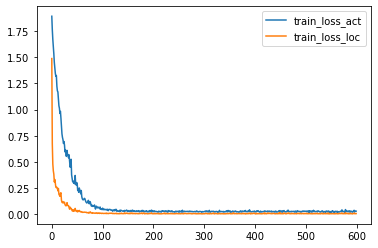

In [23]:
# train loss act vs loc
train_loss_act_df = pd.DataFrame(train_loss_act)
train_loss_act_df = train_loss_act_df.rename(columns={0:'train_loss_act'})
train_loss_loc_df = pd.DataFrame(train_loss_loc)
train_loss_loc_df = train_loss_loc_df.rename(columns={0:'train_loss_loc'})
pd.concat([train_loss_act_df,train_loss_loc_df], axis=1).plot()

<AxesSubplot:>

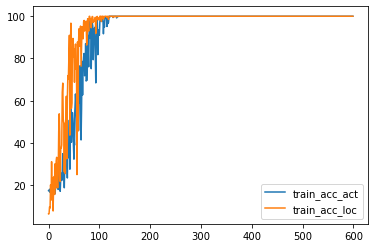

In [24]:
# train acc act vs loc
train_acc_act_df = pd.DataFrame(train_acc_act)
train_acc_act_df = train_acc_act_df.rename(columns={0:'train_acc_act'})
train_acc_loc_df = pd.DataFrame(train_acc_loc)
train_acc_loc_df = train_acc_loc_df.rename(columns={0:'train_acc_loc'})
pd.concat([train_acc_act_df,train_acc_loc_df], axis=1).plot()

<AxesSubplot:>

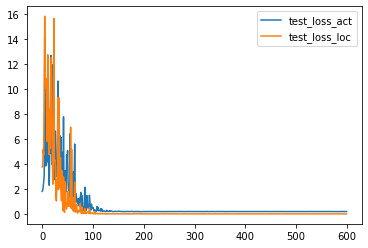

In [25]:
# test loss act vs loc
test_loss_act_df = pd.DataFrame(test_loss_act)
test_loss_act_df = test_loss_act_df.rename(columns={0:'test_loss_act'})
test_loss_loc_df = pd.DataFrame(test_loss_loc)
test_loss_loc_df = test_loss_loc_df.rename(columns={0:'test_loss_loc'})
pd.concat([test_loss_act_df,test_loss_loc_df], axis=1).plot()

<AxesSubplot:>

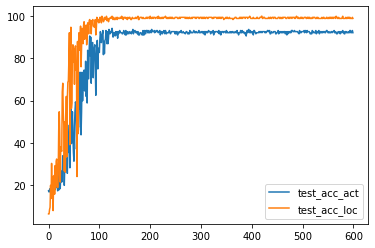

In [26]:
# test acc act vs loc
test_acc_act_df = pd.DataFrame(test_acc_act)
test_acc_act_df = test_acc_act_df.rename(columns={0:'test_acc_act'})
test_acc_loc_df = pd.DataFrame(test_acc_loc)
test_acc_loc_df = test_acc_loc_df.rename(columns={0:'test_acc_loc'})
pd.concat([test_acc_act_df,test_acc_loc_df], axis=1).plot()

# Resnet

In [27]:
from models.apl import *

In [28]:
# aplnet = DenseNet()
aplnet = ResNet(block=BasicBlock, layers=[1, 1, 1, 1], inchannel=52)
# aplnet = ResNet(block=BasicBlock, layers=[2, 2, 2, 2], inchannel=52)
# aplnet = ResNet(block=BasicBlock, layers=[3, 4, 6, 3], inchannel=52)
#

# aplnet = ResNet(block=Bottleneck, layers=[2, 3, 4, 6])

aplnet = aplnet.cuda()

criterion = nn.CrossEntropyLoss(size_average=False).cuda()

optimizer = torch.optim.Adam(aplnet.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer,
                                                #  milestones=[10, 20, 30, 40, 60, 70, 80, 90, 100, 110, 120, 130,
                                                #              140, 150, 160, 170, 180, 190, 200, 250, 300, 350, 
                                                #              400, 450, 500, 550, 600],
                                                milestones = [i for i in range(20,600,20)],
                                                 gamma=0.5)

/home/user2/miniconda3/envs/torch_cuda111/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [29]:
sum(p.numel() for p in aplnet.parameters() if p.requires_grad)

3494438

In [30]:
train_loss_act = np.zeros([num_epochs, 1])
train_loss_loc = np.zeros([num_epochs, 1])
test_loss_act = np.zeros([num_epochs, 1])
test_loss_loc = np.zeros([num_epochs, 1])
train_acc_act = np.zeros([num_epochs, 1])
train_acc_loc = np.zeros([num_epochs, 1])
test_acc_act = np.zeros([num_epochs, 1])
test_acc_loc = np.zeros([num_epochs, 1])

In [31]:
for epoch in range(num_epochs):
    print('Epoch:', epoch)
    aplnet.train()
    scheduler.step()
    # for i, (samples, labels) in enumerate(train_data_loader):
    loss_x = 0
    loss_y = 0
    for (samples, labels) in tqdm(train_data_loader):
        samplesV = Variable(samples.cuda())
        labels_act = labels[:, 0].squeeze()
        labels_loc = labels[:, 1].squeeze()
        labelsV_act = Variable(labels_act.cuda())
        labelsV_loc = Variable(labels_loc.cuda())

        # Forward + Backward + Optimize
        optimizer.zero_grad()
        predict_label_act, predict_label_loc,_,_,_,_,_,_,_ = aplnet(samplesV)

        loss_act = criterion(predict_label_act, labelsV_act)
        loss_loc = criterion(predict_label_loc, labelsV_loc)

        loss = loss_act + loss_loc
        # loss = loss_loc
        # print(loss.item())
        loss.backward()
        optimizer.step()

        # loss = loss1+0.5*loss2+0.25*loss3+0.25*loss4
        # loss = loss1+loss2+loss3+loss4

        loss_x += loss_act.item()
        loss_y += loss_loc.item()

        # loss.backward()
        # optimizer.step()

    train_loss_act[epoch] = loss_x / num_train_instances
    train_loss_loc[epoch] = loss_y / num_train_instances

    aplnet.eval()
    # loss_x = 0
    correct_train_act = 0
    correct_train_loc = 0
    for i, (samples, labels) in enumerate(train_data_loader):
        with torch.no_grad():
            samplesV = Variable(samples.cuda())
            labels = labels.squeeze()

            labels_act = labels[:, 0].squeeze()
            labels_loc = labels[:, 1].squeeze()
            labelsV_act = Variable(labels_act.cuda())
            labelsV_loc = Variable(labels_loc.cuda())

            predict_label_act, predict_label_loc,_,_,_,_,_,_,_ = aplnet(samplesV)

            prediction = predict_label_loc.data.max(1)[1]
            correct_train_loc += prediction.eq(labelsV_loc.data.long()).sum()

            prediction = predict_label_act.data.max(1)[1]
            correct_train_act += prediction.eq(labelsV_act.data.long()).sum()

            loss_act = criterion(predict_label_act, labelsV_act)
            loss_loc = criterion(predict_label_loc, labelsV_loc)
            # loss_x += loss.item()

    print("Activity Training accuracy:", (100 * float(correct_train_act) / num_train_instances))
    print("Location Training accuracy:", (100 * float(correct_train_loc) / num_train_instances))
    print("Activity Training loss:", loss_x / num_train_instances )
    print("Location Training loss:", loss_y / num_train_instances)

    # train_loss[epoch] = loss_x / num_train_instances
    train_acc_act[epoch] = 100 * float(correct_train_act) / num_train_instances
    train_acc_loc[epoch] = 100 * float(correct_train_loc) / num_train_instances


    trainacc_act = str(100 * float(correct_train_act) / num_train_instances)[0:6]
    trainacc_loc = str(100 * float(correct_train_loc) / num_train_instances)[0:6]
    

    loss_x = 0
    loss_y = 0
    correct_test_act = 0
    correct_test_loc = 0
    for i, (samples, labels) in enumerate(test_data_loader):
        with torch.no_grad():
            samplesV = Variable(samples.cuda())
            labels_act = labels[:, 0].squeeze()
            labels_loc = labels[:, 1].squeeze()
            labelsV_act = Variable(labels_act.cuda())
            labelsV_loc = Variable(labels_loc.cuda())

        predict_label_act, predict_label_loc,_,_,_,_,_,_,_ = aplnet(samplesV)
        prediction = predict_label_act.data.max(1)[1]
        correct_test_act += prediction.eq(labelsV_act.data.long()).sum()

        prediction = predict_label_loc.data.max(1)[1]
        correct_test_loc += prediction.eq(labelsV_loc.data.long()).sum()

        loss_act = criterion(predict_label_act, labelsV_act)
        loss_loc = criterion(predict_label_loc, labelsV_loc)
        loss_x += loss_act.item()
        loss_y += loss_loc.item()

    print("Activity Test accuracy:", (100 * float(correct_test_act) / num_test_instances))
    print("Location Test accuracy:", (100 * float(correct_test_loc) / num_test_instances))
    print("Activity Test loss:", loss_x / num_test_instances )
    print("Location Test loss:", loss_y / num_test_instances)

    test_loss_act[epoch] = loss_x / num_test_instances
    test_acc_act[epoch] = 100 * float(correct_test_act) / num_test_instances

    test_loss_loc[epoch] = loss_y / num_test_instances
    test_acc_loc[epoch] = 100 * float(correct_test_loc) / num_test_instances

    testacc_act = str(100 * float(correct_test_act) / num_test_instances)[0:6]
    testacc_loc = str(100 * float(correct_test_loc) / num_test_instances)[0:6]

    if epoch == 0:
        temp_test = correct_test_act
        temp_train = correct_train_act
    elif correct_test_act > temp_test:
        torch.save(aplnet, 'weights/net1111epoch' + str(
            epoch) + 'Train' + trainacc_act + 'Test' + testacc_act + 'Train' + trainacc_loc + 'Test' + testacc_loc + '.pkl')

        temp_test = correct_test_act
        temp_train = correct_train_act


# for learning curves
sio.savemat(
    'result/net1111TrainLossAct_Train' + str(100 * float(temp_train) / num_train_instances)[
                                                                 0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'train_loss': train_loss_act})
sio.savemat(
    'result/net1111TestLossACT_Train' + str(100 * float(temp_train) / num_train_instances)[
                                                                0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'test_loss': test_loss_act})
sio.savemat(
    'result/net1111TrainLossLOC_Train' + str(100 * float(temp_train) / num_train_instances)[
                                 0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'train_loss': train_loss_loc})
sio.savemat(
    'result/net1111TestLossLOC_Train' + str(100 * float(temp_train) / num_train_instances)[
                                 0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'test_loss': test_loss_loc})

sio.savemat('result/net1111TrainAccuracyACT_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'train_acc': train_acc_act})
sio.savemat('result/net1111TestAccuracyACT_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'test_acc': test_acc_act})
print(str(100 * float(temp_test) / num_test_instances)[0:6])

sio.savemat('result/net1111TrainAccuracyLOC_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'train_acc': train_acc_loc})
sio.savemat('result/net1111TestAccuracyLOC_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'test_acc': test_acc_loc})

/home/user2/miniconda3/envs/torch_cuda111/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:129: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch: 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 69.07it/s]


Activity Training accuracy: 16.93069306930693
Location Training accuracy: 6.435643564356436
Activity Training loss: 1.8089651202211285
Location Training loss: 1.3256322105332177
Activity Test accuracy: 16.666666666666668
Location Test accuracy: 6.25
Activity Test loss: 1.88424547513326
Location Test loss: 3.9393741289774575
Epoch: 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.48it/s]


Activity Training accuracy: 17.02970297029703
Location Training accuracy: 6.435643564356436
Activity Training loss: 1.4953680586106706
Location Training loss: 0.574930716033029
Activity Test accuracy: 16.666666666666668
Location Test accuracy: 6.25
Activity Test loss: 1.9013775984446208
Location Test loss: 3.7752315998077393
Epoch: 2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.60it/s]


Activity Training accuracy: 18.415841584158414
Location Training accuracy: 6.930693069306931
Activity Training loss: 1.2477853605062654
Location Training loss: 0.3378366215394275
Activity Test accuracy: 18.75
Location Test accuracy: 6.770833333333333
Activity Test loss: 1.9534743229548137
Location Test loss: 5.350514729817708
Epoch: 3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.25it/s]


Activity Training accuracy: 16.93069306930693
Location Training accuracy: 18.415841584158414
Activity Training loss: 1.1264048963490099
Location Training loss: 0.3119001775684923
Activity Test accuracy: 15.104166666666666
Location Test accuracy: 17.1875
Activity Test loss: 3.004556655883789
Location Test loss: 5.306694984436035
Epoch: 4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.55it/s]


Activity Training accuracy: 33.76237623762376
Location Training accuracy: 22.07920792079208
Activity Training loss: 0.9641231083633877
Location Training loss: 0.2753172005757247
Activity Test accuracy: 28.645833333333332
Location Test accuracy: 19.791666666666668
Activity Test loss: 1.6667346954345703
Location Test loss: 4.043092966079712
Epoch: 5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.39it/s]


Activity Training accuracy: 23.861386138613863
Location Training accuracy: 11.98019801980198
Activity Training loss: 0.8569280567735729
Location Training loss: 0.21570453974280027
Activity Test accuracy: 23.4375
Location Test accuracy: 13.541666666666666
Activity Test loss: 2.4578065077463784
Location Test loss: 6.493964513142903
Epoch: 6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.67it/s]


Activity Training accuracy: 22.178217821782177
Location Training accuracy: 10.990099009900991
Activity Training loss: 0.7834364296186088
Location Training loss: 0.24037010362832853
Activity Test accuracy: 21.354166666666668
Location Test accuracy: 9.895833333333334
Activity Test loss: 3.941352685292562
Location Test loss: 5.113913377126058
Epoch: 7


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.47it/s]


Activity Training accuracy: 33.26732673267327
Location Training accuracy: 36.83168316831683
Activity Training loss: 0.6893604070833413
Location Training loss: 0.22809886979584645
Activity Test accuracy: 31.25
Location Test accuracy: 33.333333333333336
Activity Test loss: 3.1629506746927896
Location Test loss: 4.104747295379639
Epoch: 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.54it/s]


Activity Training accuracy: 45.34653465346535
Location Training accuracy: 40.495049504950494
Activity Training loss: 0.6054577780242013
Location Training loss: 0.20808768130765104
Activity Test accuracy: 40.625
Location Test accuracy: 38.020833333333336
Activity Test loss: 1.8980886936187744
Location Test loss: 3.6292432943979898
Epoch: 9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.22it/s]


Activity Training accuracy: 47.12871287128713
Location Training accuracy: 61.98019801980198
Activity Training loss: 0.5161579830811756
Location Training loss: 0.16529784391422084
Activity Test accuracy: 45.833333333333336
Location Test accuracy: 63.020833333333336
Activity Test loss: 1.502119541168213
Location Test loss: 1.1682267983754475
Epoch: 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.55it/s]


Activity Training accuracy: 38.613861386138616
Location Training accuracy: 40.59405940594059
Activity Training loss: 0.5400064770538028
Location Training loss: 0.17106060037518492
Activity Test accuracy: 39.0625
Location Test accuracy: 43.75
Activity Test loss: 2.0347299575805664
Location Test loss: 1.96787691116333
Epoch: 11


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.31it/s]


Activity Training accuracy: 58.91089108910891
Location Training accuracy: 60.59405940594059
Activity Training loss: 0.45759604897829564
Location Training loss: 0.1705303928639629
Activity Test accuracy: 48.958333333333336
Location Test accuracy: 54.6875
Activity Test loss: 1.6636794010798137
Location Test loss: 1.3937547206878662
Epoch: 12


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.57it/s]


Activity Training accuracy: 28.11881188118812
Location Training accuracy: 27.128712871287128
Activity Training loss: 0.3916281973961556
Location Training loss: 0.1636226762639414
Activity Test accuracy: 29.166666666666668
Location Test accuracy: 26.041666666666668
Activity Test loss: 2.6192137002944946
Location Test loss: 4.483064333597819
Epoch: 13


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.73it/s]


Activity Training accuracy: 31.683168316831683
Location Training accuracy: 29.306930693069308
Activity Training loss: 0.41639875563064427
Location Training loss: 0.1497499161427564
Activity Test accuracy: 31.770833333333332
Location Test accuracy: 28.645833333333332
Activity Test loss: 4.391770760218303
Location Test loss: 5.703470071156819
Epoch: 14


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.15it/s]


Activity Training accuracy: 50.693069306930695
Location Training accuracy: 59.306930693069305
Activity Training loss: 0.34681747927524076
Location Training loss: 0.1148880155959932
Activity Test accuracy: 50.520833333333336
Location Test accuracy: 58.333333333333336
Activity Test loss: 2.223890701929728
Location Test loss: 1.4765607515970867
Epoch: 15


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.49it/s]


Activity Training accuracy: 64.05940594059406
Location Training accuracy: 59.40594059405941
Activity Training loss: 0.2527901441744058
Location Training loss: 0.12117497472479792
Activity Test accuracy: 61.979166666666664
Location Test accuracy: 55.208333333333336
Activity Test loss: 1.4164692163467407
Location Test loss: 1.9818692207336426
Epoch: 16


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.10it/s]


Activity Training accuracy: 29.306930693069308
Location Training accuracy: 43.16831683168317
Activity Training loss: 0.20280762899039995
Location Training loss: 0.09381226336601937
Activity Test accuracy: 27.083333333333332
Location Test accuracy: 45.3125
Activity Test loss: 4.158772945404053
Location Test loss: 2.6722516218821206
Epoch: 17


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.51it/s]


Activity Training accuracy: 49.504950495049506
Location Training accuracy: 45.742574257425744
Activity Training loss: 0.194930365061996
Location Training loss: 0.09848234464626501
Activity Test accuracy: 47.916666666666664
Location Test accuracy: 47.916666666666664
Activity Test loss: 1.9253688255945842
Location Test loss: 3.3355982303619385
Epoch: 18


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.25it/s]


Activity Training accuracy: 45.24752475247525
Location Training accuracy: 46.83168316831683
Activity Training loss: 0.1577677042177408
Location Training loss: 0.07015208737684948
Activity Test accuracy: 42.1875
Location Test accuracy: 46.354166666666664
Activity Test loss: 2.191114664077759
Location Test loss: 2.216229279836019
Epoch: 19


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.63it/s]


Activity Training accuracy: 88.41584158415841
Location Training accuracy: 87.02970297029702
Activity Training loss: 0.0961631439699985
Location Training loss: 0.052301859383535855
Activity Test accuracy: 77.60416666666667
Location Test accuracy: 84.375
Activity Test loss: 0.8139159282048544
Location Test loss: 0.5014341274897257
Epoch: 20


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.67it/s]


Activity Training accuracy: 87.52475247524752
Location Training accuracy: 90.89108910891089
Activity Training loss: 0.06611923085580958
Location Training loss: 0.04491532444953918
Activity Test accuracy: 74.47916666666667
Location Test accuracy: 88.02083333333333
Activity Test loss: 0.881257951259613
Location Test loss: 0.37534679969151813
Epoch: 21


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 74.57it/s]


Activity Training accuracy: 88.61386138613861
Location Training accuracy: 88.81188118811882
Activity Training loss: 0.05072148099984273
Location Training loss: 0.0355164894963255
Activity Test accuracy: 75.52083333333333
Location Test accuracy: 81.77083333333333
Activity Test loss: 0.8434908986091614
Location Test loss: 0.5337301045656204
Epoch: 22


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.43it/s]


Activity Training accuracy: 89.5049504950495
Location Training accuracy: 90.5940594059406
Activity Training loss: 0.027921039279144588
Location Training loss: 0.026906259520219106
Activity Test accuracy: 78.125
Location Test accuracy: 83.33333333333333
Activity Test loss: 0.7784556945164999
Location Test loss: 0.45917679866154987
Epoch: 23


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.84it/s]


Activity Training accuracy: 84.05940594059406
Location Training accuracy: 87.52475247524752
Activity Training loss: 0.022714803596534352
Location Training loss: 0.020301414952419772
Activity Test accuracy: 75.52083333333333
Location Test accuracy: 83.85416666666667
Activity Test loss: 0.9043982028961182
Location Test loss: 0.4674939314524333
Epoch: 24


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.40it/s]


Activity Training accuracy: 88.7128712871287
Location Training accuracy: 92.67326732673267
Activity Training loss: 0.02032339655526794
Location Training loss: 0.018306130023285894
Activity Test accuracy: 77.08333333333333
Location Test accuracy: 87.5
Activity Test loss: 0.9983523885409037
Location Test loss: 0.40316277742385864
Epoch: 25


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.99it/s]


Activity Training accuracy: 94.05940594059406
Location Training accuracy: 95.74257425742574
Activity Training loss: 0.01748769463288902
Location Training loss: 0.016555275568867673
Activity Test accuracy: 80.72916666666667
Location Test accuracy: 89.0625
Activity Test loss: 0.7807676792144775
Location Test loss: 0.2775311867396037
Epoch: 26


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.57it/s]


Activity Training accuracy: 91.78217821782178
Location Training accuracy: 96.23762376237623
Activity Training loss: 0.012445945698435944
Location Training loss: 0.02261868709384805
Activity Test accuracy: 77.08333333333333
Location Test accuracy: 91.14583333333333
Activity Test loss: 0.6716194351514181
Location Test loss: 0.22367162257432938
Epoch: 27


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.51it/s]


Activity Training accuracy: 72.47524752475248
Location Training accuracy: 88.31683168316832
Activity Training loss: 0.012293355565259952
Location Training loss: 0.014911645709878147
Activity Test accuracy: 64.58333333333333
Location Test accuracy: 85.9375
Activity Test loss: 2.461288332939148
Location Test loss: 0.8264217178026835
Epoch: 28


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.69it/s]


Activity Training accuracy: 72.87128712871286
Location Training accuracy: 79.9009900990099
Activity Training loss: 0.009480125951294853
Location Training loss: 0.017844101668584463
Activity Test accuracy: 62.5
Location Test accuracy: 71.875
Activity Test loss: 1.3145099480946858
Location Test loss: 0.8686887423197428
Epoch: 29


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.13it/s]


Activity Training accuracy: 98.31683168316832
Location Training accuracy: 98.91089108910892
Activity Training loss: 0.00942501989331576
Location Training loss: 0.01457641838800789
Activity Test accuracy: 86.97916666666667
Location Test accuracy: 93.75
Activity Test loss: 0.4864835242430369
Location Test loss: 0.15684799477458
Epoch: 30


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.22it/s]


Activity Training accuracy: 99.60396039603961
Location Training accuracy: 99.20792079207921
Activity Training loss: 0.010144105111018266
Location Training loss: 0.012748192914641729
Activity Test accuracy: 83.85416666666667
Location Test accuracy: 93.75
Activity Test loss: 0.4938657184441884
Location Test loss: 0.2612757670382659
Epoch: 31


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.77it/s]


Activity Training accuracy: 90.29702970297029
Location Training accuracy: 94.55445544554455
Activity Training loss: 0.015471063362489832
Location Training loss: 0.017972218046093932
Activity Test accuracy: 78.64583333333333
Location Test accuracy: 89.58333333333333
Activity Test loss: 0.9823523759841919
Location Test loss: 0.3138948579629262
Epoch: 32


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.28it/s]


Activity Training accuracy: 87.42574257425743
Location Training accuracy: 80.89108910891089
Activity Training loss: 0.018430350352041793
Location Training loss: 0.018175469825763513
Activity Test accuracy: 76.04166666666667
Location Test accuracy: 80.72916666666667
Activity Test loss: 0.8707909087340037
Location Test loss: 1.0787103772163391
Epoch: 33


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.11it/s]


Activity Training accuracy: 96.43564356435644
Location Training accuracy: 96.63366336633663
Activity Training loss: 0.009772853700831386
Location Training loss: 0.011571967675544248
Activity Test accuracy: 84.89583333333333
Location Test accuracy: 91.14583333333333
Activity Test loss: 0.5263250271479288
Location Test loss: 0.2737346688906352
Epoch: 34


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.36it/s]


Activity Training accuracy: 80.5940594059406
Location Training accuracy: 84.15841584158416
Activity Training loss: 0.007547445034626687
Location Training loss: 0.016639271732604148
Activity Test accuracy: 69.27083333333333
Location Test accuracy: 78.64583333333333
Activity Test loss: 1.1040385762850444
Location Test loss: 0.8030415376027426
Epoch: 35


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.64it/s]


Activity Training accuracy: 94.15841584158416
Location Training accuracy: 92.67326732673267
Activity Training loss: 0.007831047940077168
Location Training loss: 0.024516115581045057
Activity Test accuracy: 81.25
Location Test accuracy: 88.54166666666667
Activity Test loss: 0.8221714993317922
Location Test loss: 0.38863969842592877
Epoch: 36


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.41it/s]


Activity Training accuracy: 86.83168316831683
Location Training accuracy: 95.84158415841584
Activity Training loss: 0.009250227325033434
Location Training loss: 0.018326563646297644
Activity Test accuracy: 74.47916666666667
Location Test accuracy: 86.97916666666667
Activity Test loss: 1.0383208592732747
Location Test loss: 0.3482998013496399
Epoch: 37


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.33it/s]


Activity Training accuracy: 93.96039603960396
Location Training accuracy: 91.38613861386139
Activity Training loss: 0.007266586414068052
Location Training loss: 0.006652997139066753
Activity Test accuracy: 81.25
Location Test accuracy: 86.97916666666667
Activity Test loss: 0.7352993289629618
Location Test loss: 0.38369714220364887
Epoch: 38


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.12it/s]


Activity Training accuracy: 89.9009900990099
Location Training accuracy: 90.0
Activity Training loss: 0.010313954728074594
Location Training loss: 0.005346072354529163
Activity Test accuracy: 78.125
Location Test accuracy: 86.45833333333333
Activity Test loss: 0.9532291889190674
Location Test loss: 0.506168931722641
Epoch: 39


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.34it/s]


Activity Training accuracy: 87.92079207920793
Location Training accuracy: 86.23762376237623
Activity Training loss: 0.02074618416257424
Location Training loss: 0.008763484332231012
Activity Test accuracy: 77.60416666666667
Location Test accuracy: 80.20833333333333
Activity Test loss: 0.8681414028008779
Location Test loss: 0.7510385513305664
Epoch: 40


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.38it/s]


Activity Training accuracy: 99.10891089108911
Location Training accuracy: 99.70297029702971
Activity Training loss: 0.007730502716385492
Location Training loss: 0.006825676294836667
Activity Test accuracy: 85.9375
Location Test accuracy: 93.75
Activity Test loss: 0.5154808561007181
Location Test loss: 0.24867850293715796
Epoch: 41


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.26it/s]


Activity Training accuracy: 95.84158415841584
Location Training accuracy: 93.46534653465346
Activity Training loss: 0.006704334442568297
Location Training loss: 0.0062450379870905735
Activity Test accuracy: 83.85416666666667
Location Test accuracy: 85.9375
Activity Test loss: 0.7375672260920206
Location Test loss: 0.503834088643392
Epoch: 42


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.005724495066569584
Location Training loss: 0.0040074428561890476
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.38782206177711487
Location Test loss: 0.11542062150935332
Epoch: 43


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.45it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.004429467804361098
Location Training loss: 0.004079983198996818
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 95.3125
Activity Test loss: 0.3859029213587443
Location Test loss: 0.10281824693083763
Epoch: 44


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.002885141452350239
Location Training loss: 0.002603606178913966
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.353662113348643
Location Test loss: 0.12158223303655784
Epoch: 45


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.79it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 100.0
Activity Training loss: 0.004112169692421903
Location Training loss: 0.004672990702461488
Activity Test accuracy: 87.5
Location Test accuracy: 94.79166666666667
Activity Test loss: 0.33411361773808795
Location Test loss: 0.15499706069628397
Epoch: 46


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.003211266259745796
Location Training loss: 0.005484387735919197
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.35170934597651166
Location Test loss: 0.12118197542925675
Epoch: 47


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.002893726129343014
Location Training loss: 0.004470058486308202
Activity Test accuracy: 86.97916666666667
Location Test accuracy: 96.875
Activity Test loss: 0.39505061507225037
Location Test loss: 0.08790400996804237
Epoch: 48


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0019646649829822014
Location Training loss: 0.002677961188082648
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 95.3125
Activity Test loss: 0.34972434242566425
Location Test loss: 0.11369662669797738
Epoch: 49


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.37it/s]


Activity Training accuracy: 99.4059405940594
Location Training accuracy: 99.70297029702971
Activity Training loss: 0.0018451419649737897
Location Training loss: 0.002449937592638601
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 94.79166666666667
Activity Test loss: 0.39168572425842285
Location Test loss: 0.19885999957720438
Epoch: 50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0018921146372167191
Location Training loss: 0.0018945229156772689
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33538957436879474
Location Test loss: 0.1301575774947802
Epoch: 51


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.54it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.002161648382644842
Location Training loss: 0.0018020876821610006
Activity Test accuracy: 89.0625
Location Test accuracy: 95.3125
Activity Test loss: 0.392835408449173
Location Test loss: 0.12722144275903702
Epoch: 52


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.66it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0016028561214409252
Location Training loss: 0.002272060126213744
Activity Test accuracy: 89.0625
Location Test accuracy: 95.3125
Activity Test loss: 0.399310568968455
Location Test loss: 0.13647620317836603
Epoch: 53


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.002640545257542393
Location Training loss: 0.0015208064292622084
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34100718299547833
Location Test loss: 0.0937423041711251
Epoch: 54


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.002346081297733996
Location Training loss: 0.0018628617545755784
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3798372745513916
Location Test loss: 0.10274606694777806
Epoch: 55


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0019492210949411486
Location Training loss: 0.0017204606444528787
Activity Test accuracy: 87.5
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.36670687794685364
Location Test loss: 0.11982582447429498
Epoch: 56


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.38it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001763340384505763
Location Training loss: 0.0022055545840227956
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3639174203077952
Location Test loss: 0.11959938270350297
Epoch: 57


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.64it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001760107068584697
Location Training loss: 0.0020559534172315407
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.36503203709920246
Location Test loss: 0.10994199570268393
Epoch: 58


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0018312570482197374
Location Training loss: 0.0018878053283632392
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.35222328702608746
Location Test loss: 0.11097216047346592
Epoch: 59


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.002225820233326147
Location Training loss: 0.001847868943863576
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34036945303281146
Location Test loss: 0.1143334371348222
Epoch: 60


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0019080304383936495
Location Training loss: 0.0020681807347158396
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.35699159900347394
Location Test loss: 0.10927315863470237
Epoch: 61


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0016582643189052544
Location Training loss: 0.001124271403739948
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.3125
Activity Test loss: 0.3490784664948781
Location Test loss: 0.11781008914113045
Epoch: 62


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0015054059611393673
Location Training loss: 0.0012594191265283244
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33674729863802594
Location Test loss: 0.11574806272983551
Epoch: 63


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0014127763596796753
Location Training loss: 0.0016379479023784693
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 95.3125
Activity Test loss: 0.3335314492384593
Location Test loss: 0.10927377827465534
Epoch: 64


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001344107117245693
Location Training loss: 0.0011497762533697752
Activity Test accuracy: 90.625
Location Test accuracy: 95.3125
Activity Test loss: 0.3315250873565674
Location Test loss: 0.11624596205850442
Epoch: 65


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0013166538227607708
Location Training loss: 0.0012923927737934755
Activity Test accuracy: 90.625
Location Test accuracy: 95.3125
Activity Test loss: 0.3386596043904622
Location Test loss: 0.11172538623213768
Epoch: 66


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001496010867528396
Location Training loss: 0.0013208775163286984
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3348615566889445
Location Test loss: 0.11688835484286149
Epoch: 67


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010457665982222793
Location Training loss: 0.0010729289586001104
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3304058909416199
Location Test loss: 0.12061366687218349
Epoch: 68


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012556016223855538
Location Training loss: 0.0011503359321320412
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3312305410703023
Location Test loss: 0.11976089080174764
Epoch: 69


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012371437716307027
Location Training loss: 0.0020545121097918784
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3394322991371155
Location Test loss: 0.1123330673823754
Epoch: 70


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.10it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012245095307284062
Location Training loss: 0.0014888705114031783
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3367599844932556
Location Test loss: 0.11617235435793798
Epoch: 71


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010664705131756198
Location Training loss: 0.0012564478349862713
Activity Test accuracy: 90.625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3308924635251363
Location Test loss: 0.1287012038131555
Epoch: 72


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009953037568248145
Location Training loss: 0.0010899660537148465
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3309556345144908
Location Test loss: 0.11710090624789397
Epoch: 73


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010482280745659723
Location Training loss: 0.0013299708835559315
Activity Test accuracy: 90.625
Location Test accuracy: 95.3125
Activity Test loss: 0.3344975809256236
Location Test loss: 0.1179049201309681
Epoch: 74


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.80it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0014600222469261378
Location Training loss: 0.0012702334709096662
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.34703774253527325
Location Test loss: 0.11982947339614232
Epoch: 75


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001029621809720993
Location Training loss: 0.0012255982154666788
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.3125
Activity Test loss: 0.33502047260602313
Location Test loss: 0.121501790980498
Epoch: 76


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.54it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011876621569442277
Location Training loss: 0.0012406322957560568
Activity Test accuracy: 90.625
Location Test accuracy: 95.3125
Activity Test loss: 0.31782445311546326
Location Test loss: 0.11936702330907185
Epoch: 77


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.91it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010102261816806132
Location Training loss: 0.0011438358575105666
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.320403128862381
Location Test loss: 0.12577648212512335
Epoch: 78


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0013405985079041802
Location Training loss: 0.0010312861108248777
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3381969134012858
Location Test loss: 0.12993198446929455
Epoch: 79


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0016167758567498462
Location Training loss: 0.002238813061082717
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3229359984397888
Location Test loss: 0.12146398921807607
Epoch: 80


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010524108120710542
Location Training loss: 0.0010449212026035432
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 95.3125
Activity Test loss: 0.3332887589931488
Location Test loss: 0.12653288121024767
Epoch: 81


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.80it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009567209067616133
Location Training loss: 0.0013335010608529101
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3347095847129822
Location Test loss: 0.126085818434755
Epoch: 82


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001255022760222454
Location Training loss: 0.001063431692447993
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3396930793921153
Location Test loss: 0.12623968409995237
Epoch: 83


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011724519626338883
Location Training loss: 0.0009261243192866298
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34311020374298096
Location Test loss: 0.12322904914617538
Epoch: 84


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.81it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000904797967338916
Location Training loss: 0.0012164788117798248
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3375279903411865
Location Test loss: 0.1214092243462801
Epoch: 85


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007051271598527927
Location Training loss: 0.0015793897580392289
Activity Test accuracy: 90.625
Location Test accuracy: 95.3125
Activity Test loss: 0.354728360970815
Location Test loss: 0.10898940016825993
Epoch: 86


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.21it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001070532560496047
Location Training loss: 0.0016189145975478805
Activity Test accuracy: 90.625
Location Test accuracy: 95.3125
Activity Test loss: 0.34904346863428753
Location Test loss: 0.11943819063405196
Epoch: 87


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008404331410875415
Location Training loss: 0.0009568205287698472
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.34473588069279987
Location Test loss: 0.11813482952614625
Epoch: 88


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.25it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010879948661468998
Location Training loss: 0.0014524117204369885
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3389176030953725
Location Test loss: 0.12266790121793747
Epoch: 89


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0013128372001470906
Location Training loss: 0.0014312661870723904
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3384519914786021
Location Test loss: 0.12067273817956448
Epoch: 90


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.08it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009594980203131638
Location Training loss: 0.0010283224745699674
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3265347381432851
Location Test loss: 0.13407264649868011
Epoch: 91


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.12it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011784191326339646
Location Training loss: 0.0012163460512857626
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33710842331250507
Location Test loss: 0.11131458605329196
Epoch: 92


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010062122108912704
Location Training loss: 0.001000787706879696
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33301111062367755
Location Test loss: 0.10716541980703671
Epoch: 93


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009459382199709959
Location Training loss: 0.0007864418780744666
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3290592133998871
Location Test loss: 0.11563571356236935
Epoch: 94


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0013499591112284377
Location Training loss: 0.0011280231970814195
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 95.3125
Activity Test loss: 0.33051638801892597
Location Test loss: 0.10778333495060603
Epoch: 95


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011994862099095147
Location Training loss: 0.0014228204763171697
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33870983123779297
Location Test loss: 0.11336420600612958
Epoch: 96


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009404609274893704
Location Training loss: 0.001192481301282302
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3384730915228526
Location Test loss: 0.11747143138200045
Epoch: 97


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012516002309056792
Location Training loss: 0.001522881216784515
Activity Test accuracy: 90.625
Location Test accuracy: 95.3125
Activity Test loss: 0.3435201148192088
Location Test loss: 0.11938397586345673
Epoch: 98


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.53it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009044409830971519
Location Training loss: 0.0009402868144287921
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3419558008511861
Location Test loss: 0.11501903211077054
Epoch: 99


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.91it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010380676071537604
Location Training loss: 0.0011792789480768809
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33749111493428546
Location Test loss: 0.11501949280500412
Epoch: 100


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011547056109745904
Location Training loss: 0.0012335509504422103
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3348846932252248
Location Test loss: 0.11704853425423305
Epoch: 101


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.91it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009151157452770979
Location Training loss: 0.0009956924263203497
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33966411153475445
Location Test loss: 0.11985497083514929
Epoch: 102


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008329328592165862
Location Training loss: 0.0011977001932440418
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3366267879803975
Location Test loss: 0.11649338155984879
Epoch: 103


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008845314494158962
Location Training loss: 0.0008992613560639985
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34595240155855816
Location Test loss: 0.11550659810503323
Epoch: 104


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011549756133762917
Location Training loss: 0.0012010724606490372
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33610905210177106
Location Test loss: 0.12361416810502608
Epoch: 105


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0017819212343875724
Location Training loss: 0.0010913306957866886
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34699689348538715
Location Test loss: 0.12180830848713715
Epoch: 106


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.04it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009397109583167746
Location Training loss: 0.0010778051035681573
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.35283329089482623
Location Test loss: 0.12162198002139728
Epoch: 107


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0016427915358897484
Location Training loss: 0.0012499653282436994
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.35426737864812213
Location Test loss: 0.12051033166547616
Epoch: 108


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.12it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0013465549427979064
Location Training loss: 0.001387559969236355
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3377755383650462
Location Test loss: 0.11789720070858796
Epoch: 109


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.84it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0014466618307598746
Location Training loss: 0.0015810451036927724
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33982287844022113
Location Test loss: 0.11835382754604022
Epoch: 110


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008260479584188744
Location Training loss: 0.0008364356537856678
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3440937002499898
Location Test loss: 0.12387563567608595
Epoch: 111


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008251151863006081
Location Training loss: 0.0008131596324319887
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34323811531066895
Location Test loss: 0.12175837531685829
Epoch: 112


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.84it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001383054131033397
Location Training loss: 0.0009603980688913034
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34327541788419086
Location Test loss: 0.12158874608576298
Epoch: 113


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010019177884453593
Location Training loss: 0.0008108404861523373
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3460407555103302
Location Test loss: 0.1229180321097374
Epoch: 114


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.07it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007460811479699493
Location Training loss: 0.0007061581118124546
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3435533046722412
Location Test loss: 0.11908993621667226
Epoch: 115


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007747931073945347
Location Training loss: 0.0008407374917723165
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34047730763753253
Location Test loss: 0.12284418505926926
Epoch: 116


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011837496173263777
Location Training loss: 0.0014344423640482496
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33836085597674054
Location Test loss: 0.12512553917864958
Epoch: 117


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.03it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010659081179021609
Location Training loss: 0.0010304624399188722
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3339863717556
Location Test loss: 0.13388124977548918
Epoch: 118


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008993694355877319
Location Training loss: 0.0009924691152011994
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33837592601776123
Location Test loss: 0.12075048126280308
Epoch: 119


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008601758684409727
Location Training loss: 0.0009314329925887656
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3431546489397685
Location Test loss: 0.12303804606199265
Epoch: 120


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.25it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011320212819051034
Location Training loss: 0.0009090623735348777
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3406875630219777
Location Test loss: 0.12257530602316062
Epoch: 121


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007931057419074644
Location Training loss: 0.0008369022371745346
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34070732196172077
Location Test loss: 0.11833788268268108
Epoch: 122


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000697174625895401
Location Training loss: 0.0010060177525818938
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.339905709028244
Location Test loss: 0.11536096346875031
Epoch: 123


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.75it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000983277483299227
Location Training loss: 0.0010097450383081295
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3386072317759196
Location Test loss: 0.12546178077658018
Epoch: 124


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010672311953241283
Location Training loss: 0.0012292737251903751
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3428255220254262
Location Test loss: 0.12102413922548294
Epoch: 125


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.54it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008507869953271187
Location Training loss: 0.0008087462275335104
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33643852670987445
Location Test loss: 0.11948555087049802
Epoch: 126


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008365433829108087
Location Training loss: 0.001037573082243452
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34498583277066547
Location Test loss: 0.11737420813490947
Epoch: 127


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010073540676938425
Location Training loss: 0.001055324854015714
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34213046232859295
Location Test loss: 0.12195380683988333
Epoch: 128


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001204818310123859
Location Training loss: 0.0010068724651147824
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3476497332255046
Location Test loss: 0.1248598446448644
Epoch: 129


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007142601147441581
Location Training loss: 0.0006882807479636504
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34484140078226727
Location Test loss: 0.12584708941479525
Epoch: 130


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.002118755924967256
Location Training loss: 0.0012104236603815957
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3492450217405955
Location Test loss: 0.11657753338416417
Epoch: 131


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009897557778818773
Location Training loss: 0.001168572600230132
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34797602891921997
Location Test loss: 0.11345096056660016
Epoch: 132


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009996169071533893
Location Training loss: 0.0008019674975093048
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34463244676589966
Location Test loss: 0.1141161738584439
Epoch: 133


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010902176472810236
Location Training loss: 0.0014686154662677557
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34160707394282025
Location Test loss: 0.1239311130096515
Epoch: 134


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.43it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011153154296450096
Location Training loss: 0.0016540318284884539
Activity Test accuracy: 90.625
Location Test accuracy: 95.3125
Activity Test loss: 0.34583136439323425
Location Test loss: 0.12674492535491785
Epoch: 135


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006727992474000053
Location Training loss: 0.0013781423099560313
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3356691797574361
Location Test loss: 0.12108375194172065
Epoch: 136


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.36it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009993653246524311
Location Training loss: 0.001147959016189717
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3391428093115489
Location Test loss: 0.11828842324515183
Epoch: 137


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.21it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008326411099717168
Location Training loss: 0.001016247019835628
Activity Test accuracy: 90.625
Location Test accuracy: 95.3125
Activity Test loss: 0.33624348044395447
Location Test loss: 0.1251115327080091
Epoch: 138


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008486164807535634
Location Training loss: 0.0010133886949555708
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3403766353925069
Location Test loss: 0.11894565323988597
Epoch: 139


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008174727716953447
Location Training loss: 0.0008926104034970302
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33521926403045654
Location Test loss: 0.1153279294570287
Epoch: 140


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010079795476233605
Location Training loss: 0.0009709098016714105
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3401884237925212
Location Test loss: 0.12172817563017209
Epoch: 141


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000902838448044097
Location Training loss: 0.0011282151030136806
Activity Test accuracy: 90.625
Location Test accuracy: 95.3125
Activity Test loss: 0.3365190327167511
Location Test loss: 0.11869634253283341
Epoch: 142


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0014154073238225266
Location Training loss: 0.0009832319978735234
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3346527616182963
Location Test loss: 0.12083413451910019
Epoch: 143


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010467215800786963
Location Training loss: 0.0009487890352559562
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.34414557615915936
Location Test loss: 0.11712351938088734
Epoch: 144


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.04it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008030885424796897
Location Training loss: 0.0011383285174275388
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3449608385562897
Location Test loss: 0.11628140012423198
Epoch: 145


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008808338092547832
Location Training loss: 0.0007640494882027701
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34038389722506207
Location Test loss: 0.11748567658166091
Epoch: 146


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007138328552983776
Location Training loss: 0.0006136285233320577
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3380691707134247
Location Test loss: 0.12084067488710086
Epoch: 147


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.57it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009185898901507406
Location Training loss: 0.0009320643426168083
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33567960063616437
Location Test loss: 0.11495993658900261
Epoch: 148


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007920073050231036
Location Training loss: 0.0008745079491250586
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33818673094113666
Location Test loss: 0.12473872335006793
Epoch: 149


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008857191789268267
Location Training loss: 0.0009671465798032166
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33674462636311847
Location Test loss: 0.12199838769932587
Epoch: 150


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007027457938483445
Location Training loss: 0.0006702607036522119
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3399283091227214
Location Test loss: 0.12290911376476288
Epoch: 151


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.78it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008378576321324499
Location Training loss: 0.0007186446025377453
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3415420750776927
Location Test loss: 0.12665653166671595
Epoch: 152


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.21it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007904619476435208
Location Training loss: 0.0008246972695878236
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3385666012763977
Location Test loss: 0.12128386211891969
Epoch: 153


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0013627887491394978
Location Training loss: 0.002415329365447016
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.3125
Activity Test loss: 0.34376441438992816
Location Test loss: 0.1285386880238851
Epoch: 154


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00069739202240316
Location Training loss: 0.0010584008704760286
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.344103068113327
Location Test loss: 0.12798438966274261
Epoch: 155


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001746384262817331
Location Training loss: 0.0011980697383532429
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33534255623817444
Location Test loss: 0.11881453295548756
Epoch: 156


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.03it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011064048635192436
Location Training loss: 0.0007980008969212522
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.331583966811498
Location Test loss: 0.11823463502029578
Epoch: 157


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000704654828082807
Location Training loss: 0.0008611309000908738
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33473917841911316
Location Test loss: 0.11780624898771445
Epoch: 158


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.41it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010344136893601702
Location Training loss: 0.0012968457811097108
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33246379097302753
Location Test loss: 0.11444634385406971
Epoch: 159


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010909404494974873
Location Training loss: 0.0011119559185929818
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3373119533061981
Location Test loss: 0.11913160420954227
Epoch: 160


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006795480976452922
Location Training loss: 0.0007478830893293466
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3348264793554942
Location Test loss: 0.11964588550229867
Epoch: 161


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000928894664612737
Location Training loss: 0.000892721177401519
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33809642990430194
Location Test loss: 0.11900764827926953
Epoch: 162


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.54it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006825391166280992
Location Training loss: 0.0007770320068639104
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33253345886866253
Location Test loss: 0.12055031458536784
Epoch: 163


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.04it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006773422186327453
Location Training loss: 0.0015190913203624215
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3371509512265523
Location Test loss: 0.11149382839600246
Epoch: 164


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009128521943446434
Location Training loss: 0.0010066783258525453
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33605409661928815
Location Test loss: 0.11123669768373172
Epoch: 165


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010956947756285715
Location Training loss: 0.0009051170347645732
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33576412002245587
Location Test loss: 0.11983899399638176
Epoch: 166


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.53it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001160981480290394
Location Training loss: 0.0028857864273509177
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33937374750773114
Location Test loss: 0.11565151624381542
Epoch: 167


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010950512501715433
Location Training loss: 0.0015568886579263328
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3335317373275757
Location Test loss: 0.11726244445890188
Epoch: 168


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009347529989658015
Location Training loss: 0.0020396184415952994
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.328893502553304
Location Test loss: 0.11783319463332494
Epoch: 169


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007364276556832955
Location Training loss: 0.0008978746407250366
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3349997401237488
Location Test loss: 0.11639873000482719
Epoch: 170


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008430527283413576
Location Training loss: 0.0007923002659094216
Activity Test accuracy: 90.625
Location Test accuracy: 95.3125
Activity Test loss: 0.33162257075309753
Location Test loss: 0.12525236047804356
Epoch: 171


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007748686330448283
Location Training loss: 0.0011959665445703091
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3365978201230367
Location Test loss: 0.12473584525287151
Epoch: 172


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008521066406870833
Location Training loss: 0.0007770267158451647
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3361547787984212
Location Test loss: 0.11445873354872067
Epoch: 173


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008699577744349394
Location Training loss: 0.0009075545881054189
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.332306573788325
Location Test loss: 0.11957531111935775
Epoch: 174


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009312831898136894
Location Training loss: 0.0009415005010986092
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3283962309360504
Location Test loss: 0.12041974440217018
Epoch: 175


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006846787223573959
Location Training loss: 0.001335410712895417
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3305130402247111
Location Test loss: 0.12233348873754342
Epoch: 176


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006772366158737994
Location Training loss: 0.000845850554138127
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33594146370887756
Location Test loss: 0.11623120990892251
Epoch: 177


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.61it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008367836032763566
Location Training loss: 0.0007925322998573284
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33831364909807843
Location Test loss: 0.11177836606899898
Epoch: 178


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008971428498625756
Location Training loss: 0.0009547979229747659
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33435548345247906
Location Test loss: 0.11521441613634427
Epoch: 179


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009924214794346602
Location Training loss: 0.0009724233981848944
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33745211362838745
Location Test loss: 0.1096810232847929
Epoch: 180


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.38it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008295015072320947
Location Training loss: 0.001005683800592871
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33267571528752643
Location Test loss: 0.11581077054142952
Epoch: 181


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009748614549931913
Location Training loss: 0.0009018036767397777
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3357948263486226
Location Test loss: 0.11207922299702962
Epoch: 182


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.14it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009204239870357041
Location Training loss: 0.0007101842211467205
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3331792652606964
Location Test loss: 0.11923004190127055
Epoch: 183


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0014076680037202222
Location Training loss: 0.0011054604083742246
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3413683275381724
Location Test loss: 0.1153021790087223
Epoch: 184


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000876394707230058
Location Training loss: 0.00098332994165692
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33597798148790997
Location Test loss: 0.1167787133405606
Epoch: 185


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008089370416975258
Location Training loss: 0.0013449827061578778
Activity Test accuracy: 90.625
Location Test accuracy: 95.3125
Activity Test loss: 0.33684858679771423
Location Test loss: 0.1225404894600312
Epoch: 186


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.45it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001057228742923477
Location Training loss: 0.0007186801809042987
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33087342977523804
Location Test loss: 0.12210662414630254
Epoch: 187


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008984693279950926
Location Training loss: 0.000997503522304025
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3327805797259013
Location Test loss: 0.11505158618092537
Epoch: 188


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007204182538213116
Location Training loss: 0.0007260691485192516
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33199790120124817
Location Test loss: 0.11734089565773805
Epoch: 189


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.36it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007576518904159565
Location Training loss: 0.001107424805586291
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34439807136853534
Location Test loss: 0.11777997637788455
Epoch: 190


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.14it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000702269902766341
Location Training loss: 0.0007601934107075824
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3402017454306285
Location Test loss: 0.11543120257556438
Epoch: 191


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007393424445302179
Location Training loss: 0.0006469730638188891
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33374441663424176
Location Test loss: 0.12300347598890464
Epoch: 192


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.21it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007704634053429754
Location Training loss: 0.001166933225375591
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3375861843427022
Location Test loss: 0.11763133543233077
Epoch: 193


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000886954116349173
Location Training loss: 0.0009344895397967631
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33441950877507526
Location Test loss: 0.11976027364532153
Epoch: 194


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007984416006077634
Location Training loss: 0.0008690354312853057
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3392349084218343
Location Test loss: 0.11852542745570342
Epoch: 195


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.27it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008592112100507954
Location Training loss: 0.0009514456559525858
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33885954817136127
Location Test loss: 0.11944629934926827
Epoch: 196


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008927444198934158
Location Training loss: 0.0007011167317776397
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33450575669606525
Location Test loss: 0.12359786033630371
Epoch: 197


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009045430246998769
Location Training loss: 0.0010489376132736112
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33702871203422546
Location Test loss: 0.12016746588051319
Epoch: 198


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007011285807826731
Location Training loss: 0.0007390003005909448
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33300458391507465
Location Test loss: 0.11485707759857178
Epoch: 199


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.96it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006771965431842474
Location Training loss: 0.0007162263063658582
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3352552851041158
Location Test loss: 0.12055308806399505
Epoch: 200


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006717866563265867
Location Training loss: 0.0008258480246704404
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3401471475760142
Location Test loss: 0.11613162234425545
Epoch: 201


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00133569520704522
Location Training loss: 0.00163002261836635
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3355925182501475
Location Test loss: 0.11885665419201057
Epoch: 202


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.64it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010044288609435063
Location Training loss: 0.0011200507235999155
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3412531316280365
Location Test loss: 0.11901116309066613
Epoch: 203


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000715488186198296
Location Training loss: 0.0006962313086237058
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33216076095898944
Location Test loss: 0.11638876733680566
Epoch: 204


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006576641785478828
Location Training loss: 0.0008660686488198762
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3301365077495575
Location Test loss: 0.11525917612016201
Epoch: 205


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009030336735419708
Location Training loss: 0.0010079651075129462
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3387950360774994
Location Test loss: 0.11673648779590924
Epoch: 206


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.53it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008976615375221366
Location Training loss: 0.0008013812972619982
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33615628878275555
Location Test loss: 0.11503938026726246
Epoch: 207


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009116466627410143
Location Training loss: 0.0011058266376062194
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3381680945555369
Location Test loss: 0.11974353312204282
Epoch: 208


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.63it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006799511002874611
Location Training loss: 0.0006110161874849018
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3368217349052429
Location Test loss: 0.11751932029922803
Epoch: 209


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007444732702604615
Location Training loss: 0.0007504585282047196
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3442426522572835
Location Test loss: 0.12235784282286961
Epoch: 210


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.95it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010952144732127094
Location Training loss: 0.0019441012053353951
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33441192905108136
Location Test loss: 0.11434481168786685
Epoch: 211


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.36it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007444605747661968
Location Training loss: 0.0007377123367963451
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3316321273644765
Location Test loss: 0.1157590492318074
Epoch: 212


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.05it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010782922295355562
Location Training loss: 0.0009259165587401626
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33171387513478595
Location Test loss: 0.11561566777527332
Epoch: 213


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008228879514159543
Location Training loss: 0.0009856316565286995
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3368430236975352
Location Test loss: 0.12642546091228724
Epoch: 214


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.52it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008830370049517934
Location Training loss: 0.0007881798421834955
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33345619837443036
Location Test loss: 0.12068438964585464
Epoch: 215


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010952020561931157
Location Training loss: 0.0014952256906740737
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33292876680692035
Location Test loss: 0.11539546959102154
Epoch: 216


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.03it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000839723950934292
Location Training loss: 0.0012532624480600405
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3287443121274312
Location Test loss: 0.11450556479394436
Epoch: 217


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.08it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008685264994602392
Location Training loss: 0.0016861169091840782
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3334161937236786
Location Test loss: 0.11737238677839439
Epoch: 218


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010406676513871344
Location Training loss: 0.000838667063946181
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3316546082496643
Location Test loss: 0.11591324085990588
Epoch: 219


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.81it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011077120900154114
Location Training loss: 0.0010281219543649418
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3351714611053467
Location Test loss: 0.11818332721789677
Epoch: 220


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008050917988956565
Location Training loss: 0.0007795483427177561
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3339242835839589
Location Test loss: 0.1167738592873017
Epoch: 221


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.30it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000840448210071219
Location Training loss: 0.0006196935098655153
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33362048864364624
Location Test loss: 0.12168538632492225
Epoch: 222


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.97it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009681844327709462
Location Training loss: 0.0010132059842200562
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.333745817343394
Location Test loss: 0.11558263065914313
Epoch: 223


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.42it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008050421381940936
Location Training loss: 0.0007145179951987645
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3310045103232066
Location Test loss: 0.12072878517210484
Epoch: 224


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008992385100757722
Location Training loss: 0.0010368270817959662
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34286099672317505
Location Test loss: 0.11429614077011745
Epoch: 225


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.21it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006353146442682436
Location Training loss: 0.0009477043727246842
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33831825852394104
Location Test loss: 0.11886811318496864
Epoch: 226


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007602616222483097
Location Training loss: 0.000843927201510656
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3347392777601878
Location Test loss: 0.11347691776851813
Epoch: 227


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0019726843877446534
Location Training loss: 0.0020626171833217732
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33875112732251483
Location Test loss: 0.12306959306200345
Epoch: 228


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.28it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007607842233068872
Location Training loss: 0.000851684150350566
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33616740504900616
Location Test loss: 0.11519267223775387
Epoch: 229


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010322047213074004
Location Training loss: 0.0022724013794029113
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33979956309000653
Location Test loss: 0.11379696863392989
Epoch: 230


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.12it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001214520920916359
Location Training loss: 0.001402657613674603
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3387012879053752
Location Test loss: 0.12027906440198421
Epoch: 231


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007889173150357633
Location Training loss: 0.0011168072977573566
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3380405604839325
Location Test loss: 0.11485553222397964
Epoch: 232


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009091664769566885
Location Training loss: 0.0017211952938301729
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3392392098903656
Location Test loss: 0.11787587342162927
Epoch: 233


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009318075391768229
Location Training loss: 0.001515938431983537
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.329764187335968
Location Test loss: 0.11353236436843872
Epoch: 234


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.25it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008354222955237521
Location Training loss: 0.0008365561890572604
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33171310027440387
Location Test loss: 0.11704788791636626
Epoch: 235


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.91it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008223795433445733
Location Training loss: 0.0008169517418978238
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3331760764122009
Location Test loss: 0.11034055923422177
Epoch: 236


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007053623215691878
Location Training loss: 0.0008980063297370873
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33973278601964313
Location Test loss: 0.12164568218092124
Epoch: 237


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000747144200129084
Location Training loss: 0.000725344269730077
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33672993381818134
Location Test loss: 0.11862468719482422
Epoch: 238


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001072594591665386
Location Training loss: 0.0016443351062365098
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3412995437781016
Location Test loss: 0.11324737841884296
Epoch: 239


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010000733474251067
Location Training loss: 0.0010587810750792522
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34164785345395404
Location Test loss: 0.11380649482210477
Epoch: 240


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.08it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007868903218814642
Location Training loss: 0.0009530311505688299
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3327426612377167
Location Test loss: 0.11814662006994088
Epoch: 241


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008047965050923942
Location Training loss: 0.001013866406266052
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3362625539302826
Location Test loss: 0.11911079784234364
Epoch: 242


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007706464941401293
Location Training loss: 0.0008496239855147824
Activity Test accuracy: 90.625
Location Test accuracy: 95.3125
Activity Test loss: 0.3382463256518046
Location Test loss: 0.1192749875287215
Epoch: 243


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.45it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007836910813014106
Location Training loss: 0.001027261412305997
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33132179578145343
Location Test loss: 0.11654311915238698
Epoch: 244


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.14it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008332765172466193
Location Training loss: 0.0009703905791929452
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33523936072985333
Location Test loss: 0.12041139168043931
Epoch: 245


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010154195388059806
Location Training loss: 0.0008824208400922246
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33482662836710614
Location Test loss: 0.11587102773288886
Epoch: 246


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008410222053822905
Location Training loss: 0.0010871318749862142
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3355272014935811
Location Test loss: 0.11558213209112485
Epoch: 247


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009072693193903063
Location Training loss: 0.0010177374771325894
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3358364899953206
Location Test loss: 0.11290157896776994
Epoch: 248


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008082555551635157
Location Training loss: 0.001063597023413323
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3333619038263957
Location Test loss: 0.11877921596169472
Epoch: 249


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007214843101873256
Location Training loss: 0.0007506763654770238
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3365823030471802
Location Test loss: 0.11825244811673959
Epoch: 250


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011294071756229541
Location Training loss: 0.0008362579629710406
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3387484649817149
Location Test loss: 0.11943233447770278
Epoch: 251


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.95it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001293802667077225
Location Training loss: 0.0016039122449289455
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33578553795814514
Location Test loss: 0.11918386568625768
Epoch: 252


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.25it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008901479183742316
Location Training loss: 0.0007749074977813381
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3319896658261617
Location Test loss: 0.12114863159755866
Epoch: 253


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009958103704865615
Location Training loss: 0.0009547971945145342
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33898327747980755
Location Test loss: 0.10943670260409515
Epoch: 254


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.91it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007832571956338268
Location Training loss: 0.0007648132649241108
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33715327580769855
Location Test loss: 0.11494822551806767
Epoch: 255


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007611011256380836
Location Training loss: 0.0006941369541063167
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3368276158968608
Location Test loss: 0.1179494746029377
Epoch: 256


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007111542240375339
Location Training loss: 0.0006544383261168357
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34221797188123065
Location Test loss: 0.11355864815413952
Epoch: 257


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.21it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008543175967908142
Location Training loss: 0.0009219745598217048
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3363087276617686
Location Test loss: 0.1178038405875365
Epoch: 258


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010376317205257936
Location Training loss: 0.0008074627580619095
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3389069338639577
Location Test loss: 0.1093995701521635
Epoch: 259


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009362608600075882
Location Training loss: 0.0013735717678866764
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3288801908493042
Location Test loss: 0.11280387205382188
Epoch: 260


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009028563939846388
Location Training loss: 0.0009943763808448716
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3401053249835968
Location Test loss: 0.1121118888258934
Epoch: 261


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010091698276672033
Location Training loss: 0.0011502608398694803
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3366081813971202
Location Test loss: 0.1103440411388874
Epoch: 262


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008211194509916966
Location Training loss: 0.000658242904239952
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33383434017499286
Location Test loss: 0.115778892301023
Epoch: 263


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.27it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009124393952955114
Location Training loss: 0.0012475840913334696
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33760754267374676
Location Test loss: 0.12001711005965869
Epoch: 264


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.40it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010585464020766834
Location Training loss: 0.0007979199640674166
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33536375562349957
Location Test loss: 0.1216853279620409
Epoch: 265


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.61it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009081480065637296
Location Training loss: 0.0007854547314714677
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33465902010599774
Location Test loss: 0.12026559623579185
Epoch: 266


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008730854046079192
Location Training loss: 0.0008441260139835943
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3314141432444255
Location Test loss: 0.11914572554330032
Epoch: 267


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.07it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009625313987973893
Location Training loss: 0.0013803713134314755
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33802367250124615
Location Test loss: 0.11659971003731091
Epoch: 268


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001217397117968833
Location Training loss: 0.0015378525757258482
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3331259985764821
Location Test loss: 0.11387811601161957
Epoch: 269


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006754651462825218
Location Training loss: 0.0006786168820344576
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34055736660957336
Location Test loss: 0.10966488439589739
Epoch: 270


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006912227886000482
Location Training loss: 0.0007185059627241427
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3370042145252228
Location Test loss: 0.11785335031648476
Epoch: 271


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007645214548205385
Location Training loss: 0.000754149160393984
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3395038843154907
Location Test loss: 0.10721927446623643
Epoch: 272


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009057073586500517
Location Training loss: 0.001055808723120406
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33544860283533734
Location Test loss: 0.12312079779803753
Epoch: 273


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.14it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001206333313764322
Location Training loss: 0.0018361245899802387
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3368665079275767
Location Test loss: 0.11986351447800796
Epoch: 274


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008486890317042275
Location Training loss: 0.0009053029544135131
Activity Test accuracy: 90.625
Location Test accuracy: 95.3125
Activity Test loss: 0.3328778346379598
Location Test loss: 0.11793322612841924
Epoch: 275


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.12it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001040301339165999
Location Training loss: 0.0007977816746524064
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33525099356969196
Location Test loss: 0.11129880572358768
Epoch: 276


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000679010256092147
Location Training loss: 0.0007081760831251003
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33520105481147766
Location Test loss: 0.11487649381160736
Epoch: 277


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007372797457593502
Location Training loss: 0.0007000589798582663
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33486949404080707
Location Test loss: 0.11701876670122147
Epoch: 278


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009680451862145178
Location Training loss: 0.0008983105955885189
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3371019661426544
Location Test loss: 0.1168285459280014
Epoch: 279


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.03it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008596686535690091
Location Training loss: 0.0006927631076167125
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.34046733379364014
Location Test loss: 0.11531156301498413
Epoch: 280


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.42it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006996031979670619
Location Training loss: 0.0006989028489235604
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3367126981417338
Location Test loss: 0.11427007677654426
Epoch: 281


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007309262336480736
Location Training loss: 0.0008085209581226405
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33448540170987445
Location Test loss: 0.12002366346617539
Epoch: 282


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.07it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008026062188172104
Location Training loss: 0.0007053287755144704
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33503801623980206
Location Test loss: 0.11868879323204358
Epoch: 283


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006989762094793934
Location Training loss: 0.000840095163203112
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3330291211605072
Location Test loss: 0.1225073082993428
Epoch: 284


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.84it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007325665619556266
Location Training loss: 0.0007942649489729711
Activity Test accuracy: 90.625
Location Test accuracy: 95.3125
Activity Test loss: 0.33913712700208026
Location Test loss: 0.11608675370613734
Epoch: 285


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007616095466188866
Location Training loss: 0.0006882498114563451
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33595380187034607
Location Test loss: 0.1154571274916331
Epoch: 286


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008298254765496396
Location Training loss: 0.0008913157415567059
Activity Test accuracy: 90.625
Location Test accuracy: 95.3125
Activity Test loss: 0.33677775661150616
Location Test loss: 0.11474558773140113
Epoch: 287


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007325503477218127
Location Training loss: 0.0009499480154844794
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33399222294489544
Location Test loss: 0.1203747106095155
Epoch: 288


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.51it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009186265547529305
Location Training loss: 0.0009733501969292612
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33366580804189044
Location Test loss: 0.11846665106713772
Epoch: 289


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.97it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010482067979945995
Location Training loss: 0.0008692690844435503
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3344332079092662
Location Test loss: 0.1157325009504954
Epoch: 290


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007826014394217199
Location Training loss: 0.0008128592799795736
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3270815412203471
Location Test loss: 0.11981440335512161
Epoch: 291


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010108193493272998
Location Training loss: 0.0008574228494031594
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33330251773198444
Location Test loss: 0.1167010273784399
Epoch: 292


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000683026445457841
Location Training loss: 0.0009051806505511302
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33579228321711224
Location Test loss: 0.11528682118902604
Epoch: 293


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007272317765815423
Location Training loss: 0.0010928624945849474
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33331860105196637
Location Test loss: 0.11688920048375924
Epoch: 294


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007045182353346655
Location Training loss: 0.0006338066799510824
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3384470542271932
Location Test loss: 0.1188895267744859
Epoch: 295


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.27it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000692168628741609
Location Training loss: 0.0006771957040718286
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33647658427556354
Location Test loss: 0.11127366249759992
Epoch: 296


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011644689753504082
Location Training loss: 0.0022588388146002696
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3356647491455078
Location Test loss: 0.11841314037640889
Epoch: 297


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007450458861076006
Location Training loss: 0.0008965994959863106
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3331569830576579
Location Test loss: 0.11592070509990056
Epoch: 298


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.76it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007976686176244575
Location Training loss: 0.0007930216278032501
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3359062771002452
Location Test loss: 0.11928517060975234
Epoch: 299


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007540197231539406
Location Training loss: 0.0006440293578670757
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3325830101966858
Location Test loss: 0.12373147904872894
Epoch: 300


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007112752461787497
Location Training loss: 0.0009333645906483773
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3390112320582072
Location Test loss: 0.11562066090603669
Epoch: 301


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000904906319804711
Location Training loss: 0.0007641773338955228
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33346254626909894
Location Test loss: 0.11462179198861122
Epoch: 302


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008812696774407188
Location Training loss: 0.0008499846360323453
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3374048372109731
Location Test loss: 0.12197990032533805
Epoch: 303


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008793224552922909
Location Training loss: 0.0007407952026270404
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33838321765263873
Location Test loss: 0.11237369167308013
Epoch: 304


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.99it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007269180057072404
Location Training loss: 0.0007246872428620215
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3332465390364329
Location Test loss: 0.11412354310353597
Epoch: 305


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008000652130582545
Location Training loss: 0.0007176524599884996
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.32922284801801044
Location Test loss: 0.11411194720615943
Epoch: 306


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001109384404181844
Location Training loss: 0.0009291047783623827
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33457287152608234
Location Test loss: 0.11234193357328574
Epoch: 307


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008852115933700363
Location Training loss: 0.0007143202652730564
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33393757541974384
Location Test loss: 0.11453364541133244
Epoch: 308


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000728740779185059
Location Training loss: 0.0008363215031452698
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33628880977630615
Location Test loss: 0.10961833409965038
Epoch: 309


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011447592149719152
Location Training loss: 0.001103473137510885
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3343471984068553
Location Test loss: 0.1142920299122731
Epoch: 310


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000705924034487493
Location Training loss: 0.0008717254726308407
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33550865451494855
Location Test loss: 0.10572667854527633
Epoch: 311


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.90it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006600964039859206
Location Training loss: 0.001017585182839101
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33486876885096234
Location Test loss: 0.11642265071471532
Epoch: 312


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009333412079970435
Location Training loss: 0.0016322069165140096
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33852163950602215
Location Test loss: 0.10943040810525417
Epoch: 313


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.43it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007116599155977221
Location Training loss: 0.0007677387980983989
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3364277084668477
Location Test loss: 0.11491284519433975
Epoch: 314


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0013089817718114002
Location Training loss: 0.0009596986345725484
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33527297774950665
Location Test loss: 0.11590743126968543
Epoch: 315


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.04it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000996105994402182
Location Training loss: 0.0008869659745752221
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3322068353494008
Location Test loss: 0.11875968923171361
Epoch: 316


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000817713513970375
Location Training loss: 0.000732398191743558
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.337000568707784
Location Test loss: 0.11772722316284974
Epoch: 317


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008068979856106314
Location Training loss: 0.0008255641612381038
Activity Test accuracy: 90.625
Location Test accuracy: 95.3125
Activity Test loss: 0.33680526415507
Location Test loss: 0.12018733347455661
Epoch: 318


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007653801932488338
Location Training loss: 0.001159693900090043
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3394014338652293
Location Test loss: 0.11998847064872582
Epoch: 319


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009513156414769664
Location Training loss: 0.0009581212138775551
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3325345317522685
Location Test loss: 0.11334364488720894
Epoch: 320


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.25it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010735446144596184
Location Training loss: 0.0009125943009806152
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.334841509660085
Location Test loss: 0.1176752174894015
Epoch: 321


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007458726313002039
Location Training loss: 0.0007941684731752565
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3371968666712443
Location Test loss: 0.11407336468497913
Epoch: 322


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00069260656427924
Location Training loss: 0.0006290912609731797
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33460742235183716
Location Test loss: 0.11596355525155862
Epoch: 323


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.59it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007794860031197566
Location Training loss: 0.0006017761858235491
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33681116501490277
Location Test loss: 0.11714825282494228
Epoch: 324


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.71it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008968999535583033
Location Training loss: 0.0011075661619110863
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3417023917039235
Location Test loss: 0.11566604239245255
Epoch: 325


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007096146574557418
Location Training loss: 0.0008131106651507982
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3336707254250844
Location Test loss: 0.11586262161533038
Epoch: 326


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009680649929560056
Location Training loss: 0.0008462712482208073
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3325524727503459
Location Test loss: 0.11908801831305027
Epoch: 327


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000979416168267184
Location Training loss: 0.0009300072336255914
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3376058240731557
Location Test loss: 0.1161170198271672
Epoch: 328


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.03it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008522549828532898
Location Training loss: 0.0007560306864947376
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34055044253667194
Location Test loss: 0.11662030592560768
Epoch: 329


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.10it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008634402407425465
Location Training loss: 0.0009857396014256053
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33669395248095196
Location Test loss: 0.10769096141060193
Epoch: 330


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.10it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006984042022192832
Location Training loss: 0.0006546676712165965
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.337886114915212
Location Test loss: 0.11554061310986678
Epoch: 331


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.84it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00090472743210226
Location Training loss: 0.0007472162070398283
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3370732565720876
Location Test loss: 0.11801810190081596
Epoch: 332


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.40it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008797420446973036
Location Training loss: 0.0009044493281162611
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33913002411524457
Location Test loss: 0.1192975789308548
Epoch: 333


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.57it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007641925024661687
Location Training loss: 0.0006680509997623982
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3374593257904053
Location Test loss: 0.11809872711698215
Epoch: 334


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.53it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008968677851233152
Location Training loss: 0.0008804004252104476
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.334949254989624
Location Test loss: 0.11331485273937385
Epoch: 335


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.61it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006784642428749859
Location Training loss: 0.0007011513954194465
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3317883809407552
Location Test loss: 0.1169030163437128
Epoch: 336


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.003324026795159472
Location Training loss: 0.0010733722810550492
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33263133962949115
Location Test loss: 0.11732803968091805
Epoch: 337


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.54it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009829738776725118
Location Training loss: 0.0008080335204849149
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3386835952599843
Location Test loss: 0.11909678267935912
Epoch: 338


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.27it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007656869745933184
Location Training loss: 0.0008902614235435382
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33522817492485046
Location Test loss: 0.12179623482127984
Epoch: 339


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0016890099511878325
Location Training loss: 0.005235552518527107
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33592668175697327
Location Test loss: 0.11433906046052773
Epoch: 340


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010773481579847855
Location Training loss: 0.0008249888860500685
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.331386536359787
Location Test loss: 0.11189564317464828
Epoch: 341


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.18it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0016490448063405433
Location Training loss: 0.0012894150496709465
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.333543340365092
Location Test loss: 0.11529340222477913
Epoch: 342


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009309150499872642
Location Training loss: 0.0012912755075952793
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33402902881304425
Location Test loss: 0.11305422615259886
Epoch: 343


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006820171001819101
Location Training loss: 0.0007835664592757084
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3313521146774292
Location Test loss: 0.11640087763468425
Epoch: 344


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.81it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005967745889383968
Location Training loss: 0.0006824073759783613
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3357241153717041
Location Test loss: 0.1118730033437411
Epoch: 345


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008259696424892634
Location Training loss: 0.0007006371522894
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33205126722653705
Location Test loss: 0.11407390981912613
Epoch: 346


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.57it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010373998285815268
Location Training loss: 0.0007526800903205824
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3346121410528819
Location Test loss: 0.10930787399411201
Epoch: 347


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.53it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007705749095518991
Location Training loss: 0.0006373838327898838
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3366062045097351
Location Test loss: 0.11159204505383968
Epoch: 348


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00069311044114356
Location Training loss: 0.0007648772495512915
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3348997433980306
Location Test loss: 0.114207507421573
Epoch: 349


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008751416910845455
Location Training loss: 0.0013176150195816957
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3342955708503723
Location Test loss: 0.11230828613042831
Epoch: 350


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007750199517548675
Location Training loss: 0.0007620965693109107
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33585578203201294
Location Test loss: 0.11590878944844007
Epoch: 351


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010340122284718078
Location Training loss: 0.0010759395722410466
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33596325914065045
Location Test loss: 0.11926338759561379
Epoch: 352


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007514508016923867
Location Training loss: 0.0007851906600269941
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3338577151298523
Location Test loss: 0.11703288679321606
Epoch: 353


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006320618996673291
Location Training loss: 0.0006338079764258743
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33505865931510925
Location Test loss: 0.12033393854896228
Epoch: 354


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.76it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008359449316221888
Location Training loss: 0.0008756152806010576
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33817524711290997
Location Test loss: 0.11626198204855125
Epoch: 355


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007814312464382389
Location Training loss: 0.0005980830196992005
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33598725001017254
Location Test loss: 0.11385306902229786
Epoch: 356


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006426296870012094
Location Training loss: 0.0007308907456474729
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33636367321014404
Location Test loss: 0.1169191791365544
Epoch: 357


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012135833262069391
Location Training loss: 0.0009415372228710958
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33517634868621826
Location Test loss: 0.1207968754072984
Epoch: 358


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008078602225621148
Location Training loss: 0.0010234974250935092
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3390127718448639
Location Test loss: 0.11107980428884427
Epoch: 359


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005911831365953578
Location Training loss: 0.0007598538357432526
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3372030357519786
Location Test loss: 0.1171704726293683
Epoch: 360


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006658089485498938
Location Training loss: 0.0006696134123324168
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33625290791193646
Location Test loss: 0.11421595917393763
Epoch: 361


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.10it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009565083402218205
Location Training loss: 0.00104010558991444
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33377360304196674
Location Test loss: 0.11925443510214488
Epoch: 362


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.84it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000756894334191733
Location Training loss: 0.0011499831729596204
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33650946617126465
Location Test loss: 0.11023347390194733
Epoch: 363


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.61it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008143441032360095
Location Training loss: 0.0012565689272072056
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3336085081100464
Location Test loss: 0.11836232927938302
Epoch: 364


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.38it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008886989040097388
Location Training loss: 0.0009387710675744727
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3332633872826894
Location Test loss: 0.11305885886152585
Epoch: 365


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007027015311293083
Location Training loss: 0.000986814434354258
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3335543672243754
Location Test loss: 0.11591919946173827
Epoch: 366


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.002401410893417231
Location Training loss: 0.0018453330557682726
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3391929566860199
Location Test loss: 0.11625237669795752
Epoch: 367


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007727955403451873
Location Training loss: 0.0007905746819359241
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3382723232110341
Location Test loss: 0.11476390063762665
Epoch: 368


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010228343307971954
Location Training loss: 0.0008421871276332601
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3371761540571849
Location Test loss: 0.11750742358465989
Epoch: 369


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007226617379796386
Location Training loss: 0.000825384508191359
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.32957600553830463
Location Test loss: 0.11880050040781498
Epoch: 370


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005921727083254568
Location Training loss: 0.000792282495168176
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33329063653945923
Location Test loss: 0.11888731519381206
Epoch: 371


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0013174229882436223
Location Training loss: 0.0008841996477677091
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33701151609420776
Location Test loss: 0.1119219536582629
Epoch: 372


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.21it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000728393856915507
Location Training loss: 0.0006364671015503383
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34063642223676044
Location Test loss: 0.11322074569761753
Epoch: 373


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000723080916127356
Location Training loss: 0.0007554589429556734
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3366071979204814
Location Test loss: 0.11241257873674233
Epoch: 374


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.30it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001287445853842367
Location Training loss: 0.001267033487115756
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34555622935295105
Location Test loss: 0.11540621146559715
Epoch: 375


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.14it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007099749170022436
Location Training loss: 0.0008069581416721392
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33991262316703796
Location Test loss: 0.11070718678335349
Epoch: 376


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.96it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008193750487695826
Location Training loss: 0.0006880442510441979
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3340708414713542
Location Test loss: 0.11731273867189884
Epoch: 377


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006896321246824643
Location Training loss: 0.0006687175593163708
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3370957871278127
Location Test loss: 0.11960488681991895
Epoch: 378


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007722220060848953
Location Training loss: 0.0009874517559119971
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3331587115923564
Location Test loss: 0.12138872469464938
Epoch: 379


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.40it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008389895339265908
Location Training loss: 0.0007226809158478633
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33379767338434857
Location Test loss: 0.11677050776779652
Epoch: 380


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.36it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000756752609026314
Location Training loss: 0.000862721706012098
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3364674548308055
Location Test loss: 0.1149448323994875
Epoch: 381


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.95it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0018250665194032216
Location Training loss: 0.0031574183909019622
Activity Test accuracy: 90.625
Location Test accuracy: 95.3125
Activity Test loss: 0.3290118674437205
Location Test loss: 0.12544543420275053
Epoch: 382


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.40it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007510213310470675
Location Training loss: 0.0007235956258407914
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33492245276769
Location Test loss: 0.12248315413792928
Epoch: 383


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006741467973973491
Location Training loss: 0.0006136387328405192
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33036190271377563
Location Test loss: 0.1229382964471976
Epoch: 384


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009618951358122401
Location Training loss: 0.0008354438026205148
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3325608770052592
Location Test loss: 0.1137149774779876
Epoch: 385


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.43it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006537881172677078
Location Training loss: 0.0007176561613041575
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33195435007413227
Location Test loss: 0.11669955899318059
Epoch: 386


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008130524786982206
Location Training loss: 0.0007231667656267043
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33672871192296344
Location Test loss: 0.11718609121938546
Epoch: 387


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008019680821216933
Location Training loss: 0.0006267956891419864
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33971303701400757
Location Test loss: 0.11538568635781606
Epoch: 388


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.25it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007530721623708706
Location Training loss: 0.0005670921987678745
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33793407678604126
Location Test loss: 0.11907870384554069
Epoch: 389


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008507253196422416
Location Training loss: 0.0007995705645863372
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33776819705963135
Location Test loss: 0.11528700465957324
Epoch: 390


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.05it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011339404998291836
Location Training loss: 0.0015137052200365775
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3412163257598877
Location Test loss: 0.11318296721825997
Epoch: 391


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007751935355291508
Location Training loss: 0.000750288144122846
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3407737910747528
Location Test loss: 0.11955335301657517
Epoch: 392


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.07it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008280920288940468
Location Training loss: 0.0009601717630382812
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3404359519481659
Location Test loss: 0.11164143060644467
Epoch: 393


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.84it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0014044545185152846
Location Training loss: 0.0011432263446916448
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3416149119536082
Location Test loss: 0.11294504689673583
Epoch: 394


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007702917303189193
Location Training loss: 0.0008560973523867012
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3368162214756012
Location Test loss: 0.11296266006926696
Epoch: 395


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008140794766863974
Location Training loss: 0.0009325803930659106
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33646488189697266
Location Test loss: 0.11600867348412673
Epoch: 396


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007565150129618031
Location Training loss: 0.0005981575716102477
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3360970119635264
Location Test loss: 0.11749809794127941
Epoch: 397


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00066638467372349
Location Training loss: 0.0007705549054806775
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3341853419939677
Location Test loss: 0.11971590388566256
Epoch: 398


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007839004112647312
Location Training loss: 0.0007037957152812788
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3360993266105652
Location Test loss: 0.11408160937329133
Epoch: 399


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008024754131784533
Location Training loss: 0.0012312016440647663
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3436712324619293
Location Test loss: 0.108718308309714
Epoch: 400


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007731209868694296
Location Training loss: 0.0006881162450455203
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3399575849374135
Location Test loss: 0.11408062527577083
Epoch: 401


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.11it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008574496309208398
Location Training loss: 0.0006198224786779669
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3380670448144277
Location Test loss: 0.11939725279808044
Epoch: 402


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008261997289586775
Location Training loss: 0.0009706000271852654
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33990101019541424
Location Test loss: 0.11574638076126575
Epoch: 403


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.30it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000779513723336824
Location Training loss: 0.0009107578969975509
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3400072753429413
Location Test loss: 0.11438506407042344
Epoch: 404


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012108128739170508
Location Training loss: 0.0010733040141882283
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3408835232257843
Location Test loss: 0.1122247197975715
Epoch: 405


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000861666851335823
Location Training loss: 0.0006520216897277549
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33803438146909076
Location Test loss: 0.10969266233344872
Epoch: 406


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.21it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008439795916328336
Location Training loss: 0.0009685825648726804
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33469196160634357
Location Test loss: 0.1180092915892601
Epoch: 407


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.40it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009849086366962678
Location Training loss: 0.0011813801243016036
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3399492104848226
Location Test loss: 0.11375118295351665
Epoch: 408


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.07it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007636747359860652
Location Training loss: 0.0011903484121407613
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33559797207514447
Location Test loss: 0.11467374674975872
Epoch: 409


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008691361856342542
Location Training loss: 0.0008201446587053856
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3349078993002574
Location Test loss: 0.11338872586687405
Epoch: 410


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008460889745614316
Location Training loss: 0.0008535449881807413
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.337711364030838
Location Test loss: 0.11535497878988583
Epoch: 411


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006797953130732668
Location Training loss: 0.000770907957881394
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33010415236155194
Location Test loss: 0.11658012121915817
Epoch: 412


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.99it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008185778550877429
Location Training loss: 0.0015134706042043053
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33398450414339703
Location Test loss: 0.11775351564089458
Epoch: 413


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001224419655333651
Location Training loss: 0.0008527107057299944
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3385396699110667
Location Test loss: 0.11343776558836301
Epoch: 414


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010773300165587132
Location Training loss: 0.0009303951580630671
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3364352782567342
Location Test loss: 0.11947963728259008
Epoch: 415


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.27it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008664037792546914
Location Training loss: 0.0010643676070883723
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3353877663612366
Location Test loss: 0.11304615624248981
Epoch: 416


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009268902205299623
Location Training loss: 0.0007293656689695792
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34333930412928265
Location Test loss: 0.11245946896572907
Epoch: 417


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008471678426065067
Location Training loss: 0.000677561003825452
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3320239881674449
Location Test loss: 0.11115950097640355
Epoch: 418


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.11it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001609172376960811
Location Training loss: 0.0009399921126147308
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3338157733281453
Location Test loss: 0.11358889564871788
Epoch: 419


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.72it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008132477798084222
Location Training loss: 0.0007379954975872937
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3371092875798543
Location Test loss: 0.1168582917501529
Epoch: 420


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.75it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008275773560646736
Location Training loss: 0.0008402476142538656
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3361051579316457
Location Test loss: 0.1163295612980922
Epoch: 421


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.18it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008026395712306004
Location Training loss: 0.0011840596149611002
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3364227811495463
Location Test loss: 0.12255721508214872
Epoch: 422


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.18it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007589206486792847
Location Training loss: 0.0007205447237385381
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33952998121579486
Location Test loss: 0.12125731632113457
Epoch: 423


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009649871452019947
Location Training loss: 0.000783887645690748
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33626983563105267
Location Test loss: 0.11414554839332898
Epoch: 424


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008159060381574206
Location Training loss: 0.0007843700818496175
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33501961827278137
Location Test loss: 0.11417572448650996
Epoch: 425


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006425804191149108
Location Training loss: 0.0006450786485825435
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33308542768160504
Location Test loss: 0.1189930693556865
Epoch: 426


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.80it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008763899842258728
Location Training loss: 0.0008294629781405525
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3375464379787445
Location Test loss: 0.10788140259683132
Epoch: 427


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010445204056283035
Location Training loss: 0.001304487896954069
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33838149905204773
Location Test loss: 0.10751868101457755
Epoch: 428


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009806504307111892
Location Training loss: 0.0009750162703123423
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33527878920237225
Location Test loss: 0.11882948937515418
Epoch: 429


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00082400910335012
Location Training loss: 0.0009721413236295823
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33661137024561566
Location Test loss: 0.11550641308228175
Epoch: 430


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009416342408645271
Location Training loss: 0.0017890015248172354
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33669371406237286
Location Test loss: 0.11752106497685115
Epoch: 431


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009247623715955432
Location Training loss: 0.001465168346346605
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3378496567408244
Location Test loss: 0.1155042505512635
Epoch: 432


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009589281486402643
Location Training loss: 0.000976208361363647
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3416312336921692
Location Test loss: 0.10871538519859314
Epoch: 433


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.81it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007131872200729823
Location Training loss: 0.0006443064770486095
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3381127119064331
Location Test loss: 0.11622890954216321
Epoch: 434


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.25it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0016812494909851858
Location Training loss: 0.0016338194840320266
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3434496720631917
Location Test loss: 0.11715834463636081
Epoch: 435


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.71it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007344092306966829
Location Training loss: 0.0007928352471035305
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33490435282389325
Location Test loss: 0.11508874719341596
Epoch: 436


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007120332818957839
Location Training loss: 0.0007439738213278279
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3383927543958028
Location Test loss: 0.11690859124064445
Epoch: 437


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.76it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008146281474002517
Location Training loss: 0.0008225040565622915
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3329390188058217
Location Test loss: 0.11812854185700417
Epoch: 438


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007838392519567272
Location Training loss: 0.0009173279831019959
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3316579759120941
Location Test loss: 0.12075128716727097
Epoch: 439


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000729358775338324
Location Training loss: 0.0007402169140111102
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33255616823832196
Location Test loss: 0.11580813800295194
Epoch: 440


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.54it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008325751096305281
Location Training loss: 0.000950424765965136
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33896103501319885
Location Test loss: 0.11487097168962161
Epoch: 441


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006971720421668327
Location Training loss: 0.0007099141615747225
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33199668924013775
Location Test loss: 0.11704165736834209
Epoch: 442


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0014834691244776886
Location Training loss: 0.001027227746378077
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 95.3125
Activity Test loss: 0.3384704391161601
Location Test loss: 0.11937124903003375
Epoch: 443


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008479138651844299
Location Training loss: 0.0008908491766098703
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3366077244281769
Location Test loss: 0.11636754435797532
Epoch: 444


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.36it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009024598940026642
Location Training loss: 0.0011769976725082587
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3354937434196472
Location Test loss: 0.11610572040081024
Epoch: 445


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007693784053225328
Location Training loss: 0.0008323658718773634
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3426612118879954
Location Test loss: 0.11371610934535663
Epoch: 446


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.61it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008731144083903567
Location Training loss: 0.0008990093991898074
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3373611370722453
Location Test loss: 0.11952831720312436
Epoch: 447


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009632049036203044
Location Training loss: 0.0010049056077357566
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3307581941286723
Location Test loss: 0.11746913194656372
Epoch: 448


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007072374694934576
Location Training loss: 0.0007699122965925991
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.335720956325531
Location Test loss: 0.11790825861195724
Epoch: 449


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007964991918294736
Location Training loss: 0.0008581064733685833
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3361603418986003
Location Test loss: 0.12404419481754303
Epoch: 450


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008854677218316805
Location Training loss: 0.0007816025895057338
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33525479833285016
Location Test loss: 0.125179223716259
Epoch: 451


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008569151974550568
Location Training loss: 0.0015358221376001245
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3356777826944987
Location Test loss: 0.11417220532894135
Epoch: 452


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001566690396480631
Location Training loss: 0.0012871244313693282
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3402465482552846
Location Test loss: 0.11821955939133962
Epoch: 453


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006968870390169691
Location Training loss: 0.0006181624745673472
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3365716536839803
Location Test loss: 0.10957650716106097
Epoch: 454


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008947174295340434
Location Training loss: 0.0008512873811149361
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33495858311653137
Location Test loss: 0.11858395424981912
Epoch: 455


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008093440849887263
Location Training loss: 0.0007550763962144899
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3341992497444153
Location Test loss: 0.12004271584252517
Epoch: 456


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010856079951961442
Location Training loss: 0.0007767090315718462
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3389839430650075
Location Test loss: 0.1187614481896162
Epoch: 457


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.12it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008492230557569183
Location Training loss: 0.0008280674143150301
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3335548937320709
Location Test loss: 0.11806009461482365
Epoch: 458


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009178544901827775
Location Training loss: 0.0007231813551175712
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33559610446294147
Location Test loss: 0.11152179539203644
Epoch: 459


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.40it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006902763970417551
Location Training loss: 0.0007187534160543196
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33485979835192364
Location Test loss: 0.12006838526576757
Epoch: 460


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008929283035421135
Location Training loss: 0.0007657433998319182
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3343234658241272
Location Test loss: 0.11870479645828406
Epoch: 461


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.99it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007524451941694363
Location Training loss: 0.0009165171386286764
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3331618408362071
Location Test loss: 0.11640191078186035
Epoch: 462


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.97it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008468269693231819
Location Training loss: 0.0007519841341689081
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33273962140083313
Location Test loss: 0.11638161726295948
Epoch: 463


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008896137670715257
Location Training loss: 0.0008373451299301468
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3309755325317383
Location Test loss: 0.1123196662714084
Epoch: 464


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011291270762091817
Location Training loss: 0.0009455392561336555
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3372284273306529
Location Test loss: 0.11848128773272038
Epoch: 465


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007406319168829682
Location Training loss: 0.0008835059636742762
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33747656146685284
Location Test loss: 0.11696334990362327
Epoch: 466


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.59it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006821411597256613
Location Training loss: 0.0006783813736078762
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3377243181069692
Location Test loss: 0.12143017475803693
Epoch: 467


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006929694665688099
Location Training loss: 0.0007937011244420958
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33268190423647565
Location Test loss: 0.11633347036937873
Epoch: 468


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007614010428585628
Location Training loss: 0.0007314511196743143
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34222041567166644
Location Test loss: 0.1194491960729162
Epoch: 469


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.64it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007619193708985159
Location Training loss: 0.0007545508757823765
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3403934935728709
Location Test loss: 0.11369959513346355
Epoch: 470


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007700951437991444
Location Training loss: 0.0007622050213636738
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33556950092315674
Location Test loss: 0.11801126661400001
Epoch: 471


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008397353093812962
Location Training loss: 0.0011054081565672808
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3349515696366628
Location Test loss: 0.11289690465976794
Epoch: 472


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011215344477112932
Location Training loss: 0.0012074748367661297
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.337789128224055
Location Test loss: 0.11893126554787159
Epoch: 473


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009748624121346096
Location Training loss: 0.0011358295410576432
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33541961510976154
Location Test loss: 0.11644484288990498
Epoch: 474


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007756940743858271
Location Training loss: 0.000982588732449135
Activity Test accuracy: 90.625
Location Test accuracy: 95.3125
Activity Test loss: 0.3316715955734253
Location Test loss: 0.11844038528700669
Epoch: 475


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009364667505320936
Location Training loss: 0.0008259233917192657
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34406380852063495
Location Test loss: 0.11898810975253582
Epoch: 476


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007058896456319507
Location Training loss: 0.0009453514295786914
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34118597706158954
Location Test loss: 0.11457587343951066
Epoch: 477


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.10it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009247398630964875
Location Training loss: 0.0006866718706960726
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3369581500689189
Location Test loss: 0.11350449671347936
Epoch: 478


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007564834328276097
Location Training loss: 0.0008407008124165016
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33526961008707684
Location Test loss: 0.11678225236634414
Epoch: 479


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007651577436245313
Location Training loss: 0.0007664249656666623
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3355532685915629
Location Test loss: 0.10956882871687412
Epoch: 480


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.07it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007715933762564518
Location Training loss: 0.0008402294617625746
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33795039852460224
Location Test loss: 0.11434529597560565
Epoch: 481


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008011207187382302
Location Training loss: 0.0006712920410503256
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3342410624027252
Location Test loss: 0.11643051542341709
Epoch: 482


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006853484373429034
Location Training loss: 0.0007557893503863033
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3323225776354472
Location Test loss: 0.11822185665369034
Epoch: 483


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008382438396168227
Location Training loss: 0.0009155305711054566
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3333424727121989
Location Test loss: 0.12296256981790066
Epoch: 484


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012064168395677416
Location Training loss: 0.0012591826351414813
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.334263135989507
Location Test loss: 0.1179186503092448
Epoch: 485


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.11it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008657308406021336
Location Training loss: 0.0007852506999037053
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3349348107973735
Location Test loss: 0.11666508081058662
Epoch: 486


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.59it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009124797759669842
Location Training loss: 0.0008363323728784476
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3393729825814565
Location Test loss: 0.11269548100729783
Epoch: 487


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000796643764444507
Location Training loss: 0.0007258752360939979
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.32986725370089215
Location Test loss: 0.12061169743537903
Epoch: 488


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.63it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009445447511602156
Location Training loss: 0.0006861156369052311
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33503981431325275
Location Test loss: 0.12074641386667888
Epoch: 489


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007409416139125824
Location Training loss: 0.0006902847789449267
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33274146914482117
Location Test loss: 0.12038672715425491
Epoch: 490


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010914020830451853
Location Training loss: 0.0015354315999268305
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33738290270169574
Location Test loss: 0.11360987027486165
Epoch: 491


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.002755863027702464
Location Training loss: 0.0010229231125795015
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3329252203305562
Location Test loss: 0.12121684725085895
Epoch: 492


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008091210544404417
Location Training loss: 0.0008853113739797384
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33886978030204773
Location Test loss: 0.11393812733391921
Epoch: 493


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009643317449210894
Location Training loss: 0.001039117237202602
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3337986469268799
Location Test loss: 0.1147085161258777
Epoch: 494


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007039893898043302
Location Training loss: 0.0009589585853685247
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3321627577145894
Location Test loss: 0.11247646001478036
Epoch: 495


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008132168820293823
Location Training loss: 0.0008095208039083104
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3381883502006531
Location Test loss: 0.11902885014812152
Epoch: 496


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.30it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008090614276652289
Location Training loss: 0.0007300350907267911
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33607544501622516
Location Test loss: 0.11587263830006123
Epoch: 497


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.30it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008704966044809559
Location Training loss: 0.0007835213482232377
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33383304874102276
Location Test loss: 0.11861871803800265
Epoch: 498


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.78it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012030470968768148
Location Training loss: 0.0008804091003419149
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33352432648340863
Location Test loss: 0.11322952527552843
Epoch: 499


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.90it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008236518185032476
Location Training loss: 0.000925572956036223
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3396325409412384
Location Test loss: 0.11775557789951563
Epoch: 500


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.04it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008534083161318656
Location Training loss: 0.001243641863733825
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33295154571533203
Location Test loss: 0.11297294249137242
Epoch: 501


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007074618214132762
Location Training loss: 0.0007350583901942366
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33680326739947003
Location Test loss: 0.11417571144799392
Epoch: 502


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008988390224847463
Location Training loss: 0.0006807219347741344
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33482863505681354
Location Test loss: 0.11607020162045956
Epoch: 503


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.95it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010011891585470427
Location Training loss: 0.0011384403499046175
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33553652962048847
Location Test loss: 0.11920591071248055
Epoch: 504


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00081793725453686
Location Training loss: 0.0006357510841571458
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34040046731630963
Location Test loss: 0.11375916531930368
Epoch: 505


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007494358936011201
Location Training loss: 0.00090463374473966
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33411547541618347
Location Test loss: 0.1188390680278341
Epoch: 506


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.59it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010002163967283645
Location Training loss: 0.0014335024401102917
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3353167275587718
Location Test loss: 0.1258716949572166
Epoch: 507


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.64it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008435832078356554
Location Training loss: 0.0009642057508082673
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3348748783270518
Location Test loss: 0.11606950623293717
Epoch: 508


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.51it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0013545189089704268
Location Training loss: 0.0008978138963627343
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33420037229855853
Location Test loss: 0.11678110435605049
Epoch: 509


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001043720041761304
Location Training loss: 0.0023416384870168006
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33584030469258624
Location Test loss: 0.11482331280906995
Epoch: 510


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0024276488967756235
Location Training loss: 0.00200594318754012
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33823821942011517
Location Test loss: 0.11451856854061286
Epoch: 511


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.36it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007779423479396518
Location Training loss: 0.0007852733264317607
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33510441581408185
Location Test loss: 0.11676428963740666
Epoch: 512


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007679915313821028
Location Training loss: 0.0008974473720582404
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3335228164990743
Location Test loss: 0.12376419454813004
Epoch: 513


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.11it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007711707254742632
Location Training loss: 0.0007639401859723695
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33597278594970703
Location Test loss: 0.12016608007252216
Epoch: 514


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.38it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006824206394871863
Location Training loss: 0.0007786810176797432
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3354509472846985
Location Test loss: 0.11432654100159804
Epoch: 515


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008480394037790818
Location Training loss: 0.000672509624521331
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33449816703796387
Location Test loss: 0.11770333039263885
Epoch: 516


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.71it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007328246378957635
Location Training loss: 0.000807891470739747
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3409973680973053
Location Test loss: 0.11616002209484577
Epoch: 517


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.03it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.002426009658392113
Location Training loss: 0.0013180609183883903
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34348442157109577
Location Test loss: 0.11541565538694461
Epoch: 518


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007232503910170923
Location Training loss: 0.0007157619175787019
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3357604344685872
Location Test loss: 0.1180921383202076
Epoch: 519


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.25it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006853531031767921
Location Training loss: 0.0007799970889740651
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33452163139979046
Location Test loss: 0.12355818475286166
Epoch: 520


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000861728574969981
Location Training loss: 0.0009174778264495406
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33735830585161847
Location Test loss: 0.11994130723178387
Epoch: 521


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007824512917806607
Location Training loss: 0.0009914729873290156
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3355956772963206
Location Test loss: 0.11743849391738574
Epoch: 522


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.45it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007579597838149213
Location Training loss: 0.000849493860386976
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3323834737141927
Location Test loss: 0.11860503753026326
Epoch: 523


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009452121313845757
Location Training loss: 0.0012951580125211489
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33632057905197144
Location Test loss: 0.11643256743748982
Epoch: 524


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00138026565165803
Location Training loss: 0.00105824694959539
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3327976167201996
Location Test loss: 0.1255278835693995
Epoch: 525


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.76it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009188992736658247
Location Training loss: 0.0011842416359646485
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3366660376389821
Location Test loss: 0.11490974730501573
Epoch: 526


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.52it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001696296541555093
Location Training loss: 0.0022276364617271
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33322300513585407
Location Test loss: 0.11737254013617833
Epoch: 527


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009046654760985092
Location Training loss: 0.0013533937901553542
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3415250877539317
Location Test loss: 0.11880816208819549
Epoch: 528


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007248403430722728
Location Training loss: 0.0007812609398128963
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33213098843892414
Location Test loss: 0.11696796864271164
Epoch: 529


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.14it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007151027532792327
Location Training loss: 0.0006845676921086736
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3328782816727956
Location Test loss: 0.11631621327251196
Epoch: 530


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.12it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009578235539616925
Location Training loss: 0.0011787545655180913
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3387485444545746
Location Test loss: 0.1154384675125281
Epoch: 531


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007258489709531906
Location Training loss: 0.0007080262379333524
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3367105921109517
Location Test loss: 0.11610033859809239
Epoch: 532


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.78it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010866765430805707
Location Training loss: 0.001042137938634594
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33679139614105225
Location Test loss: 0.11673754019041856
Epoch: 533


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000690513179812691
Location Training loss: 0.0008049400283558533
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3334008951981862
Location Test loss: 0.11671069264411926
Epoch: 534


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.05it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008054695543971393
Location Training loss: 0.0009397189215858384
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3368666172027588
Location Test loss: 0.11612218866745631
Epoch: 535


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009082311118888383
Location Training loss: 0.0007925836959540253
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33882712324460346
Location Test loss: 0.11484047211706638
Epoch: 536


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.78it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000961050819052328
Location Training loss: 0.000803997662692967
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3349619110425313
Location Test loss: 0.1166416872292757
Epoch: 537


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001521484502176247
Location Training loss: 0.0009982913253035876
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34100215633710224
Location Test loss: 0.11633757688105106
Epoch: 538


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.61it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000683075436713672
Location Training loss: 0.0011750561360380437
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33300645152727765
Location Test loss: 0.12075749722619851
Epoch: 539


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0015069390269051683
Location Training loss: 0.0022751691778845127
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3346620698769887
Location Test loss: 0.12299694120883942
Epoch: 540


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008350120802031885
Location Training loss: 0.0010238286052452455
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33671876788139343
Location Test loss: 0.11733733769506216
Epoch: 541


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000898977835653442
Location Training loss: 0.0008109461977192671
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34383217493693036
Location Test loss: 0.11078801130255063
Epoch: 542


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008557018482744104
Location Training loss: 0.0009090916465709705
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3360702196756999
Location Test loss: 0.11753753200173378
Epoch: 543


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009075250273736397
Location Training loss: 0.0009359064650270018
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33587674299875897
Location Test loss: 0.12047285959124565
Epoch: 544


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011860121576355235
Location Training loss: 0.00135923241182129
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3388947049776713
Location Test loss: 0.11893779908617337
Epoch: 545


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.84it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005656975902395673
Location Training loss: 0.0006758033122756694
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33431728680928546
Location Test loss: 0.11337211479743321
Epoch: 546


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.78it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009836010579573045
Location Training loss: 0.0009351920244274753
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3386336366335551
Location Test loss: 0.10735889213780563
Epoch: 547


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009760626250564461
Location Training loss: 0.0006618799125351528
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.336552490790685
Location Test loss: 0.11372528908153375
Epoch: 548


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.21it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007955557307099351
Location Training loss: 0.000825646634001543
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33555635809898376
Location Test loss: 0.11334299544493358
Epoch: 549


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008656390859644011
Location Training loss: 0.0008402861599432359
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3376062909762065
Location Test loss: 0.11742769740521908
Epoch: 550


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.11it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009260038319643181
Location Training loss: 0.0008605004740085933
Activity Test accuracy: 90.625
Location Test accuracy: 95.3125
Activity Test loss: 0.3366081317265828
Location Test loss: 0.1175225314994653
Epoch: 551


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006755151407848491
Location Training loss: 0.0006630546680771478
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34025096893310547
Location Test loss: 0.10999548124770324
Epoch: 552


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.63it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009676022399770152
Location Training loss: 0.0008489914109358693
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3387439250946045
Location Test loss: 0.11615531953672568
Epoch: 553


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001320622931465064
Location Training loss: 0.0009988508362433698
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3351631263891856
Location Test loss: 0.11853357714911301
Epoch: 554


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0017142019299144792
Location Training loss: 0.0008740640457461376
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33354611198107403
Location Test loss: 0.11618761780361335
Epoch: 555


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007767237317149001
Location Training loss: 0.0008423036997123519
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33396825194358826
Location Test loss: 0.1185461338609457
Epoch: 556


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.40it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00144018185979659
Location Training loss: 0.0015366616538993203
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3445965349674225
Location Test loss: 0.11600926021734874
Epoch: 557


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008306611882578028
Location Training loss: 0.0008846456885780439
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3407525022824605
Location Test loss: 0.11856438654164474
Epoch: 558


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.38it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007587877332721607
Location Training loss: 0.0011672883229975654
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33632319172223407
Location Test loss: 0.11856794729828835
Epoch: 559


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.79it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000587375019446458
Location Training loss: 0.0006226127137347023
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33509963750839233
Location Test loss: 0.11718427886565526
Epoch: 560


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008734185728106168
Location Training loss: 0.00077960153506829
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3350980182488759
Location Test loss: 0.11047735437750816
Epoch: 561


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.71it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009487111582466871
Location Training loss: 0.0009152530572644554
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.337620089451472
Location Test loss: 0.11521294713020325
Epoch: 562


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008146149908552075
Location Training loss: 0.0008277854817633582
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33657361070315045
Location Test loss: 0.11514837667346
Epoch: 563


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.72it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006595707120429171
Location Training loss: 0.0007878242503150855
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3352102041244507
Location Test loss: 0.11341987115641435
Epoch: 564


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006886952990057444
Location Training loss: 0.0007241514207112907
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33497827251752216
Location Test loss: 0.1106426939368248
Epoch: 565


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006572380680406447
Location Training loss: 0.0009054355710597322
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3325880765914917
Location Test loss: 0.12096957645068566
Epoch: 566


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000812682896704957
Location Training loss: 0.0007707277239106669
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3351447482903798
Location Test loss: 0.11712439109881718
Epoch: 567


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006606541905957873
Location Training loss: 0.000776946579687076
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3356964588165283
Location Test loss: 0.12072837290664513
Epoch: 568


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000853019126571051
Location Training loss: 0.0008369449839586079
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33573095003763836
Location Test loss: 0.11382551118731499
Epoch: 569


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.91it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011749413011982888
Location Training loss: 0.001909870423819169
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33697980642318726
Location Test loss: 0.11449823838969071
Epoch: 570


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010282902784719326
Location Training loss: 0.0006852914994158367
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33447781205177307
Location Test loss: 0.10900661411384742
Epoch: 571


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.64it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009050087929509654
Location Training loss: 0.0012849920217205982
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3408406376838684
Location Test loss: 0.11112743491927783
Epoch: 572


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007540971280472113
Location Training loss: 0.0007700272494613534
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3377688725789388
Location Test loss: 0.11532971511284511
Epoch: 573


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007574677393578067
Location Training loss: 0.0006694297592091088
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3345402975877126
Location Test loss: 0.11324330357213815
Epoch: 574


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006129374487860368
Location Training loss: 0.00074467188171526
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33560054500897724
Location Test loss: 0.11397360016902287
Epoch: 575


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007432596444493473
Location Training loss: 0.0008205335882335606
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3323154151439667
Location Test loss: 0.11928550712764263
Epoch: 576


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007441061226153138
Location Training loss: 0.0006956487912500259
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33096537987391156
Location Test loss: 0.11882623160878818
Epoch: 577


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.57it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008346241059722287
Location Training loss: 0.0008833132204737994
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3369581202665965
Location Test loss: 0.11462770899136861
Epoch: 578


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.57it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008416417875502369
Location Training loss: 0.0008088271235032837
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3340314229329427
Location Test loss: 0.11493599849442641
Epoch: 579


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006431513844002591
Location Training loss: 0.0007201976871283928
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.32922181487083435
Location Test loss: 0.11717138811945915
Epoch: 580


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.11it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006345341332478099
Location Training loss: 0.0006621486350598902
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33729929725329083
Location Test loss: 0.12227209378033876
Epoch: 581


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008292638871929434
Location Training loss: 0.0010645388745435394
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33284738659858704
Location Test loss: 0.12008297878007095
Epoch: 582


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008221397748087892
Location Training loss: 0.0008422261860110972
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3381111224492391
Location Test loss: 0.11949377879500389
Epoch: 583


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.78it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008181296676249788
Location Training loss: 0.0010100762700975532
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.339698205391566
Location Test loss: 0.12504804662118355
Epoch: 584


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008030603372372023
Location Training loss: 0.001041272345303309
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3303484221299489
Location Test loss: 0.11689376768966515
Epoch: 585


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.71it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0020554611274954115
Location Training loss: 0.0015709103260299947
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3301183382670085
Location Test loss: 0.11153871566057205
Epoch: 586


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009016057107560705
Location Training loss: 0.001124389381101816
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3318621814250946
Location Test loss: 0.11132781145473321
Epoch: 587


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010106757799587627
Location Training loss: 0.0010336251800308132
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3339046537876129
Location Test loss: 0.11523787180582683
Epoch: 588


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.36it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011477838390239394
Location Training loss: 0.0009378931180822967
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33475299676259357
Location Test loss: 0.1205002951125304
Epoch: 589


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006123969829318547
Location Training loss: 0.0006008539182862433
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3329053521156311
Location Test loss: 0.11610126712669928
Epoch: 590


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008203622894269405
Location Training loss: 0.0008578679386046853
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33519262075424194
Location Test loss: 0.11834020788470904
Epoch: 591


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007375143966314817
Location Training loss: 0.0008133466088093153
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.33446188767751056
Location Test loss: 0.1137516653786103
Epoch: 592


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008983501887852602
Location Training loss: 0.001223343472448316
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33683810631434125
Location Test loss: 0.1126596958686908
Epoch: 593


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009677905663110242
Location Training loss: 0.0011220348058360637
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33336882789929706
Location Test loss: 0.11868700260917346
Epoch: 594


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0018368245462084762
Location Training loss: 0.0012118952385712378
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.33771957953770954
Location Test loss: 0.1146650103231271
Epoch: 595


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008706950020081927
Location Training loss: 0.0009034693241119385
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3335365653038025
Location Test loss: 0.12134851018587749
Epoch: 596


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.71it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006211948018557955
Location Training loss: 0.0005882466433219391
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3301708400249481
Location Test loss: 0.116197369992733
Epoch: 597


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008669471294425502
Location Training loss: 0.0015496312705154465
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3326288362344106
Location Test loss: 0.11353479884564877
Epoch: 598


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.27it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001397675489730174
Location Training loss: 0.0010308953961080845
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.34051161011060077
Location Test loss: 0.11452526102463405
Epoch: 599


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.75it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007099162455242459
Location Training loss: 0.0006394475089884041
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.3368038733800252
Location Test loss: 0.11476312888165315
91.666


In [32]:
#backup before replaced by resnet
r_train_loss_act= train_loss_act
r_train_loss_loc=train_loss_loc
r_test_loss_act=test_loss_act
r_test_loss_loc = test_loss_loc
r_train_acc_act=train_acc_act
r_train_acc_loc = train_acc_loc
r_test_acc_act = test_acc_act
r_test_acc_loc= test_acc_loc

<AxesSubplot:xlabel='epoch', ylabel='loss'>

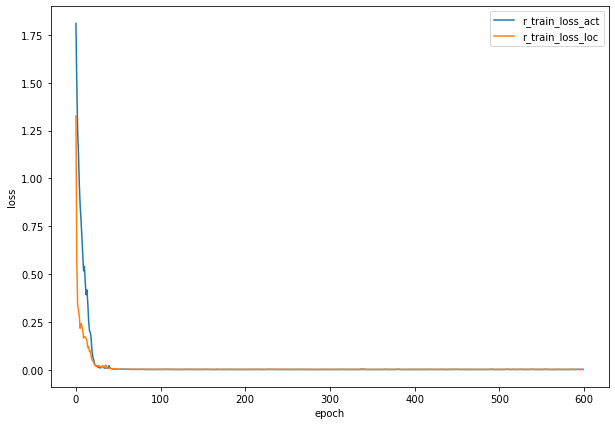

In [54]:
# train loss act vs loc
r_train_loss_act_df = pd.DataFrame(r_train_loss_act)
r_train_loss_act_df = r_train_loss_act_df.rename(columns={0:'r_train_loss_act'})
r_train_loss_loc_df = pd.DataFrame(r_train_loss_loc)
r_train_loss_loc_df = r_train_loss_loc_df.rename(columns={0:'r_train_loss_loc'})
pd.concat([r_train_loss_act_df,r_train_loss_loc_df], axis=1).plot(figsize=(10,7),xlabel='epoch',ylabel='loss')

<AxesSubplot:>

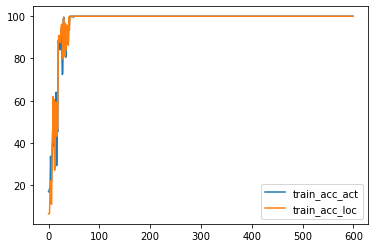

In [34]:
# # train acc act vs loc
# train_acc_act_df = pd.DataFrame(train_acc_act)
# train_acc_act_df = train_acc_act_df.rename(columns={0:'train_acc_act'})
# train_acc_loc_df = pd.DataFrame(train_acc_loc)
# train_acc_loc_df = train_acc_loc_df.rename(columns={0:'train_acc_loc'})
# pd.concat([train_acc_act_df,train_acc_loc_df], axis=1).plot()

<AxesSubplot:xlabel='epoch', ylabel='accuracy'>

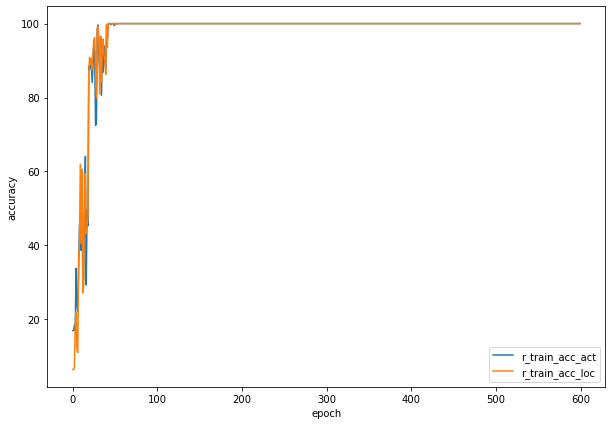

In [55]:
# train acc act vs loc
r_train_acc_act_df = pd.DataFrame(r_train_acc_act)
r_train_acc_act_df = r_train_acc_act_df.rename(columns={0:'r_train_acc_act'})
r_train_acc_loc_df = pd.DataFrame(r_train_acc_loc)
r_train_acc_loc_df = r_train_acc_loc_df.rename(columns={0:'r_train_acc_loc'})
pd.concat([r_train_acc_act_df,r_train_acc_loc_df], axis=1).plot(figsize=(10,7),xlabel='epoch',ylabel='accuracy')

,r_test_loss_act,r_test_loss_loc
0,1.884245,3.939374
1,1.901378,3.775232
2,1.953474,5.350515
3,3.004557,5.306695
4,1.666735,4.043093
...,...,...
595,0.333537,0.121349
596,0.330171,0.116197
597,0.332629,0.113535
598,0.340512,0.114525


<AxesSubplot:xlabel='epoch', ylabel='loss'>

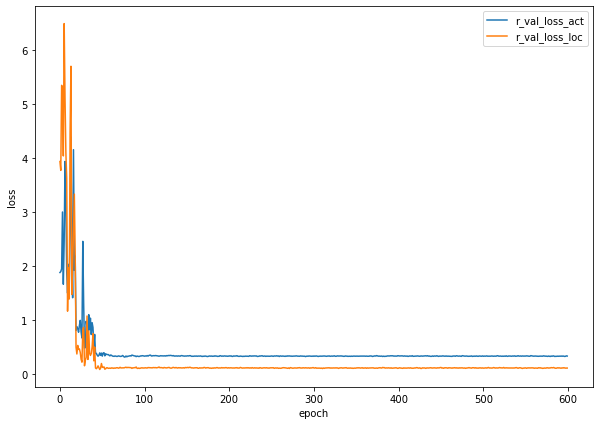

In [59]:
# test loss act vs loc
r_test_loss_act_df = pd.DataFrame(r_test_loss_act)
r_test_loss_act_df = r_test_loss_act_df.rename(columns={0:'r_val_loss_act'})
r_test_loss_loc_df = pd.DataFrame(r_test_loss_loc)
r_test_loss_loc_df = r_test_loss_loc_df.rename(columns={0:'r_val_loss_loc'})
pd.concat([r_test_loss_act_df,r_test_loss_loc_df], axis=1).plot(figsize=(10,7),xlabel='epoch',ylabel='loss')

<AxesSubplot:>

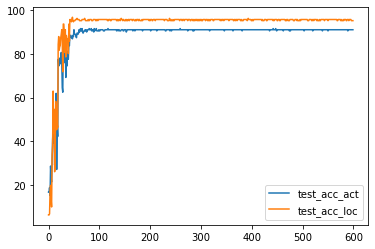

In [36]:
# test acc act vs loc
test_acc_act_df = pd.DataFrame(test_acc_act)
test_acc_act_df = test_acc_act_df.rename(columns={0:'test_acc_act'})
test_acc_loc_df = pd.DataFrame(test_acc_loc)
test_acc_loc_df = test_acc_loc_df.rename(columns={0:'test_acc_loc'})
pd.concat([test_acc_act_df,test_acc_loc_df], axis=1).plot()

<AxesSubplot:xlabel='epoch', ylabel='loss'>

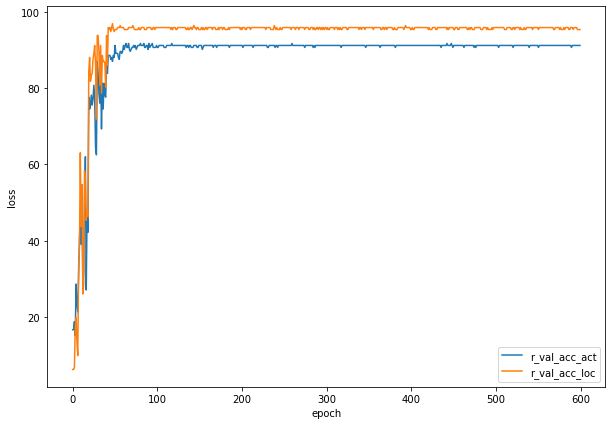

In [60]:
# test acc act vs loc
r_test_acc_act_df = pd.DataFrame(r_test_acc_act)
r_test_acc_act_df = r_test_acc_act_df.rename(columns={0:'r_val_acc_act'})
r_test_acc_loc_df = pd.DataFrame(r_test_acc_loc)
r_test_acc_loc_df = r_test_acc_loc_df.rename(columns={0:'r_val_acc_loc'})
pd.concat([r_test_acc_act_df,r_test_acc_loc_df], axis=1).plot(figsize=(10,7),xlabel='epoch',ylabel='loss')

# Komparasi

## train

In [37]:
#backup before replaced by resnet
# d_train_loss_act= train_loss_act
# d_train_loss_loc=train_loss_loc
# d_test_loss_act=test_loss_act
# d_test_loss_loc = test_loss_loc
# d_train_acc_act=train_acc_act
# d_train_acc_loc = train_acc_loc
# d_test_acc_act = test_acc_act
# d_test_acc_loc= test_acc_loc

<AxesSubplot:>

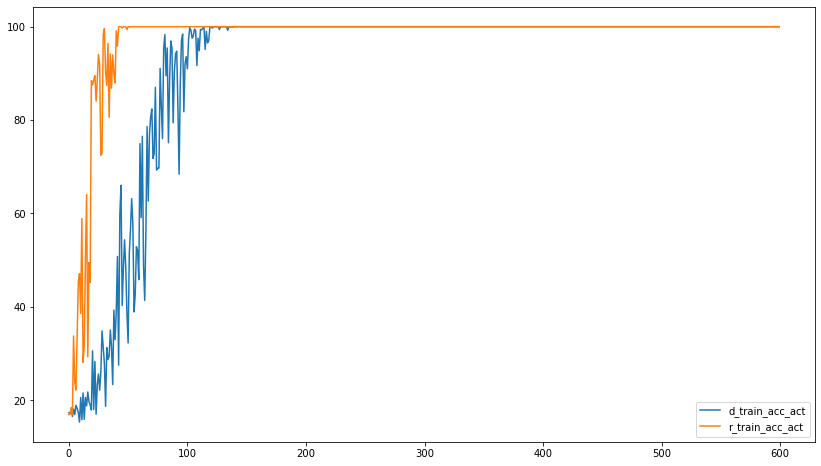

In [38]:
# train acc act
d_train_acc_act_df = pd.DataFrame(d_train_acc_act)
d_train_acc_act_df = d_train_acc_act_df.rename(columns={0:'d_train_acc_act'})
r_train_acc_act_df = pd.DataFrame(r_train_acc_act)
r_train_acc_act_df = r_train_acc_act_df.rename(columns={0:'r_train_acc_act'})
pd.concat([d_train_acc_act_df,r_train_acc_act_df], axis=1).plot(figsize=(14,8))

<AxesSubplot:>

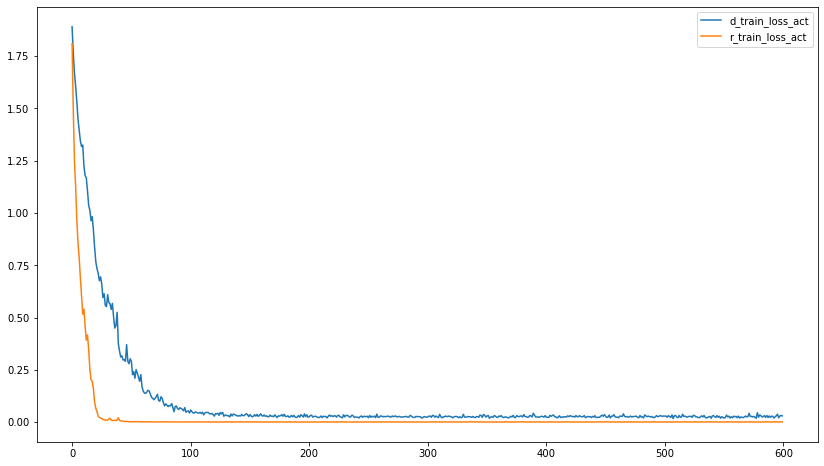

In [39]:
# train loss act
d_train_loss_act_df = pd.DataFrame(d_train_loss_act)
d_train_loss_act_df = d_train_loss_act_df.rename(columns={0:'d_train_loss_act'})
r_train_loss_act_df = pd.DataFrame(r_train_loss_act)
r_train_loss_act_df = r_train_loss_act_df.rename(columns={0:'r_train_loss_act'})
pd.concat([d_train_loss_act_df,r_train_loss_act_df], axis=1).plot(figsize=(14,8))

<AxesSubplot:>

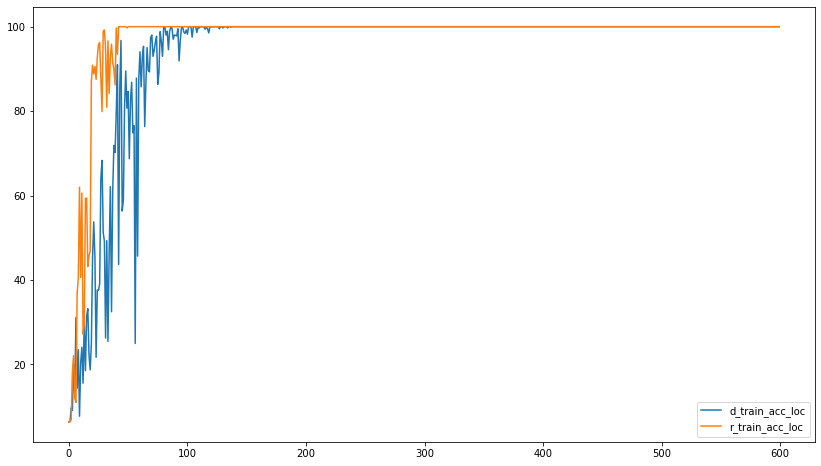

In [40]:
# train acc loc
d_train_acc_loc_df = pd.DataFrame(d_train_acc_loc)
d_train_acc_loc_df = d_train_acc_loc_df.rename(columns={0:'d_train_acc_loc'})
r_train_acc_loc_df = pd.DataFrame(r_train_acc_loc)
r_train_acc_loc_df = r_train_acc_loc_df.rename(columns={0:'r_train_acc_loc'})
pd.concat([d_train_acc_loc_df,r_train_acc_loc_df], axis=1).plot(figsize=(14,8))

<AxesSubplot:>

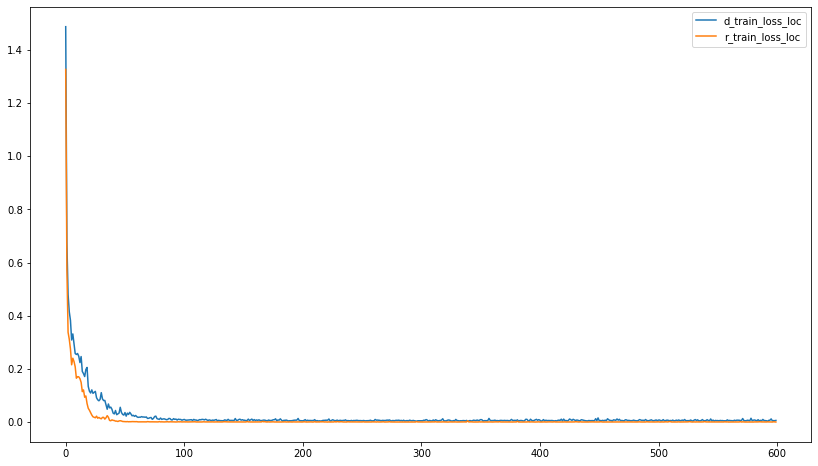

In [41]:
# train loss loc
d_train_loss_loc_df = pd.DataFrame(d_train_loss_loc)
d_train_loss_loc_df = d_train_loss_loc_df.rename(columns={0:'d_train_loss_loc'})
r_train_loss_loc_df = pd.DataFrame(r_train_loss_loc)
r_train_loss_loc_df = r_train_loss_loc_df.rename(columns={0:'r_train_loss_loc'})
pd.concat([d_train_loss_loc_df,r_train_loss_loc_df], axis=1).plot(figsize=(14,8))

## validation

<AxesSubplot:>

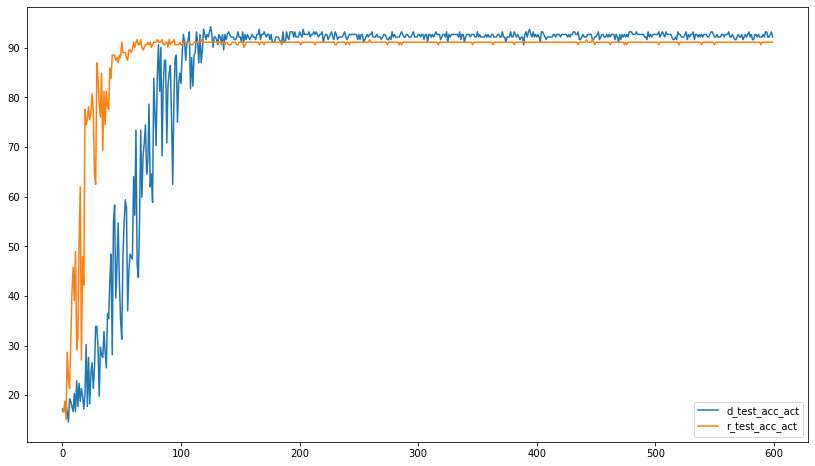

In [42]:
# val acc act
d_test_acc_act_df = pd.DataFrame(d_test_acc_act)
d_test_acc_act_df = d_test_acc_act_df.rename(columns={0:'d_test_acc_act'})
r_test_acc_act_df = pd.DataFrame(r_test_acc_act)
r_test_acc_act_df = r_test_acc_act_df.rename(columns={0:'r_test_acc_act'})
pd.concat([d_test_acc_act_df,r_test_acc_act_df], axis=1).plot(figsize=(14,8))

<AxesSubplot:>

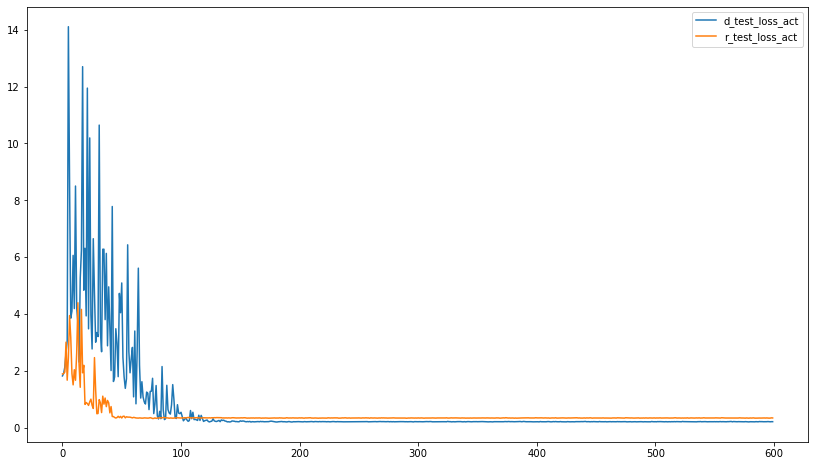

In [43]:
# val loss act
d_test_loss_act_df = pd.DataFrame(d_test_loss_act)
d_test_loss_act_df = d_test_loss_act_df.rename(columns={0:'d_test_loss_act'})
r_test_loss_act_df = pd.DataFrame(r_test_loss_act)
r_test_loss_act_df = r_test_loss_act_df.rename(columns={0:'r_test_loss_act'})
pd.concat([d_test_loss_act_df,r_test_loss_act_df], axis=1).plot(figsize=(14,8))

<AxesSubplot:>

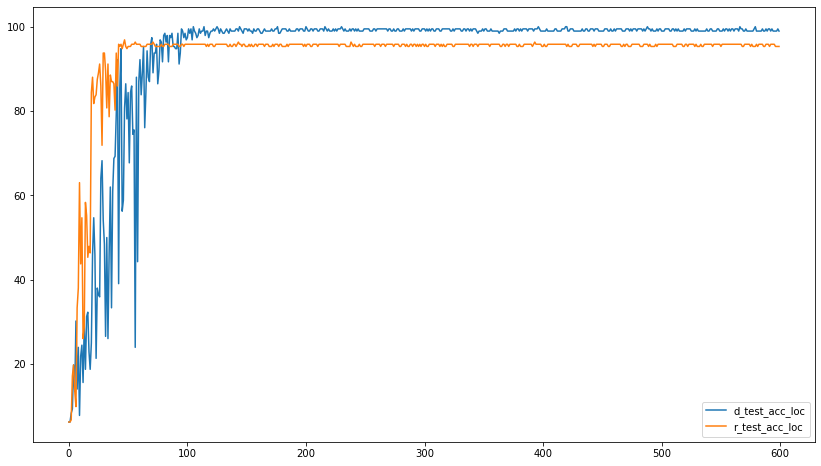

In [44]:
# val acc loc
d_test_acc_loc_df = pd.DataFrame(d_test_acc_loc)
d_test_acc_loc_df = d_test_acc_loc_df.rename(columns={0:'d_test_acc_loc'})
r_test_acc_loc_df = pd.DataFrame(r_test_acc_loc)
r_test_acc_loc_df = r_test_acc_loc_df.rename(columns={0:'r_test_acc_loc'})
pd.concat([d_test_acc_loc_df,r_test_acc_loc_df], axis=1).plot(figsize=(14,8))

<AxesSubplot:>

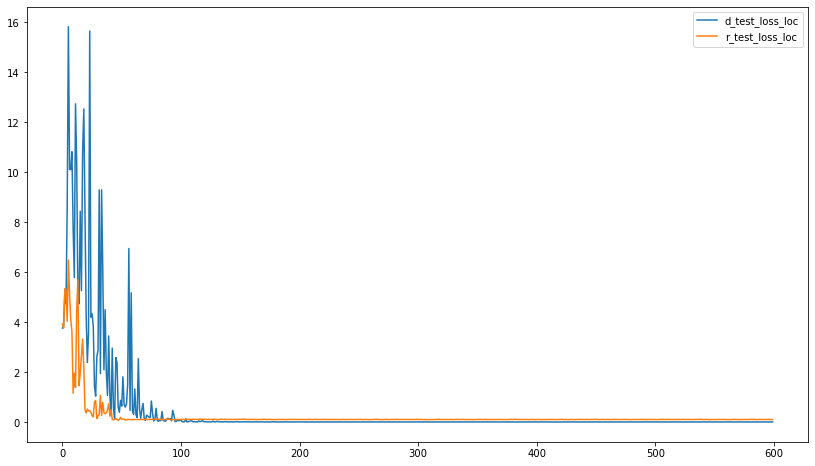

In [45]:
# val loss loc
d_test_loss_loc_df = pd.DataFrame(d_test_loss_loc)
d_test_loss_loc_df = d_test_loss_loc_df.rename(columns={0:'d_test_loss_loc'})
r_test_loss_loc_df = pd.DataFrame(r_test_loss_loc)
r_test_loss_loc_df = r_test_loss_loc_df.rename(columns={0:'r_test_loss_loc'})
pd.concat([d_test_loss_loc_df,r_test_loss_loc_df], axis=1).plot(figsize=(14,8))

# saving

In [59]:
d_train_loss_act

array([[1.91371216],
       [1.7862466 ],
       [1.71478287],
       [1.63117223],
       [1.58716407],
       [1.54674942],
       [1.54325213],
       [1.4699695 ],
       [1.43994115],
       [1.40333314],
       [1.33799284],
       [1.29472895],
       [1.29215744],
       [1.27004481],
       [1.2042615 ],
       [1.16756332],
       [1.13517506],
       [1.2107365 ],
       [1.14859273],
       [0.96251191],
       [0.94746065],
       [0.85820954],
       [0.84180736],
       [0.78166542],
       [0.72838145],
       [0.7218247 ],
       [0.70037143],
       [0.7182004 ],
       [0.69803074],
       [0.61757739],
       [0.61495702],
       [0.59550279],
       [0.6355413 ],
       [0.62303338],
       [0.58453693],
       [0.57234651],
       [0.53548608],
       [0.50771624],
       [0.49093872],
       [0.4350446 ],
       [0.33767794],
       [0.33641905],
       [0.31899661],
       [0.31389817],
       [0.29964522],
       [0.32118011],
       [0.29496073],
       [0.295

In [61]:
np.savetxt('d_train_loss_act.txt',d_train_loss_act)

In [62]:
np.savetxt('d_train_loss_act.txt',d_train_loss_act)
np.savetxt('d_train_loss_loc.txt',d_train_loss_loc)
np.savetxt('d_test_loss_act.txt',d_test_loss_act)
np.savetxt('d_test_loss_loc.txt',d_test_loss_loc)
np.savetxt('d_train_acc_act.txt',d_train_acc_act)
np.savetxt('d_train_acc_loc.txt',d_train_acc_loc)
np.savetxt('d_test_acc_act.txt',d_test_acc_act)
np.savetxt('d_test_acc_loc.txt',d_test_acc_loc)

In [25]:
np.savetxt('r_train_loss_act.txt',r_train_loss_act)
np.savetxt('r_train_loss_loc.txt',r_train_loss_loc)
np.savetxt('r_test_loss_act.txt',r_test_loss_act)
np.savetxt('r_test_loss_loc.txt',r_test_loss_loc)
np.savetxt('r_train_acc_act.txt',r_train_acc_act)
np.savetxt('r_train_acc_loc.txt',r_train_acc_loc)
np.savetxt('r_test_acc_act.txt',r_test_acc_act)
np.savetxt('r_test_acc_loc.txt',r_test_acc_loc)

NameError: name 'r_train_loss_act' is not defined

# Load and Test Model

In [15]:
test_batch_size = 512

In [16]:
val_data

array([[[0.01007835, 0.01003989, 0.00999634, ..., 0.0076563 ,
         0.0076629 , 0.00766586],
        [0.01206193, 0.01193771, 0.01182128, ..., 0.00896196,
         0.00903121, 0.00911697],
        [0.01217726, 0.01210672, 0.0120426 , ..., 0.00895617,
         0.009005  , 0.00906339],
        ...,
        [0.01642183, 0.01626645, 0.01612968, ..., 0.01553739,
         0.01557563, 0.01561358],
        [0.01400108, 0.01393724, 0.0138688 , ..., 0.01317175,
         0.01321508, 0.01326514],
        [0.01158579, 0.01151638, 0.01145598, ..., 0.01104089,
         0.01106455, 0.01109186]],

       [[0.00605743, 0.00614525, 0.00623307, ..., 0.00804261,
         0.00802002, 0.00799742],
        [0.00749327, 0.00757444, 0.00765561, ..., 0.00948172,
         0.00944667, 0.00941162],
        [0.00738511, 0.00741483, 0.00744455, ..., 0.00951279,
         0.00949478, 0.00947678],
        ...,
        [0.0155361 , 0.01561121, 0.01568632, ..., 0.01851535,
         0.01859536, 0.01867538],
        [0.0

In [17]:
val_label

array([[ 4,  9],
       [ 4,  9],
       [ 4, 10],
       [ 4, 10],
       [ 4, 11],
       [ 4, 11],
       [ 4, 12],
       [ 4, 12],
       [ 4, 13],
       [ 4, 13],
       [ 4, 14],
       [ 4, 14],
       [ 4, 15],
       [ 4, 15],
       [ 4,  0],
       [ 4,  0],
       [ 4,  1],
       [ 4,  1],
       [ 4,  2],
       [ 4,  2],
       [ 4,  3],
       [ 4,  3],
       [ 4,  4],
       [ 4,  4],
       [ 4,  5],
       [ 4,  5],
       [ 4,  6],
       [ 4,  6],
       [ 4,  7],
       [ 4,  7],
       [ 4,  8],
       [ 4,  8],
       [ 5,  9],
       [ 5,  9],
       [ 5, 10],
       [ 5, 10],
       [ 5, 11],
       [ 5, 11],
       [ 5, 12],
       [ 5, 12],
       [ 5, 13],
       [ 5, 13],
       [ 5, 14],
       [ 5, 14],
       [ 5, 15],
       [ 5, 15],
       [ 5,  0],
       [ 5,  0],
       [ 5,  1],
       [ 5,  1],
       [ 5,  2],
       [ 5,  2],
       [ 5,  3],
       [ 5,  3],
       [ 5,  4],
       [ 5,  4],
       [ 5,  5],
       [ 5,  5],
       [ 5,  6

In [18]:
num_val_instances = len(val_data)
num_val_instances

192

In [19]:
val_data = torch.from_numpy(val_data).type(torch.FloatTensor)
val_label = torch.from_numpy(val_label).type(torch.LongTensor)

In [20]:
val_dataset = TensorDataset(val_data, val_label)
val_data_loader = DataLoader(dataset=val_dataset, batch_size=test_batch_size, shuffle=False)

# DenseNet

In [228]:
aplnet = torch.load('weights_densenet/net1111epoch115Train100.0Test96.354Train99.702Test98.958.pkl')
aplnet = aplnet.cuda().eval()

In [231]:
sum(p.numel() for p in aplnet.parameters() if p.requires_grad)

7057430

In [121]:
correct_val_loc = 0
correct_val_act = 0

In [122]:
# for i, (samples,labels) in enumerate(val_data_loader):
#     print(len(labels))

In [123]:
for i, (samples, labels) in enumerate(val_data_loader):
    with torch.no_grad():
        samplesV = Variable(samples.cuda())
        labels_act = labels[:, 0].squeeze()
        labels_loc = labels[:, 1].squeeze()
        labelsV_act = Variable(labels_act.cuda())
        labelsV_loc = Variable(labels_loc.cuda())

        predict_label_act, predict_label_loc,_,_,_,_,_,_ = aplnet(samplesV)

        # for tsne visualization
        # act1, loc1, x, c1, c2, c3, c4, act, loc = aplnet(samplesV)
        # sio.savemat('vis/fig_tsne/out_act_conf.mat', {'out_max': act1.view(act1.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_loc_conf.mat', {'out_max': loc1.view(loc1.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_maxpool.mat', {'out_max': x.view(x.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_c1.mat', {'out_max': c1.view(c1.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_c2.mat', {'out_max': c2.view(c2.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_c3.mat', {'out_max': c3.view(c3.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_c4.mat', {'out_max': c4.view(c4.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_fc_act.mat', {'out_max': act.view(act.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_fc_loc.mat', {'out_max': loc.view(loc.shape[0], -1).cpu().numpy()})

        prediction = predict_label_act.data.max(1)[1]
        sio.savemat('vis_densenet/actResult.mat',{'act_prediction':prediction.cpu().numpy()})
        correct_val_act += prediction.eq(labelsV_act.data.long()).sum()
        print("correct_val_act")
        print(correct_val_act.cpu().numpy()/num_val_instances)

        prediction = predict_label_loc.data.max(1)[1]
        sio.savemat('vis_densenet/locResult.mat', {'loc_prediction': prediction.cpu().numpy()})
        correct_val_loc += prediction.eq(labelsV_loc.data.long()).sum()
        print("correct_val_loc")
        print(correct_val_loc.cpu().numpy() / num_val_instances)



correct_val_act
0.953125
correct_val_loc
0.9947916666666666


In [138]:
predict_label_act.data.max(1)[1].cpu().numpy()

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 3, 3, 3, 3,
       3, 3, 5, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0])

In [134]:

val_label.numpy()

array([[ 4,  9],
       [ 4,  9],
       [ 4, 10],
       [ 4, 10],
       [ 4, 11],
       [ 4, 11],
       [ 4, 12],
       [ 4, 12],
       [ 4, 13],
       [ 4, 13],
       [ 4, 14],
       [ 4, 14],
       [ 4, 15],
       [ 4, 15],
       [ 4,  0],
       [ 4,  0],
       [ 4,  1],
       [ 4,  1],
       [ 4,  2],
       [ 4,  2],
       [ 4,  3],
       [ 4,  3],
       [ 4,  4],
       [ 4,  4],
       [ 4,  5],
       [ 4,  5],
       [ 4,  6],
       [ 4,  6],
       [ 4,  7],
       [ 4,  7],
       [ 4,  8],
       [ 4,  8],
       [ 5,  9],
       [ 5,  9],
       [ 5, 10],
       [ 5, 10],
       [ 5, 11],
       [ 5, 11],
       [ 5, 12],
       [ 5, 12],
       [ 5, 13],
       [ 5, 13],
       [ 5, 14],
       [ 5, 14],
       [ 5, 15],
       [ 5, 15],
       [ 5,  0],
       [ 5,  0],
       [ 5,  1],
       [ 5,  1],
       [ 5,  2],
       [ 5,  2],
       [ 5,  3],
       [ 5,  3],
       [ 5,  4],
       [ 5,  4],
       [ 5,  5],
       [ 5,  5],
       [ 5,  6

[0.96875    0.98461538 0.92063492 0.95081967 0.95238095 0.94117647]
[0.96875    0.96969697 0.93548387 1.         0.96774194 0.88888889]
[0.96875 1.      0.90625 0.90625 0.9375  1.     ]
Normalized confusion matrix


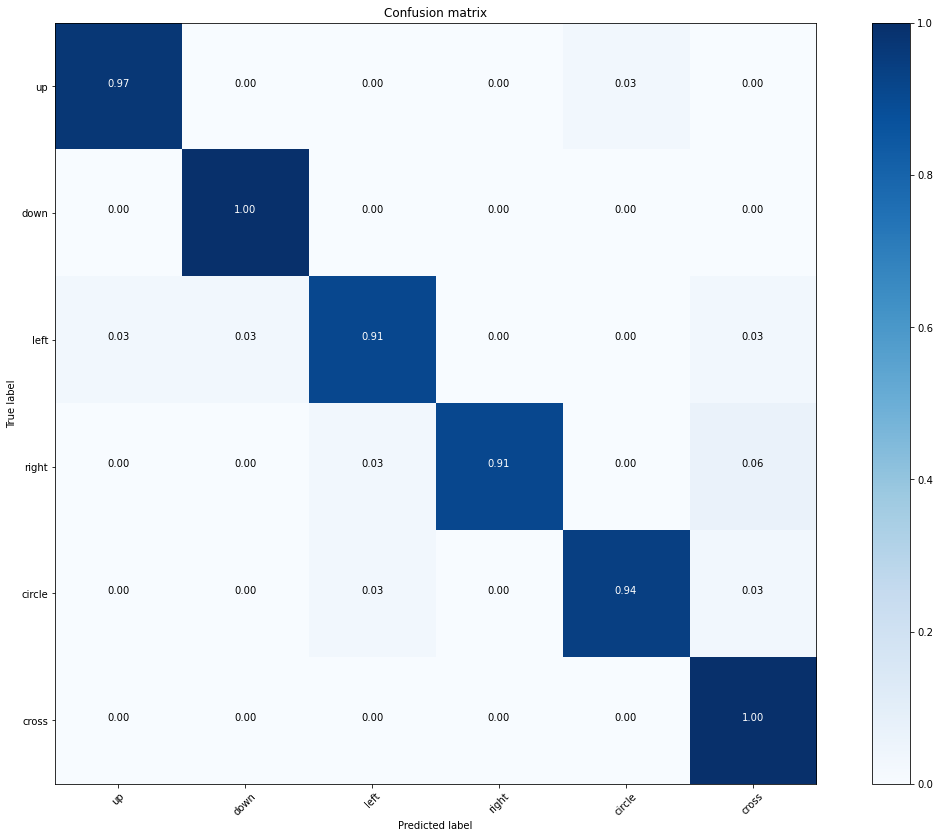

In [218]:
label_df = pd.DataFrame(val_label.numpy()).rename(columns={0:'label_act',1:'label_loc'})
label_df['predicted_act'] = predict_label_act.data.max(1)[1].cpu().numpy()
label_df['predicted_loc'] = predict_label_loc.data.max(1)[1].cpu().numpy()

y_true = label_df['label_act']
y_pred = label_df['predicted_act']
classes=["up","down", "left","right","circle","cross"]
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2,3,4,5])
print(f1_score(y_true, y_pred, average=None))
print(precision_score(y_true, y_pred, average=None))
print(recall_score(y_true, y_pred, average=None))
plot_confusion_matrix(cm,classes)

[1.         1.         1.         1.         0.96       1.
 1.         1.         0.95652174 1.         1.         1.
 1.         1.         1.         1.        ]
[1.         1.         1.         1.         0.92307692 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
[1.         1.         1.         1.         1.         1.
 1.         1.         0.91666667 1.         1.         1.
 1.         1.         1.         1.        ]
Normalized confusion matrix


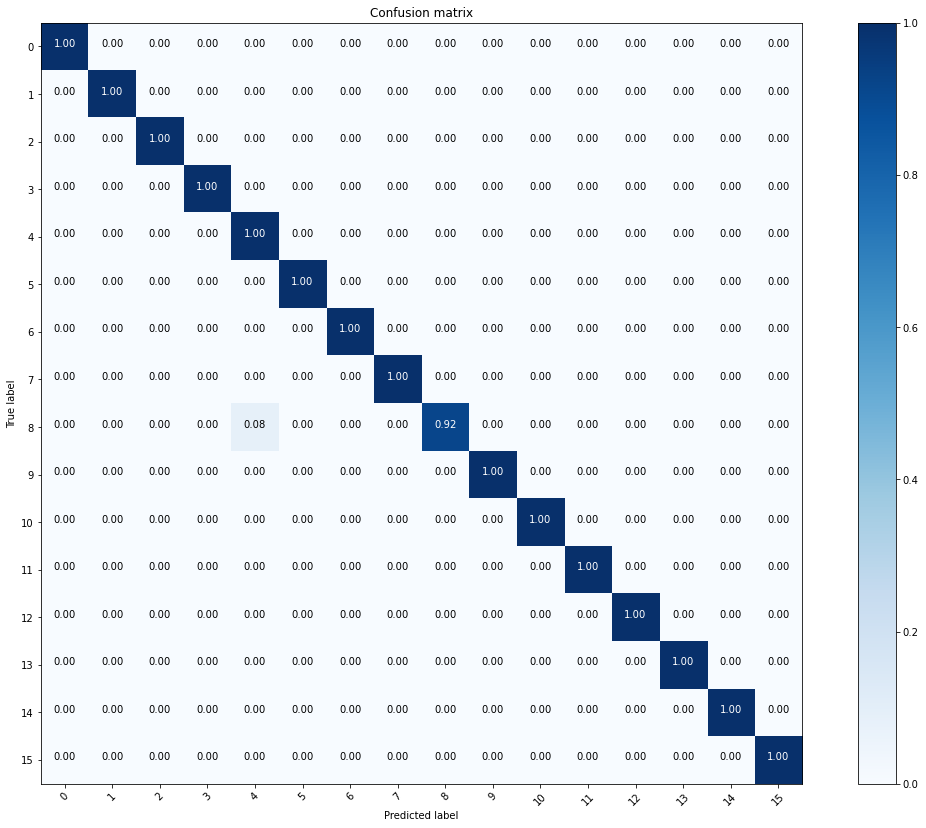

In [219]:
y_true = label_df['label_loc']
y_pred = label_df['predicted_loc']
classes=[i for i in range(16)]
cm = confusion_matrix(y_true, y_pred, labels=classes)
print(f1_score(y_true, y_pred, average=None))
print(precision_score(y_true, y_pred, average=None))
print(recall_score(y_true, y_pred, average=None))
plot_confusion_matrix(cm,classes)

In [139]:
label_df = pd.DataFrame(val_label.numpy()).rename(columns={0:'label_act',1:'label_loc'})

In [140]:
label_df['predicted_act'] = predict_label_act.data.max(1)[1].cpu().numpy()

In [142]:
label_df['predicted_loc'] = predict_label_loc.data.max(1)[1].cpu().numpy()

In [143]:
label_df

,label_act,label_loc,predicted_act,predicted_loc
0,4,9,4,9
1,4,9,4,9
2,4,10,4,10
3,4,10,4,10
4,4,11,4,11
...,...,...,...,...
187,0,6,0,6
188,0,7,0,7
189,0,7,4,7
190,0,8,0,4


In [65]:
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=80)

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

In [66]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap,)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.rcParams["figure.figsize"] = (10,10)
#     plt.tight_layout()
    

In [55]:
from sklearn.metrics import confusion_matrix

y_true = label_df['label_act']
y_pred = label_df['predicted_act']

classes=["up","down", "left","right","circle","cross"]

cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2,3,4,5])

In [213]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(f1_score(y_true, y_pred, average=None))
print(precision_score(y_true, y_pred, average=None))
print(recall_score(y_true, y_pred, average=None))

[1.         1.         1.         1.         0.96       1.
 1.         1.         0.95652174 1.         1.         1.
 1.         1.         1.         1.        ]
[1.         1.         1.         1.         0.92307692 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
[1.         1.         1.         1.         1.         1.
 1.         1.         0.91666667 1.         1.         1.
 1.         1.         1.         1.        ]


Normalized confusion matrix


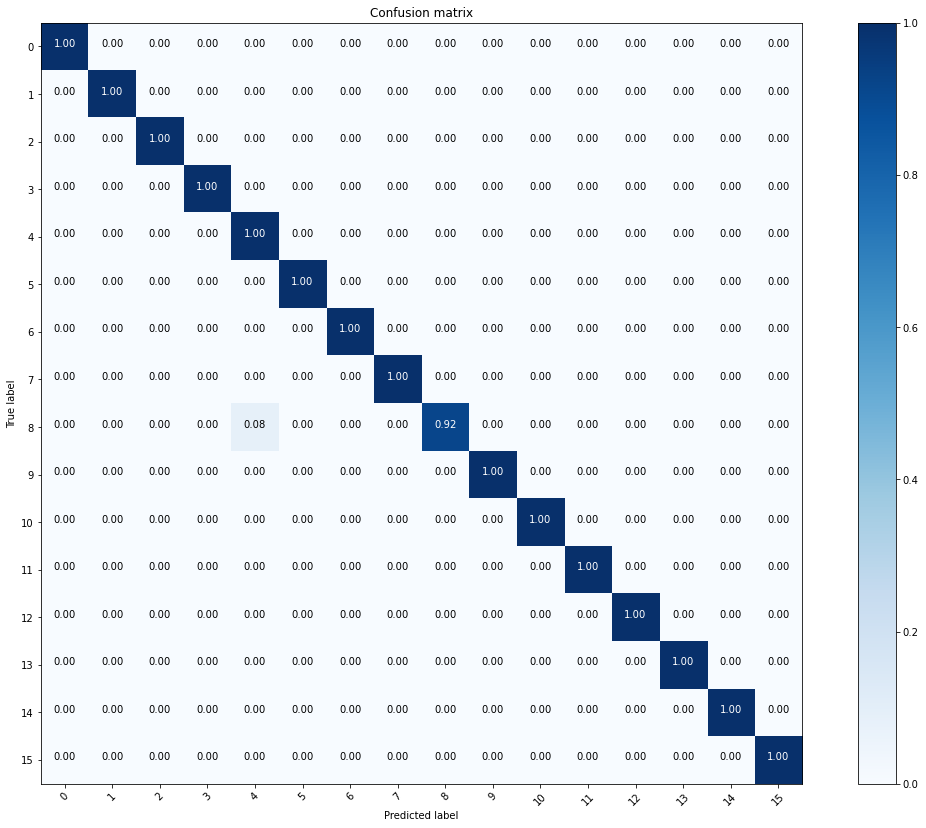

In [214]:
plot_confusion_matrix(cm,classes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Normalized confusion matrix


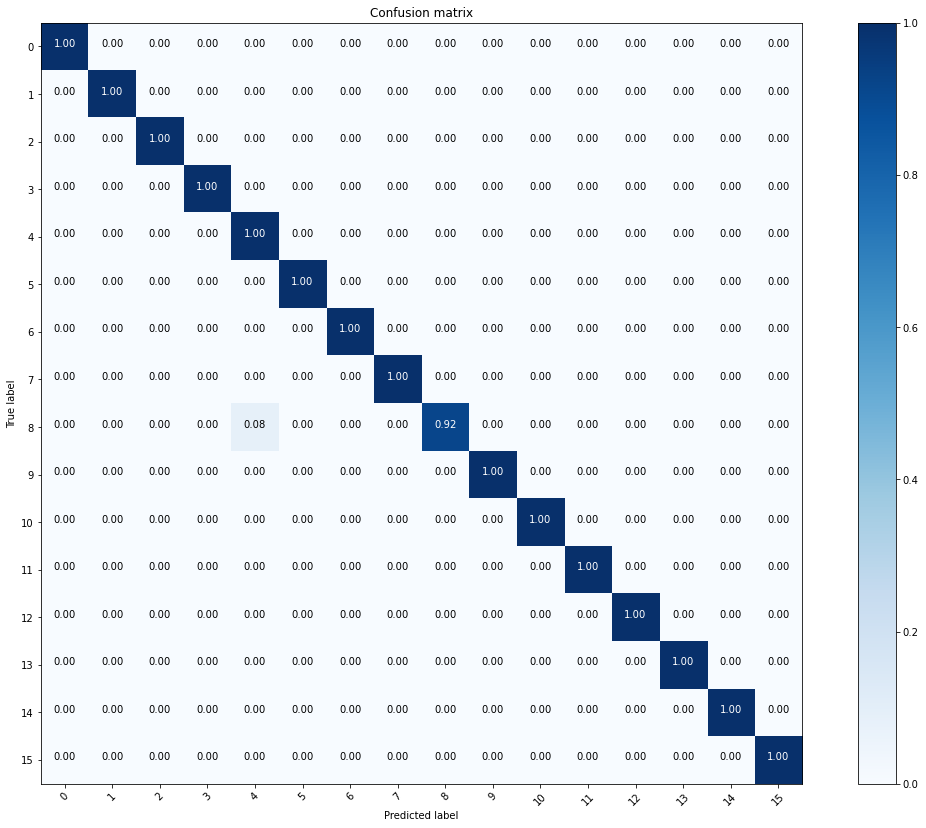

In [205]:
y_true = label_df['label_loc']
y_pred = label_df['predicted_loc']

classes=[i for i in range(16)]
print(classes)

cm = confusion_matrix(y_true, y_pred, labels=classes)

In [206]:
print(f1_score(y_true, y_pred, average=None))
print(precision_score(y_true, y_pred, average=None))
print(recall_score(y_true, y_pred, average=None))

[1.         1.         1.         1.         0.96       1.
 1.         1.         0.95652174 1.         1.         1.
 1.         1.         1.         1.        ]
[1.         1.         1.         1.         0.92307692 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
[1.         1.         1.         1.         1.         1.
 1.         1.         0.91666667 1.         1.         1.
 1.         1.         1.         1.        ]


Normalized confusion matrix


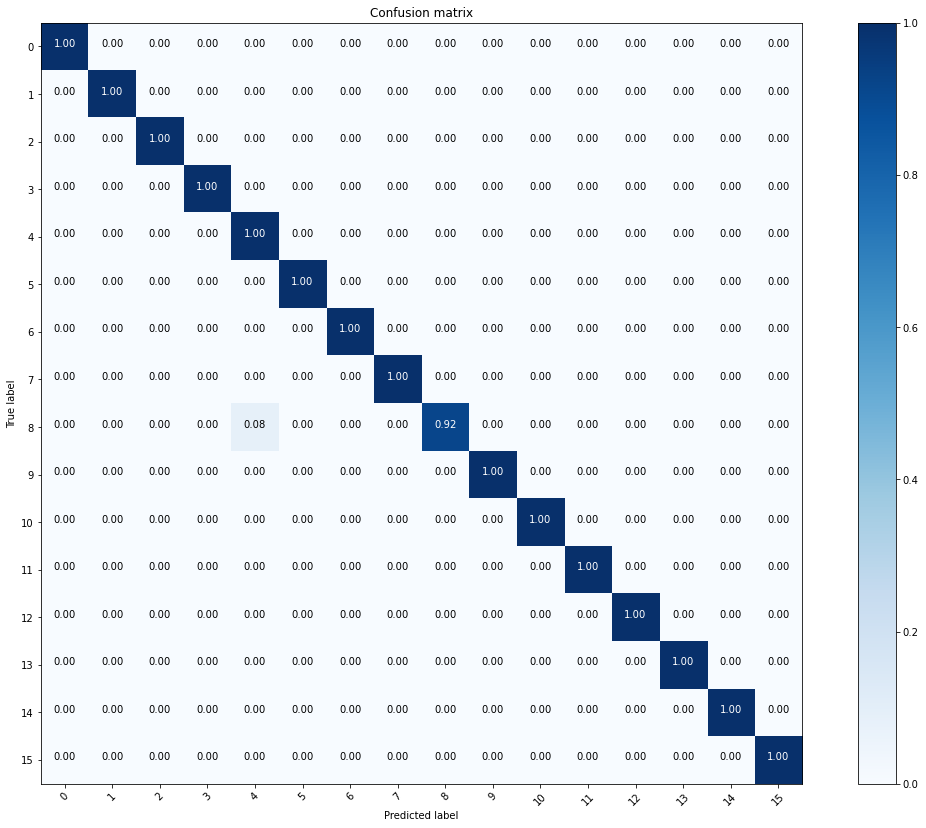

In [215]:
plot_confusion_matrix(cm,classes)

# Resnet

In [67]:
aplnet = torch.load('weights/net1111epoch63Train100.0Test91.666Train100.0Test95.312.pkl')
aplnet = aplnet.cuda().eval()

In [68]:
sum(p.numel() for p in aplnet.parameters() if p.requires_grad)

3494438

In [69]:
correct_val_loc = 0
correct_val_act = 0

In [70]:
for i, (samples, labels) in enumerate(val_data_loader):
    with torch.no_grad():
        samplesV = Variable(samples.cuda())
        labels_act = labels[:, 0].squeeze()
        labels_loc = labels[:, 1].squeeze()
        labelsV_act = Variable(labels_act.cuda())
        labelsV_loc = Variable(labels_loc.cuda())

        predict_label_act, predict_label_loc,_,_,_,_,_,_,_ = aplnet(samplesV)

        # for tsne visualization
        # act1, loc1, x, c1, c2, c3, c4, act, loc = aplnet(samplesV)
        # sio.savemat('vis/fig_tsne/out_act_conf.mat', {'out_max': act1.view(act1.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_loc_conf.mat', {'out_max': loc1.view(loc1.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_maxpool.mat', {'out_max': x.view(x.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_c1.mat', {'out_max': c1.view(c1.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_c2.mat', {'out_max': c2.view(c2.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_c3.mat', {'out_max': c3.view(c3.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_c4.mat', {'out_max': c4.view(c4.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_fc_act.mat', {'out_max': act.view(act.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_fc_loc.mat', {'out_max': loc.view(loc.shape[0], -1).cpu().numpy()})

        prediction = predict_label_act.data.max(1)[1]
        sio.savemat('vis/actResult.mat',{'act_prediction':prediction.cpu().numpy()})
        correct_val_act += prediction.eq(labelsV_act.data.long()).sum()
        print("correct_val_act")
        print(correct_val_act.cpu().numpy()/num_val_instances)

        prediction = predict_label_loc.data.max(1)[1]
        sio.savemat('vis/locResult.mat', {'loc_prediction': prediction.cpu().numpy()})
        correct_val_loc += prediction.eq(labelsV_loc.data.long()).sum()
        print("correct_val_loc")
        print(correct_val_loc.cpu().numpy() / num_val_instances)



correct_val_act
0.9114583333333334
correct_val_loc
0.984375


[0.90625    0.92307692 0.87878788 0.875      0.96969697 0.91525424]
0.9140764260249554
0.9114583333333334
Normalized confusion matrix


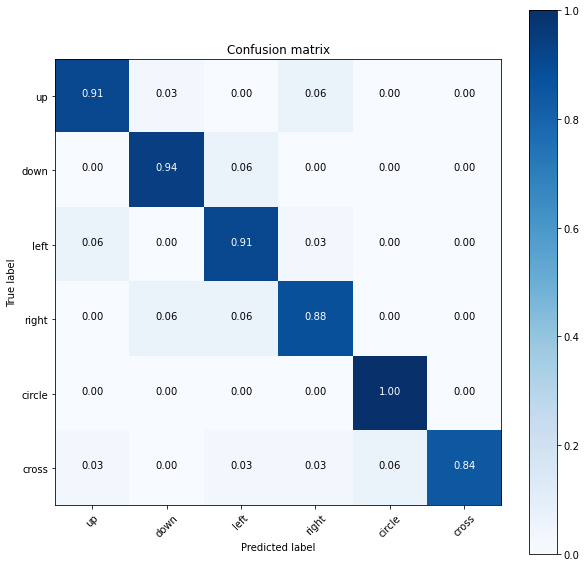

In [74]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

label_df = pd.DataFrame(val_label.numpy()).rename(columns={0:'label_act',1:'label_loc'})
label_df['predicted_act'] = predict_label_act.data.max(1)[1].cpu().numpy()
label_df['predicted_loc'] = predict_label_loc.data.max(1)[1].cpu().numpy()

y_true = label_df['label_act']
y_pred = label_df['predicted_act']
classes=["up","down", "left","right","circle","cross"]
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2,3,4,5])
print(f1_score(y_true, y_pred, average=None))
print(precision_score(y_true, y_pred, average='macro'))
print(recall_score(y_true, y_pred, average='macro'))
plot_confusion_matrix(cm,classes)

[1.         1.         1.         0.91666667 1.         1.
 1.         0.95652174 1.         0.96       1.         0.96
 1.         0.95652174 1.         1.        ]
0.985176282051282
0.984375
Normalized confusion matrix


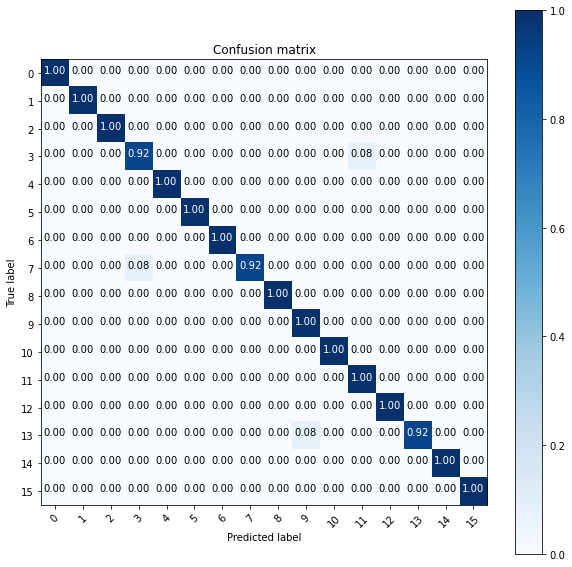

In [75]:
y_true = label_df['label_loc']
y_pred = label_df['predicted_loc']
classes=[i for i in range(16)]
cm = confusion_matrix(y_true, y_pred, labels=classes)
print(f1_score(y_true, y_pred, average=None))
print(precision_score(y_true, y_pred, average="macro"))
print(recall_score(y_true, y_pred, average="macro"))
plot_confusion_matrix(cm,classes)

# extend test dataset to whole dataset

In [104]:
test_batch_size = 1600

In [105]:
val_data_2 = data

In [106]:
val_label_2 = label

In [107]:
print(len(val_data_2))
print(len(val_label_2))

1394
1394


In [118]:
val_data_2 = torch.from_numpy(val_data_2).type(torch.FloatTensor)
val_label_2 = torch.from_numpy(val_label_2).type(torch.LongTensor)

NameError: name 'val_data_2' is not defined

In [117]:
val_dataset_2 = TensorDataset(val_data_2, val_label_2)
val_data_loader_2 = DataLoader(dataset=val_dataset_2, batch_size=test_batch_size, shuffle=False)

NameError: name 'val_data_2' is not defined

In [112]:
num_val_instances_2 = len(val_data_2)
num_val_instances_2

1394

## DenseNet

In [110]:
aplnet = torch.load('weights_densenet/net1111epoch115Train100.0Test96.354Train99.702Test98.958.pkl')
aplnet = aplnet.cuda().eval()

In [111]:
correct_val_loc = 0
correct_val_act = 0

In [113]:
for i, (samples, labels) in enumerate(val_data_loader_2):
    with torch.no_grad():
        samplesV = Variable(samples.cuda())
        labels_act = labels[:, 0].squeeze()
        labels_loc = labels[:, 1].squeeze()
        labelsV_act = Variable(labels_act.cuda())
        labelsV_loc = Variable(labels_loc.cuda())

        predict_label_act, predict_label_loc,_,_,_,_,_,_ = aplnet(samplesV)

        # for tsne visualization
        # act1, loc1, x, c1, c2, c3, c4, act, loc = aplnet(samplesV)
        # sio.savemat('vis/fig_tsne/out_act_conf.mat', {'out_max': act1.view(act1.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_loc_conf.mat', {'out_max': loc1.view(loc1.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_maxpool.mat', {'out_max': x.view(x.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_c1.mat', {'out_max': c1.view(c1.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_c2.mat', {'out_max': c2.view(c2.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_c3.mat', {'out_max': c3.view(c3.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_c4.mat', {'out_max': c4.view(c4.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_fc_act.mat', {'out_max': act.view(act.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_fc_loc.mat', {'out_max': loc.view(loc.shape[0], -1).cpu().numpy()})

        prediction = predict_label_act.data.max(1)[1]
        sio.savemat('vis_densenet/actResult.mat',{'act_prediction':prediction.cpu().numpy()})
        correct_val_act += prediction.eq(labelsV_act.data.long()).sum()
        print("correct_val_act")
        print(correct_val_act.cpu().numpy()/num_val_instances_2)

        prediction = predict_label_loc.data.max(1)[1]
        sio.savemat('vis_densenet/locResult.mat', {'loc_prediction': prediction.cpu().numpy()})
        correct_val_loc += prediction.eq(labelsV_loc.data.long()).sum()
        print("correct_val_loc")
        print(correct_val_loc.cpu().numpy() / num_val_instances_2)



correct_val_act
0.9885222381635581
correct_val_loc
0.9956958393113343


## Resnet

In [114]:
aplnet = torch.load('weights/net1111epoch363Train100.0Test91.145Train100.0Test96.354.pkl')
aplnet = aplnet.cuda().eval()

In [147]:
correct_val_loc = 0
correct_val_act = 0
start = time.time()
for i, (samples, labels) in enumerate(val_data_loader):
    with torch.no_grad():
        samplesV = Variable(samples.cuda())
        labels_act = labels[:, 0].squeeze()
        labels_loc = labels[:, 1].squeeze()
        labelsV_act = Variable(labels_act.cuda())
        labelsV_loc = Variable(labels_loc.cuda())

        predict_label_act, predict_label_loc,_,_,_,_,_,_,_ = aplnet(samplesV)

        # for tsne visualization
        # act1, loc1, x, c1, c2, c3, c4, act, loc = aplnet(samplesV)
        # sio.savemat('vis/fig_tsne/out_act_conf.mat', {'out_max': act1.view(act1.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_loc_conf.mat', {'out_max': loc1.view(loc1.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_maxpool.mat', {'out_max': x.view(x.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_c1.mat', {'out_max': c1.view(c1.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_c2.mat', {'out_max': c2.view(c2.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_c3.mat', {'out_max': c3.view(c3.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_c4.mat', {'out_max': c4.view(c4.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_fc_act.mat', {'out_max': act.view(act.shape[0], -1).cpu().numpy()})
        # sio.savemat('vis/fig_tsne/out_fc_loc.mat', {'out_max': loc.view(loc.shape[0], -1).cpu().numpy()})

        prediction = predict_label_act.data.max(1)[1]
        sio.savemat('vis_densenet/actResult.mat',{'act_prediction':prediction.cpu().numpy()})
        correct_val_act += prediction.eq(labelsV_act.data.long()).sum()
        print("correct_val_act")
        print(correct_val_act.cpu().numpy()/num_val_instances)

        prediction = predict_label_loc.data.max(1)[1]
        sio.savemat('vis_densenet/locResult.mat', {'loc_prediction': prediction.cpu().numpy()})
        correct_val_loc += prediction.eq(labelsV_loc.data.long()).sum()
        print("correct_val_loc")
        print(correct_val_loc.cpu().numpy() / num_val_instances)
endl = time.time()
print("duration",endl-start)

correct_val_act
0.9114583333333334
correct_val_loc
0.984375
duration 0.010705709457397461


# Saving ResNet

In [26]:
with open('resnet.txt') as f:
    lines = f.readlines()

In [33]:
len(lines)

6000

In [44]:
resnet_list = []
for i in range(600):
    row = {}
    row['epoch'] = lines[i*10].strip().split(" ")[-1]
    row['Activity Training accuracy'] = lines[i*10+2].strip().split(" ")[-1]
    row['Location Training accuracy'] = lines[i*10+3].strip().split(" ")[-1]
    row['Activity Training loss'] = lines[i*10+4].strip().split(" ")[-1]
    row['Location Training loss'] = lines[i*10+5].strip().split(" ")[-1]
    row['Activity Test accuracy'] = lines[i*10+6].strip().split(" ")[-1]
    row['Location Test accuracy'] = lines[i*10+7].strip().split(" ")[-1]
    row['Activity Test loss'] = lines[i*10+8].strip().split(" ")[-1]
    row['Location Test loss'] = lines[i*10+9].strip().split(" ")[-1]
    resnet_list.append(row)

In [45]:
import pandas as pd
pd.DataFrame(resnet_list)

,epoch,Activity Training accuracy,Location Training accuracy,Activity Training loss,Location Training loss,Activity Test accuracy,Location Test accuracy,Activity Test loss,Location Test loss
0,0,16.93069306930693,6.435643564356436,1.8089651202211285,1.3256322105332177,16.666666666666668,6.25,1.88424547513326,3.9393741289774575
1,1,17.02970297029703,6.435643564356436,1.4953680586106706,0.574930716033029,16.666666666666668,6.25,1.9013775984446208,3.7752315998077393
2,2,18.415841584158414,6.930693069306931,1.2477853605062654,0.3378366215394275,18.75,6.770833333333333,1.9534743229548137,5.350514729817708
3,3,16.93069306930693,18.415841584158414,1.1264048963490099,0.3119001775684923,15.104166666666666,17.1875,3.004556655883789,5.306694984436035
4,4,33.76237623762376,22.07920792079208,0.9641231083633877,0.2753172005757247,28.645833333333332,19.791666666666668,1.6667346954345703,4.043092966079712
...,...,...,...,...,...,...,...,...,...
595,595,100.0,100.0,0.0008706950020081927,0.0009034693241119385,91.14583333333333,95.83333333333333,0.3335365653038025,0.12134851018587749
596,596,100.0,100.0,0.0006211948018557955,0.0005882466433219391,91.14583333333333,95.3125,0.3301708400249481,0.116197369992733
597,597,100.0,100.0,0.0008669471294425502,0.0015496312705154465,91.14583333333333,95.3125,0.3326288362344106,0.11353479884564877
598,598,100.0,100.0,0.001397675489730174,0.0010308953961080845,91.14583333333333,95.3125,0.34051161011060077,0.11452526102463405


In [82]:
resnet_df = pd.DataFrame(resnet_list)
for i in resnet_df:
    resnet_df[i] = pd.to_numeric(resnet_df[i])

In [83]:
resnet_df

,epoch,Activity Training accuracy,Location Training accuracy,Activity Training loss,Location Training loss,Activity Test accuracy,Location Test accuracy,Activity Test loss,Location Test loss
0,0,16.930693,6.435644,1.808965,1.325632,16.666667,6.250000,1.884245,3.939374
1,1,17.029703,6.435644,1.495368,0.574931,16.666667,6.250000,1.901378,3.775232
2,2,18.415842,6.930693,1.247785,0.337837,18.750000,6.770833,1.953474,5.350515
3,3,16.930693,18.415842,1.126405,0.311900,15.104167,17.187500,3.004557,5.306695
4,4,33.762376,22.079208,0.964123,0.275317,28.645833,19.791667,1.666735,4.043093
...,...,...,...,...,...,...,...,...,...
595,595,100.000000,100.000000,0.000871,0.000903,91.145833,95.833333,0.333537,0.121349
596,596,100.000000,100.000000,0.000621,0.000588,91.145833,95.312500,0.330171,0.116197
597,597,100.000000,100.000000,0.000867,0.001550,91.145833,95.312500,0.332629,0.113535
598,598,100.000000,100.000000,0.001398,0.001031,91.145833,95.312500,0.340512,0.114525


In [84]:
resnet_df['train_loss'] = resnet_df['Activity Training loss'] + resnet_df['Location Training loss']

In [85]:
resnet_df['val_loss'] = resnet_df['Activity Test loss'] + resnet_df['Location Test loss']

In [98]:
resnet_df[['train_loss','val_loss']]

,train_loss,val_loss
0,3.134597,5.823620
1,2.070299,5.676609
2,1.585622,7.303989
3,1.438305,8.311252
4,1.239440,5.709828
...,...,...
595,0.001774,0.454885
596,0.001209,0.446368
597,0.002417,0.446164
598,0.002429,0.455037


<AxesSubplot:title={'center':'resnet'}>

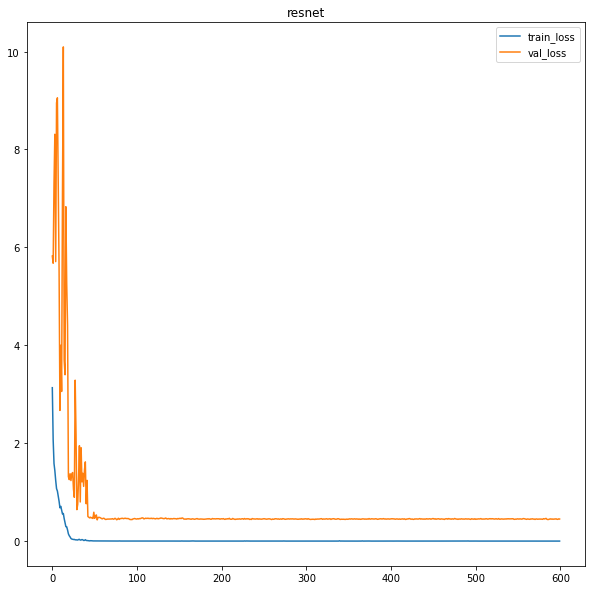

In [95]:
resnet_df[['train_loss','val_loss']].plot(title="resnet")

In [87]:
with open('densenet.txt') as f:
    lines = f.readlines()

In [88]:
densenet_list = []
for i in range(600):
    row = {}
    row['epoch'] = lines[i*10].strip().split(" ")[-1]
    row['Activity Training accuracy'] = lines[i*10+2].strip().split(" ")[-1]
    row['Location Training accuracy'] = lines[i*10+3].strip().split(" ")[-1]
    row['Activity Training loss'] = lines[i*10+4].strip().split(" ")[-1]
    row['Location Training loss'] = lines[i*10+5].strip().split(" ")[-1]
    row['Activity Test accuracy'] = lines[i*10+6].strip().split(" ")[-1]
    row['Location Test accuracy'] = lines[i*10+7].strip().split(" ")[-1]
    row['Activity Test loss'] = lines[i*10+8].strip().split(" ")[-1]
    row['Location Test loss'] = lines[i*10+9].strip().split(" ")[-1]
    densenet_list.append(row)

In [91]:
densenet_df = pd.DataFrame(densenet_list)
for i in densenet_df:
    densenet_df[i] = pd.to_numeric(densenet_df[i])

In [92]:
densenet_df['train_loss'] = densenet_df['Activity Training loss'] + densenet_df['Location Training loss']
densenet_df['val_loss'] = densenet_df['Activity Test loss'] + densenet_df['Location Test loss']

In [97]:
densenet_df[['train_loss','val_loss']]

,train_loss,val_loss
0,3.523053,5.834696
1,2.595229,6.987395
2,2.290419,9.216748
3,2.135491,6.718482
4,2.044352,5.782123
...,...,...
595,0.029224,0.156773
596,0.034266,0.151723
597,0.021076,0.152025
598,0.024841,0.154462


<AxesSubplot:title={'center':'densenet'}>

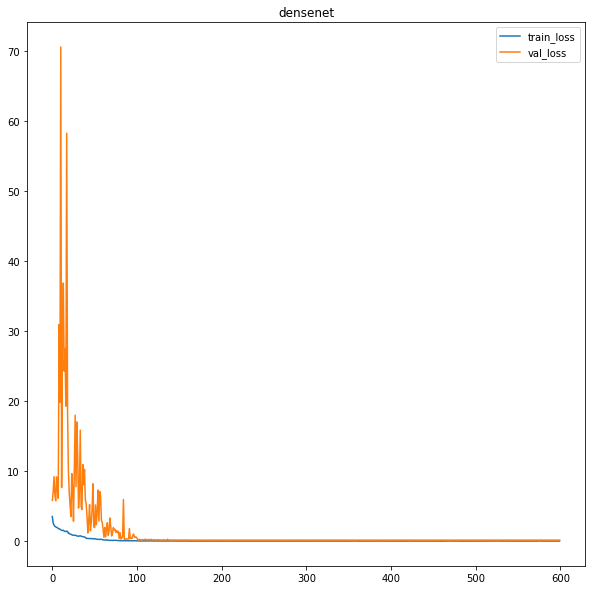

In [96]:
densenet_df[['train_loss','val_loss']].plot(title="densenet")

In [106]:
densenet_df['d_train_acc_act'] = densenet_df['Activity Training accuracy']
resnet_df['r_train_acc_act'] = resnet_df['Activity Training accuracy']
densenet_df['d_val_acc_act'] = densenet_df['Activity Test accuracy']
resnet_df['r_val_acc_act'] = resnet_df['Activity Test accuracy']

<AxesSubplot:>

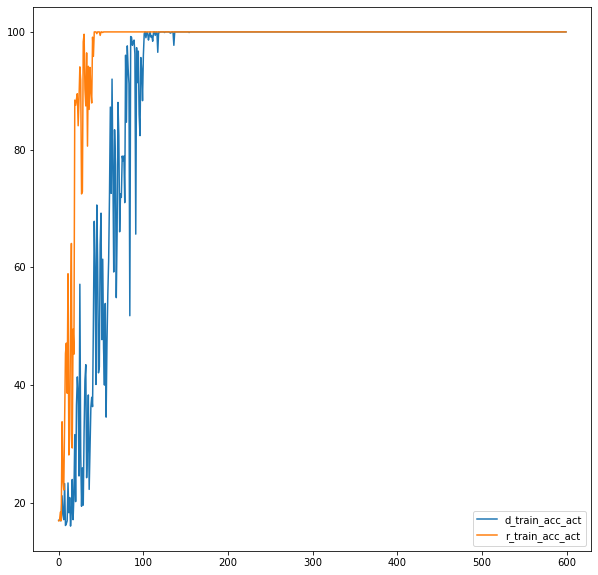

In [107]:
pd.concat([densenet_df['d_train_acc_act'],resnet_df['r_train_acc_act']], axis=1).plot()

<AxesSubplot:>

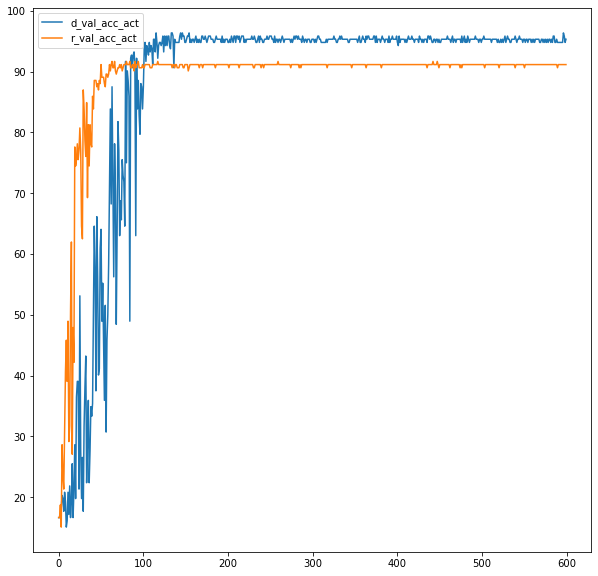

In [108]:
pd.concat([densenet_df['d_val_acc_act'],resnet_df['r_val_acc_act']], axis=1).plot()

In [109]:
with open('densenet1.txt') as f:
    lines = f.readlines()
densenet1_list = []
for i in range(600):
    row = {}
    row['epoch'] = lines[i*10].strip().split(" ")[-1]
    row['Activity Training accuracy'] = lines[i*10+2].strip().split(" ")[-1]
    row['Location Training accuracy'] = lines[i*10+3].strip().split(" ")[-1]
    row['Activity Training loss'] = lines[i*10+4].strip().split(" ")[-1]
    row['Location Training loss'] = lines[i*10+5].strip().split(" ")[-1]
    row['Activity Test accuracy'] = lines[i*10+6].strip().split(" ")[-1]
    row['Location Test accuracy'] = lines[i*10+7].strip().split(" ")[-1]
    row['Activity Test loss'] = lines[i*10+8].strip().split(" ")[-1]
    row['Location Test loss'] = lines[i*10+9].strip().split(" ")[-1]
    densenet1_list.append(row)
densenet1_df = pd.DataFrame(densenet1_list)
for i in densenet1_df:
    densenet1_df[i] = pd.to_numeric(densenet1_df[i])

In [110]:
densenet1_df

,epoch,Activity Training accuracy,Location Training accuracy,Activity Training loss,Location Training loss,Activity Test accuracy,Location Test accuracy,Activity Test loss,Location Test loss
0,0,17.128713,6.435644,1.891428,1.480815,16.666667,6.250000,1.805292,3.288687
1,1,17.128713,6.336634,1.745796,0.668913,16.666667,6.250000,1.820617,4.199832
2,2,20.297030,6.336634,1.642855,0.517357,19.791667,6.250000,1.914969,3.864041
3,3,16.831683,6.633663,1.563797,0.387762,16.666667,6.770833,2.608054,3.227026
4,4,16.930693,20.099010,1.462733,0.357199,16.145833,20.833333,4.756501,7.722874
...,...,...,...,...,...,...,...,...,...
595,595,100.000000,100.000000,0.063400,0.012144,94.270833,98.958333,0.191877,0.030292
596,596,100.000000,100.000000,0.055210,0.011542,94.791667,98.958333,0.192724,0.030451
597,597,100.000000,100.000000,0.069548,0.016158,94.270833,98.958333,0.187686,0.030369
598,598,100.000000,100.000000,0.068315,0.015422,94.791667,98.958333,0.188217,0.029675


In [112]:
densenet1_df['d1_train_acc_act'] = densenet1_df['Activity Training accuracy']
resnet_df['r_train_acc_act'] = resnet_df['Activity Training accuracy']
densenet1_df['d1_val_acc_act'] = densenet1_df['Activity Test accuracy']
resnet_df['r_val_acc_act'] = resnet_df['Activity Test accuracy']

<AxesSubplot:>

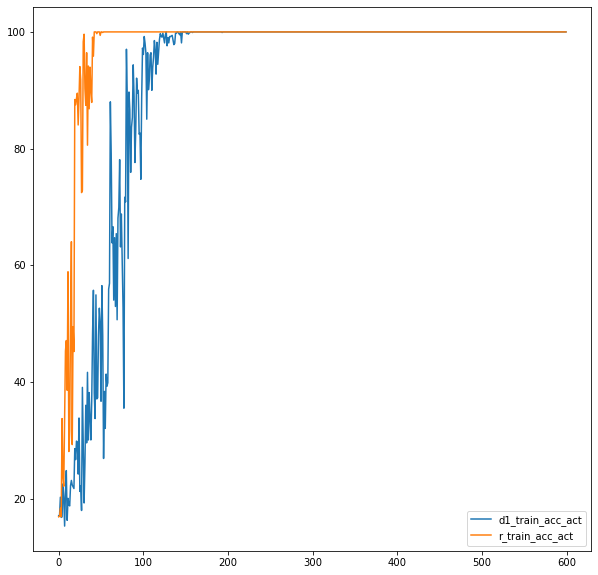

In [114]:
pd.concat([densenet1_df['d1_train_acc_act'],resnet_df['r_train_acc_act']], axis=1).plot()

<AxesSubplot:>

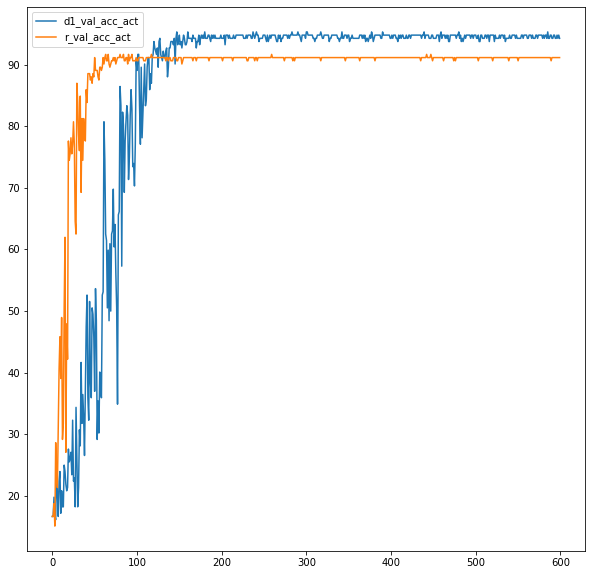

In [115]:
pd.concat([densenet1_df['d1_val_acc_act'],resnet_df['r_val_acc_act']], axis=1).plot()